In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Google Drive Bağlantısı
# Bu komutu çalıştırdığınızda, Google Drive'ınıza erişim izni vermeniz istenecektir.
print("Google Drive'a bağlanılıyor...")
drive.mount('/content/drive')

# 2. Dosya Yolu Tanımlaması
# LÜTFEN AŞAĞIDAKİ 'YOUR_FILE_PATH' KISMINI DEĞİŞTİRİN
# Örnek: /content/drive/MyDrive/VeriSetleri/buyuk_veri.csv
# NOT: Dosyanızın adını ve Drive'daki tam yolunu doğru yazdığınızdan emin olun.
csv_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv'
output_dir = '/content/drive/MyDrive/Splitted_Files' # Çıktı dosyalarının kaydedileceği klasör

# Çıktı klasörünü oluştur (zaten varsa hata vermez)
os.makedirs(output_dir, exist_ok=True)

# 3. CSV Dosyasını Oku
print(f"'{csv_path}' adresindeki dosya okunuyor...")
try:
    # Büyük dosyalar için düşük bellek uyarısını kapatır ve veriyi okur
    df = pd.read_csv(csv_path, low_memory=False)
except FileNotFoundError:
    print("\nHATA: Dosya bulunamadı! Lütfen 'csv_path' değişkenindeki yolu kontrol edin.")
    exit()

# 4. Veri Setini İkiye Bölme
total_rows = len(df)
# Tam ortadan bölme noktasını bul. Tek satır sayısı olsa bile,
# ilk parçaya bir satır fazlalık gidecek şekilde ayarlama yapılır.
split_point = total_rows // 2

# Başlık satırı (Header) her iki parçada da korunacaktır.

# İlk Parça (Part 1)
df_part_1 = df.iloc[:split_point]

# İkinci Parça (Part 2)
df_part_2 = df.iloc[split_point:]

# 5. Parçaları Yeni CSV Dosyalarına Kaydetme
base_name = os.path.basename(csv_path).replace('.csv', '')

# Çıktı dosyası adları
output_path_1 = os.path.join(output_dir, f"{base_name}_part_1.csv")
output_path_2 = os.path.join(output_dir, f"{base_name}_part_2.csv")

# Kaydetme işlemi
print(f"Toplam {total_rows} satır, tam ortadan bölünüyor: {split_point} satır.")

df_part_1.to_csv(output_path_1, index=False)
print(f"1. Parça kaydedildi: {output_path_1} ({len(df_part_1)} satır)")

df_part_2.to_csv(output_path_2, index=False)
print(f"2. Parça kaydedildi: {output_path_2} ({len(df_part_2)} satır)")

print("\nİşlem başarıyla tamamlandı. Dosyalarınız Google Drive'a kaydedilmiştir.")

Google Drive'a bağlanılıyor...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv' adresindeki dosya okunuyor...
Toplam 117385 satır, tam ortadan bölünüyor: 58692 satır.
1. Parça kaydedildi: /content/drive/MyDrive/Splitted_Files/processed_journals_Full_part_1.csv (58692 satır)
2. Parça kaydedildi: /content/drive/MyDrive/Splitted_Files/processed_journals_Full_part_2.csv (58693 satır)

İşlem başarıyla tamamlandı. Dosyalarınız Google Drive'a kaydedilmiştir.


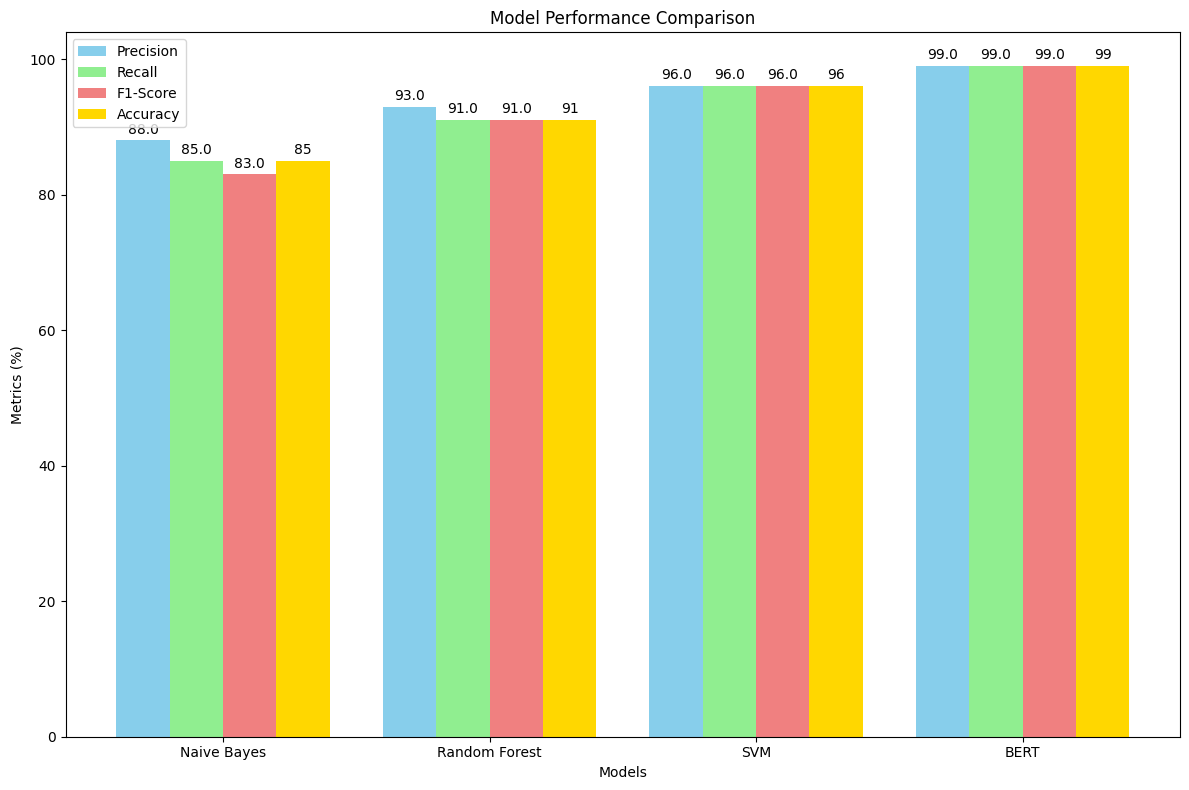

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Naive Bayes', 'Random Forest', 'SVM', 'BERT']
precision = [0.88, 0.93, 0.96, 0.99]
recall = [0.85, 0.91, 0.96, 0.99]
f1_score = [0.83, 0.91, 0.96, 0.99]
accuracy = [85, 91, 96, 99]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 8))

# Convert Precision, Recall, F1-Score to percentages
precision_percentage = [p * 100 for p in precision]
recall_percentage = [r * 100 for r in recall]
f1_score_percentage = [f * 100 for f in f1_score]

plt.bar(x - 1.5 * width, precision_percentage, width, label='Precision', color='skyblue')
plt.bar(x - 0.5 * width, recall_percentage, width, label='Recall', color='lightgreen')
plt.bar(x + 0.5 * width, f1_score_percentage, width, label='F1-Score', color='lightcoral')
plt.bar(x + 1.5 * width, accuracy, width, label='Accuracy', color='gold')

plt.xlabel('Models')
plt.ylabel('Metrics (%)')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()

def add_labels(x_positions, y_values):
    for i, y_value in enumerate(y_values):
        plt.text(x_positions[i], y_value + 1, str(y_value), ha='center')

add_labels(x - 1.5 * width, precision_percentage)
add_labels(x - 0.5 * width, recall_percentage)
add_labels(x + 0.5 * width, f1_score_percentage)
add_labels(x + 1.5 * width, accuracy)

plt.tight_layout()
plt.show()

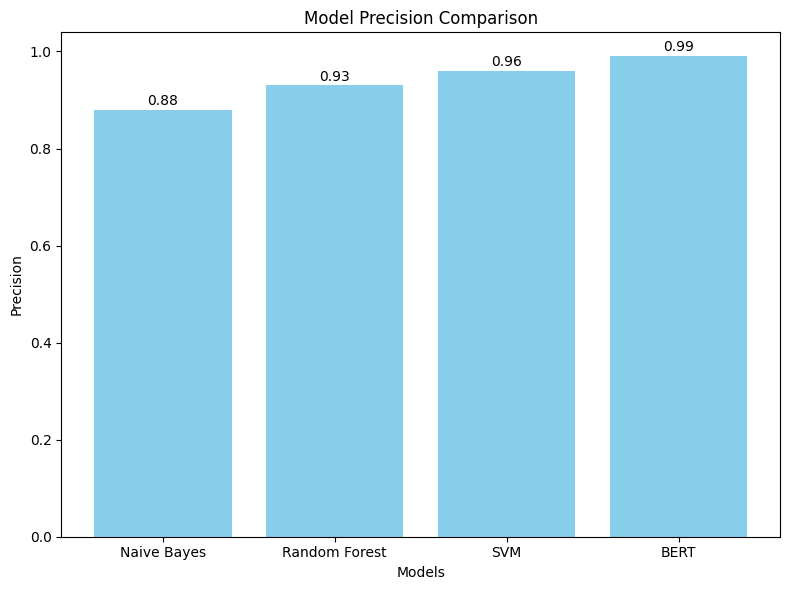

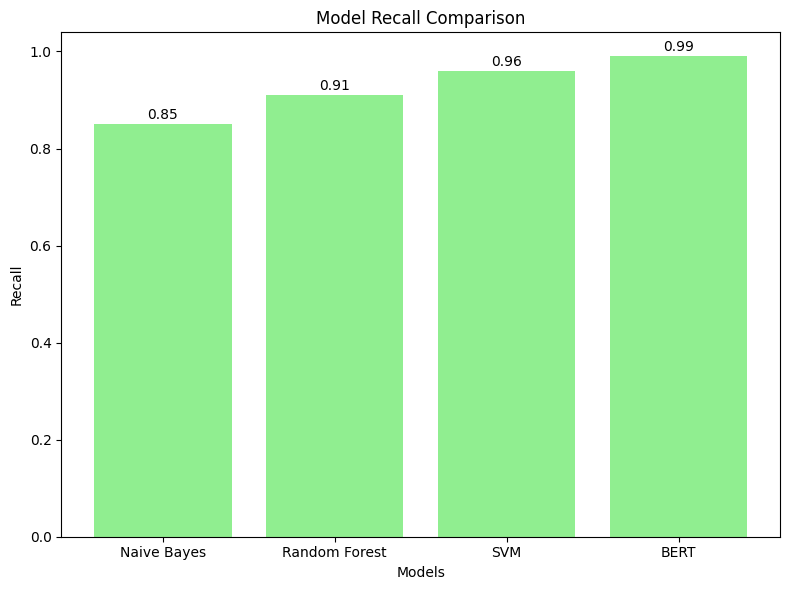

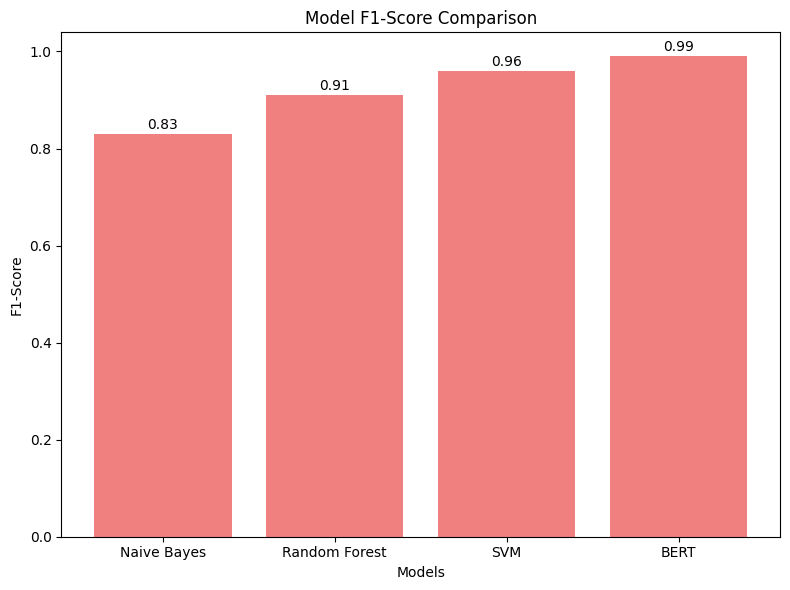

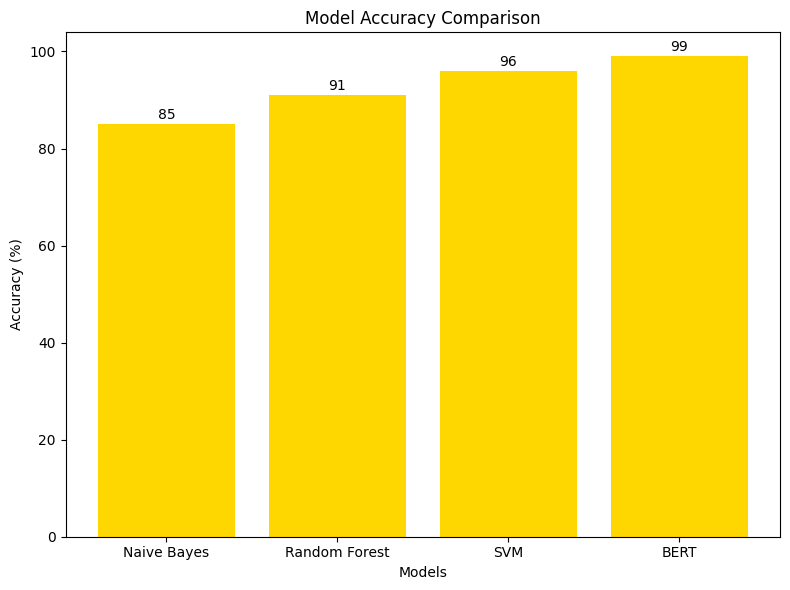

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Naive Bayes', 'Random Forest', 'SVM', 'BERT']
precision = [0.88, 0.93, 0.96, 0.99]
recall = [0.85, 0.91, 0.96, 0.99]
f1_score = [0.83, 0.91, 0.96, 0.99]
accuracy = [85, 91, 96, 99]

x = np.arange(len(models))

# Precision Chart
plt.figure(figsize=(8, 6))
plt.bar(x, precision, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.xticks(x, models)
for i, value in enumerate(precision):
    plt.text(i, value + 0.01, str(value), ha='center')
plt.tight_layout()
plt.show()

# Recall Chart
plt.figure(figsize=(8, 6))
plt.bar(x, recall, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.xticks(x, models)
for i, value in enumerate(recall):
    plt.text(i, value + 0.01, str(value), ha='center')
plt.tight_layout()
plt.show()

# F1-Score Chart
plt.figure(figsize=(8, 6))
plt.bar(x, f1_score, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.xticks(x, models)
for i, value in enumerate(f1_score):
    plt.text(i, value + 0.01, str(value), ha='center')
plt.tight_layout()
plt.show()

# Accuracy Chart
plt.figure(figsize=(8, 6))
plt.bar(x, accuracy, color='gold')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models)
for i, value in enumerate(accuracy):
    plt.text(i, value + 1, str(value), ha='center')
plt.tight_layout()
plt.show()

GloVe vektörleri indiriliyor...
GloVe vektörleri indirildi ve çıkarıldı.


GloVe yükleniyor: 400000it [00:34, 11730.08it/s]



Sınıflandırma Raporu:

                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.85      0.87      0.86      8581
                                  Biology        0.50      0.52      0.51      7154
                                Chemistry        0.73      0.77      0.75      8241
Computer Science, Artificial Intelligence        0.70      0.84      0.76      8662
              Cybersecurity & Cryptography       0.55      0.49      0.52      8601
                      Economics & Business       0.81      0.88      0.84      7400
                     Environmental Science       0.61      0.61      0.61      8431
                                 Geography       0.68      0.75      0.71      9290
                                   History       0.61      0.50      0.55      7724
                   International Relations       0.54      0.44      0.48      8506
       Materials Science, Coatings & Films       0.

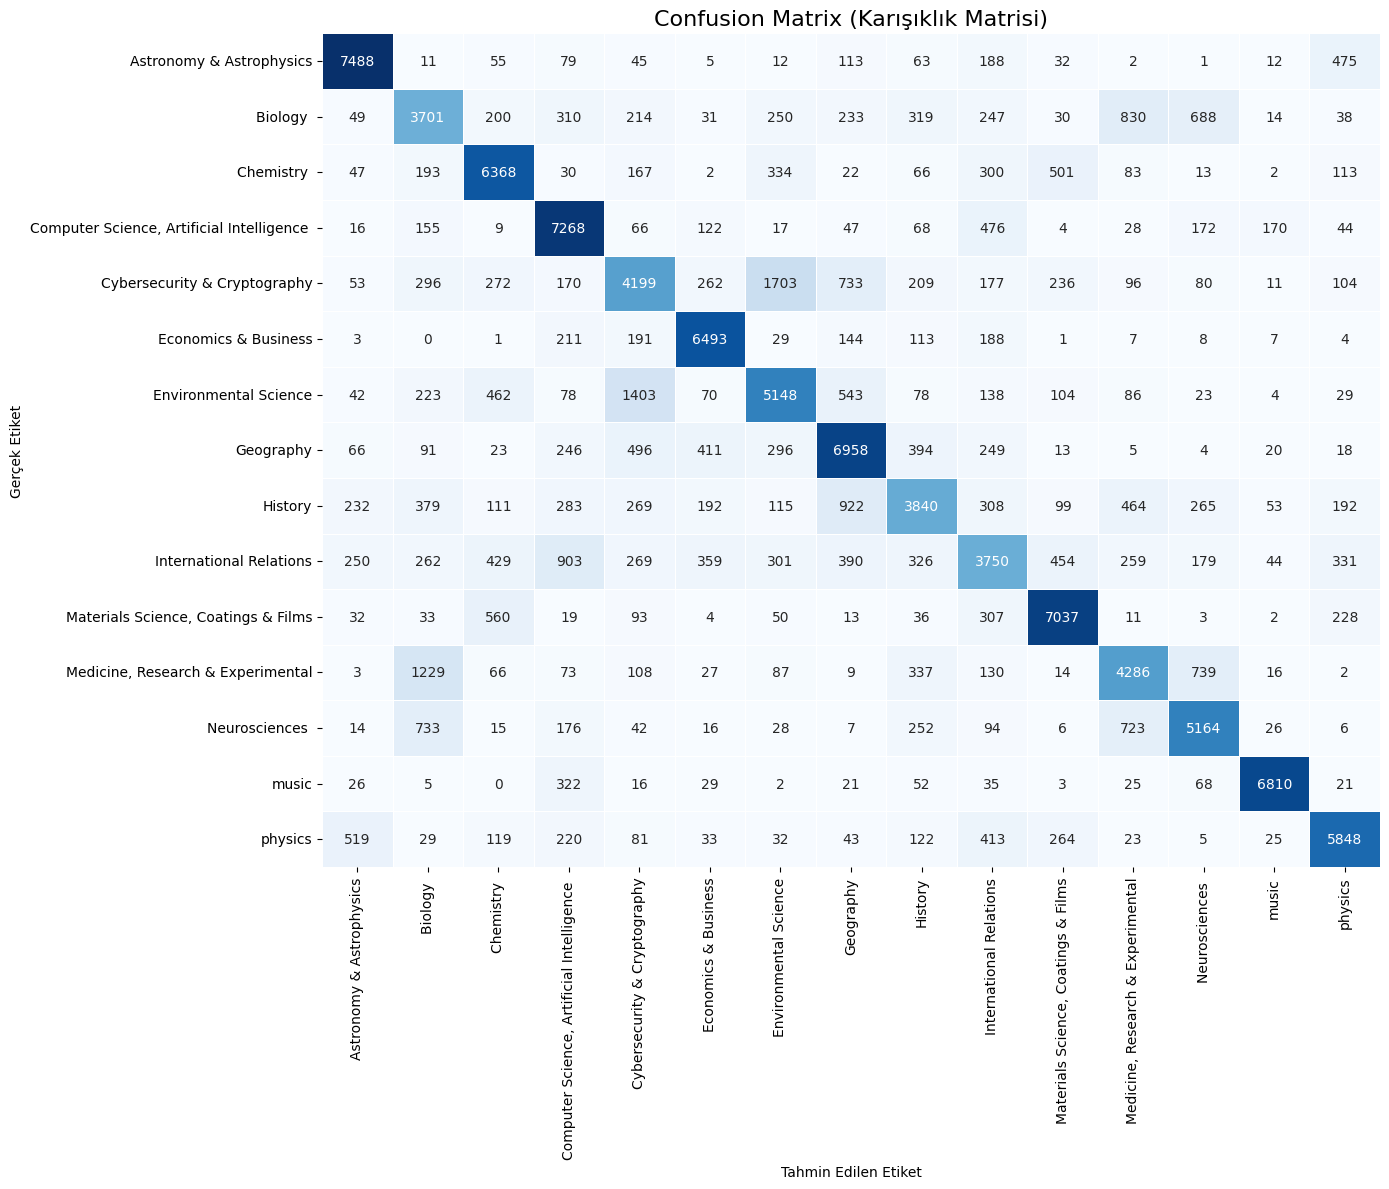

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from tqdm import tqdm
import os
import requests
import zipfile

# GloVe vektörlerini indir ve yükle
def download_glove_vectors():
    glove_dir = "/content/glove"
    if not os.path.exists(glove_dir):
        os.makedirs(glove_dir)

    glove_path = os.path.join(glove_dir, "glove.6B.300d.txt")
    if not os.path.exists(glove_path):
        url = "http://nlp.stanford.edu/data/glove.6B.zip"
        zip_path = os.path.join(glove_dir, "glove.6B.zip")
        print("GloVe vektörleri indiriliyor...")
        with open(zip_path, "wb") as f:
            f.write(requests.get(url).content)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(glove_dir)
        print("GloVe vektörleri indirildi ve çıkarıldı.")
    return glove_path

def load_glove_embeddings(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in tqdm(f, desc="GloVe yükleniyor"):
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Metin temizleme
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

# Ortalamaya dayalı metin vektörü üretimi
def text_to_vector(text, embeddings, embedding_dim=300):
    words = text.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if not word_vectors:
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Veri kümesini yükle
def download_dataset():
    file_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx'
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"Veri seti yüklenirken hata oluştu: {e}")
        return None

# Eğitim ve değerlendirme fonksiyonu
def train_and_evaluate_with_confusion_matrix(data, embeddings):
    data.dropna(inplace=True)
    data['text'] = data['text'].apply(clean_text)
    data['vector'] = data['text'].apply(lambda x: text_to_vector(x, embeddings))

    X = np.vstack(data['vector'].values)
    y = data['category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

    # SVM modelini kullan
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("\nSınıflandırma Raporu:\n")
    print(classification_report(y_test, predictions))

    # Confusion Matrix Hesapla
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

    # Confusion Matrix Görselleştir
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
    plt.title("Confusion Matrix (Karışıklık Matrisi)", fontsize=16)
    plt.xlabel("Tahmin Edilen Etiket")
    plt.ylabel("Gerçek Etiket")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def main():
    glove_file = download_glove_vectors()
    embeddings = load_glove_embeddings(glove_file)
    data = download_dataset()
    if data is not None:
        train_and_evaluate_with_confusion_matrix(data, embeddings)

if __name__ == "__main__":
    main()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
1498/1498 [==============================] - 863s 550ms/step - loss: 0.6192 - accuracy: 0.8107 - val_loss: 0.4312 - val_accuracy: 0.8593 - lr: 3.0000e-05
Epoch 2/8
1498/1498 [==============================] - 812s 542ms/step - loss: 0.3168 - accuracy: 0.8991 - val_loss: 0.4174 - val_accuracy: 0.8644 - lr: 3.0000e-05
Epoch 3/8
1498/1498 [==============================] - 811s 542ms/step - loss: 0.2009 - accuracy: 0.9380 - val_loss: 0.4321 - val_accuracy: 0.8709 - lr: 3.0000e-05
Epoch 4/8
1498/1498 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9598
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.4999999621068127e-05.
1498/1498 [==============================] - 813s 543ms/step - loss: 0.1327 - accuracy: 0.9598 - val_loss: 0.4788 - val_accuracy: 0.8716 - lr: 3.0000e-05
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.
2995/2995 [==============================] - 437s 145ms/step
Sınıflandırma Raporu (BERT):
       

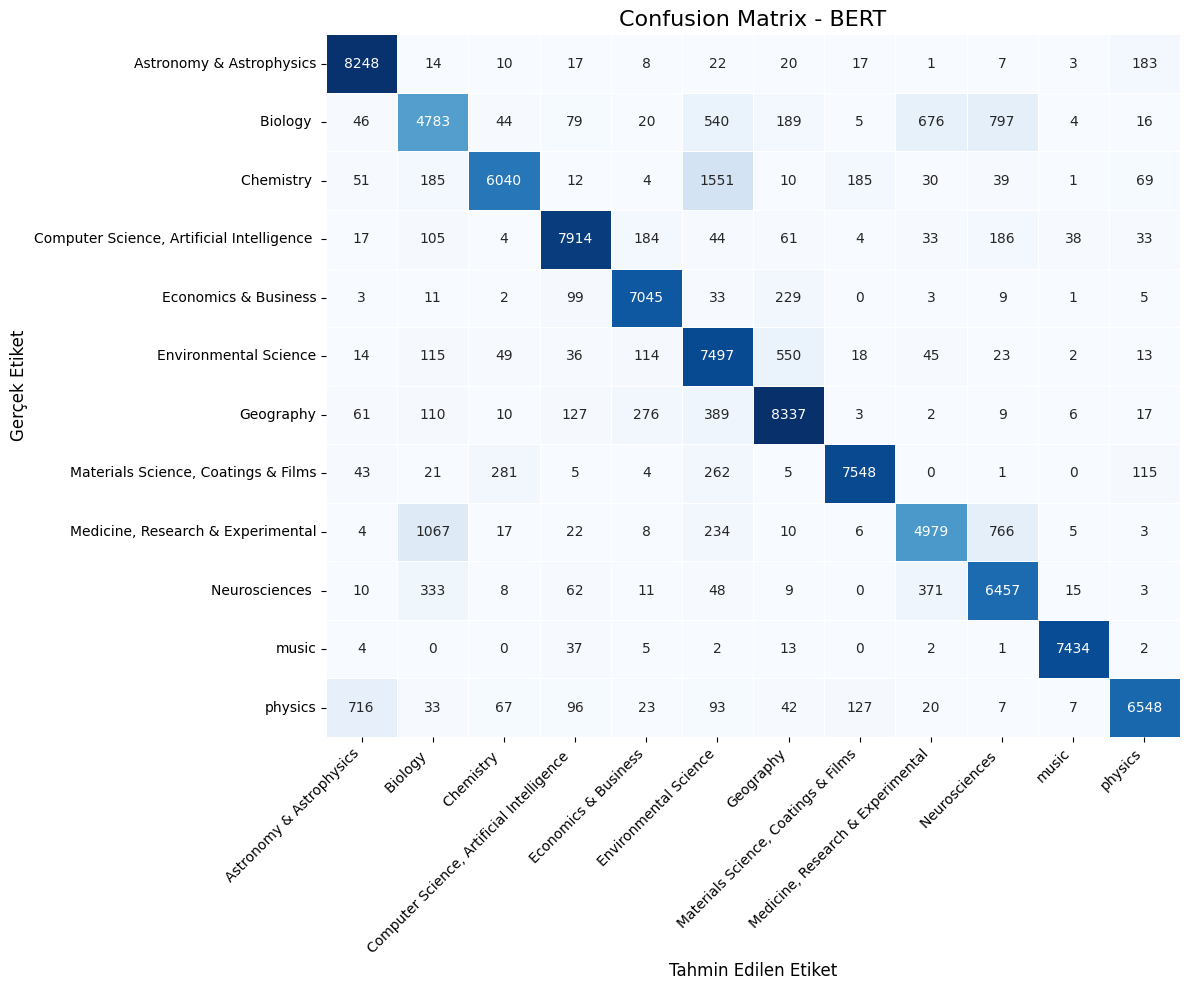

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Adım 1: Veriyi temizleyen fonksiyon
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\s+', ' ', text)    # Çoklu boşlukları tek boşlukla değiştir
    text = text.lower()                  # Küçük harfe çevir
    return text

# Adım 2: Veriyi bölme
def split_data(data):
    X = data['text']
    y = data['category']
    return train_test_split(X, y, test_size=0.8, random_state=42)

# Adım 3: BERT modelini oluşturma
def create_bert_model(num_labels):
    model = TFBertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=num_labels
    )
    return model

# Learning Rate Scheduler
def lr_scheduler():
    return tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )

# Adım 4: BERT modelini eğitme
def train_bert_model(model, train_data, val_data, epochs, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = ["accuracy"]

    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    scheduler = lr_scheduler()

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True,
        verbose=1
    )

    model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=[scheduler, early_stopping],
        verbose=1
    )
    return model

# Adım 5: Modeli değerlendirme ve sonuçları raporlama + Confusion Matrix
def evaluate_model(model, val_data, val_labels_encoded, label_encoder):
    predictions = model.predict(val_data)["logits"]
    predicted_labels_encoded = np.argmax(predictions, axis=1)

    decoded_labels = label_encoder.inverse_transform(val_labels_encoded)
    decoded_predictions = label_encoder.inverse_transform(predicted_labels_encoded)

    report = classification_report(decoded_labels, decoded_predictions, target_names=label_encoder.classes_)
    print("Sınıflandırma Raporu (BERT):")
    print(report)

    # Sınıf başına düşen eleman sayısını yazdırma
    print("\nSınıf Başına Düşen Eleman Sayısı (Test Seti):")
    unique_labels, counts = np.unique(decoded_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"{label:<40} {count}")

    # Confusion Matrix
    cm = confusion_matrix(decoded_labels, decoded_predictions, labels=label_encoder.classes_)
    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)

    plt.title("Confusion Matrix - BERT", fontsize=16)
    plt.xlabel("Tahmin Edilen Etiket", fontsize=12)
    plt.ylabel("Gerçek Etiket", fontsize=12)

    # X ekseni etiketlerini düzelt
    plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5,  # merkezleme
               labels=label_encoder.classes_,
               rotation=45,
               ha='right')

    # Y ekseni etiketleri
    plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5,  # merkezleme
               labels=label_encoder.classes_,
               rotation=0)

    plt.tight_layout()
    plt.show()

# Ana program
if __name__ == "__main__":
    # Veri setini yükleme
    file_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx'
    data = pd.read_excel(file_path)

    # Veriyi temizleme
    data['text'] = data['text'].apply(clean_text)

    # Kategori etiketlerini kodlama
    label_encoder = LabelEncoder()
    data['category_encoded'] = label_encoder.fit_transform(data['category'])

    # Veriyi bölme
    X_train, X_test, y_train_encoded, y_test_encoded, y_train_labels, y_test_labels = train_test_split(
        data['text'], data['category_encoded'], data['category'], test_size=0.8, random_state=42
    )

    # Tokenizer ve maksimum uzunluk
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    max_length = 512

    train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")
    test_encodings = tokenizer(list(X_test), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")

    # TF Dataset oluşturma
    train_dataset = tf.data.Dataset.from_tensor_slices(({
        "input_ids": train_encodings["input_ids"],
        "attention_mask": train_encodings["attention_mask"]
    }, y_train_encoded)).batch(16)

    test_dataset = tf.data.Dataset.from_tensor_slices(({
        "input_ids": test_encodings["input_ids"],
        "attention_mask": test_encodings["attention_mask"]
    }, y_test_encoded)).batch(16)

    # Model oluştur
    bert_model = create_bert_model(num_labels=len(label_encoder.classes_))

    # Eğitimi başlat
    trained_model = train_bert_model(
        model=bert_model,
        train_data=train_dataset,
        val_data=test_dataset,
        epochs=8,
        learning_rate=3e-5
    )

    # Değerlendir
    evaluate_model(
        trained_model,
        {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]},
        y_test_encoded,
        label_encoder
    )

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
749/749 [==============================] - 396s 478ms/step - loss: 0.9093 - accuracy: 0.7563 - val_loss: 0.5047 - val_accuracy: 0.8401 - lr: 1.0000e-05
Epoch 2/8
749/749 [==============================] - 343s 459ms/step - loss: 0.4199 - accuracy: 0.8684 - val_loss: 0.4314 - val_accuracy: 0.8616 - lr: 1.0000e-05
Epoch 3/8
749/749 [==============================] - 344s 459ms/step - loss: 0.3088 - accuracy: 0.9058 - val_loss: 0.4187 - val_accuracy: 0.8693 - lr: 1.0000e-05
Epoch 4/8
749/749 [==============================] - 343s 459ms/step - loss: 0.2252 - accuracy: 0.9332 - val_loss: 0.4511 - val_accuracy: 0.8646 - lr: 1.0000e-05
Epoch 5/8
749/749 [==============================] - ETA: 0s - loss: 0.1642 - accuracy: 0.9532
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
749/749 [==============================] - 343s 459ms/step - loss: 0.1642 - accuracy: 0.9532 - val_loss: 0.4804 - val_accuracy: 0.8650 - lr: 1.0000e-05
Epoch 5: early stopping
Resto

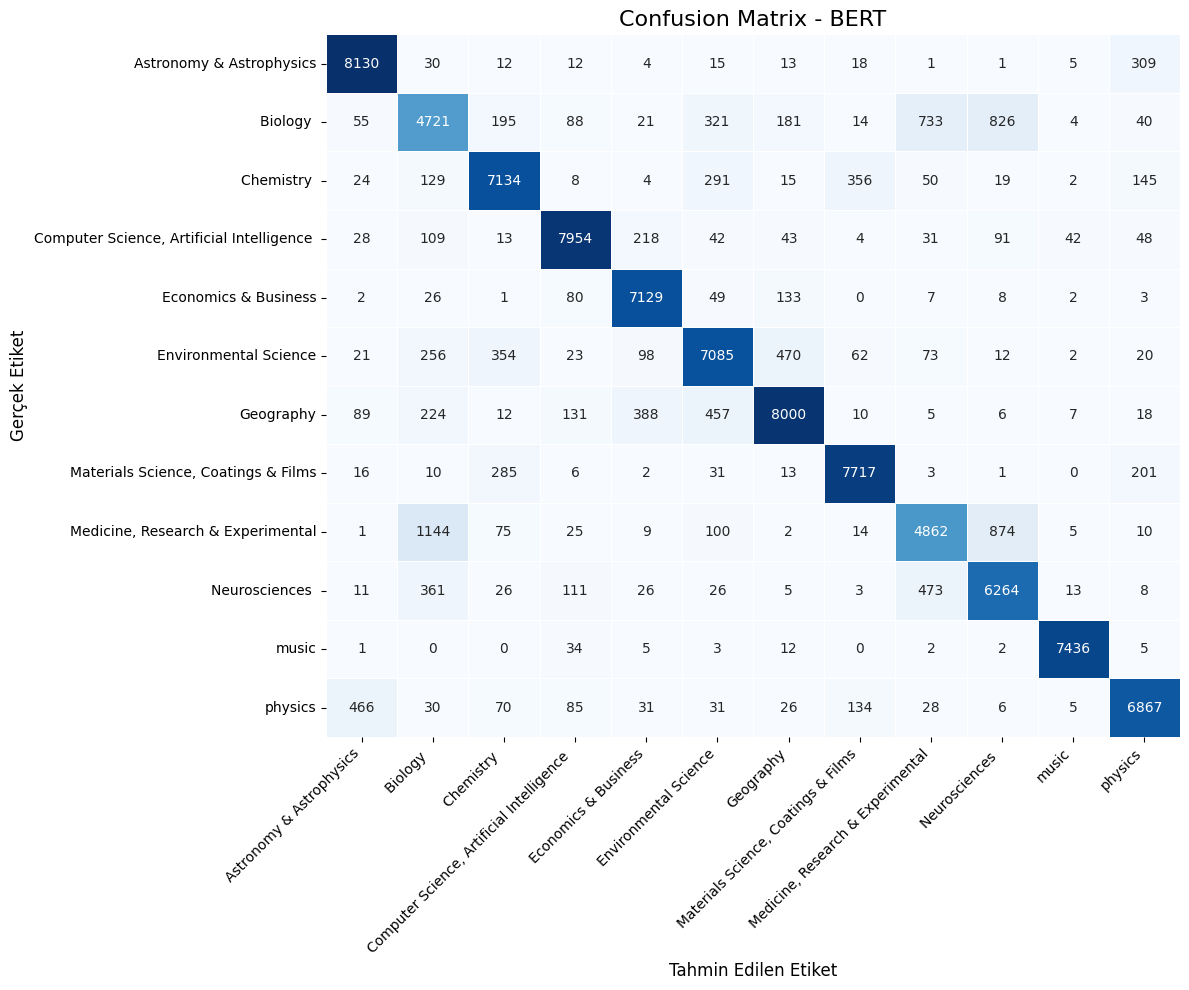

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Adım 1: Veriyi temizleyen fonksiyon
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\s+', ' ', text)    # Çoklu boşlukları tek boşlukla değiştir
    text = text.lower()                  # Küçük harfe çevir
    return text

# Adım 2: Veriyi bölme
def split_data(data):
    X = data['text']
    y = data['category']
    return train_test_split(X, y, test_size=0.8, random_state=42)

# Adım 3: BERT modelini oluşturma
def create_bert_model(num_labels):
    model = TFBertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=num_labels
    )
    return model

# Learning Rate Scheduler
def lr_scheduler():
    return tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )

# Adım 4: BERT modelini eğitme
def train_bert_model(model, train_data, val_data, epochs, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = ["accuracy"]

    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

    scheduler = lr_scheduler()

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True,
        verbose=1
    )

    model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=[scheduler, early_stopping],
        verbose=1
    )
    return model

# Adım 5: Modeli değerlendirme ve sonuçları raporlama + Confusion Matrix
def evaluate_model(model, val_data, val_labels_encoded, label_encoder):
    predictions = model.predict(val_data)["logits"]
    predicted_labels_encoded = np.argmax(predictions, axis=1)

    decoded_labels = label_encoder.inverse_transform(val_labels_encoded)
    decoded_predictions = label_encoder.inverse_transform(predicted_labels_encoded)

    report = classification_report(decoded_labels, decoded_predictions, target_names=label_encoder.classes_)
    print("Sınıflandırma Raporu (BERT):")
    print(report)

    # Sınıf başına düşen eleman sayısını yazdırma
    print("\nSınıf Başına Düşen Eleman Sayısı (Test Seti):")
    unique_labels, counts = np.unique(decoded_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"{label:<40} {count}")

    # Confusion Matrix
    cm = confusion_matrix(decoded_labels, decoded_predictions, labels=label_encoder.classes_)
    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)

    plt.title("Confusion Matrix - BERT", fontsize=16)
    plt.xlabel("Tahmin Edilen Etiket", fontsize=12)
    plt.ylabel("Gerçek Etiket", fontsize=12)

    # X ekseni etiketlerini düzelt
    plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5,  # merkezleme
               labels=label_encoder.classes_,
               rotation=45,
               ha='right')

    # Y ekseni etiketleri
    plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5,  # merkezleme
               labels=label_encoder.classes_,
               rotation=0)

    plt.tight_layout()
    plt.show()

# Ana program
if __name__ == "__main__":
    # Veri setini yükleme
    file_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx'
    data = pd.read_excel(file_path)

    # Veriyi temizleme
    data['text'] = data['text'].apply(clean_text)

    # Kategori etiketlerini kodlama
    label_encoder = LabelEncoder()
    data['category_encoded'] = label_encoder.fit_transform(data['category'])

    # Veriyi bölme
    X_train, X_test, y_train_encoded, y_test_encoded, y_train_labels, y_test_labels = train_test_split(
        data['text'], data['category_encoded'], data['category'], test_size=0.8, random_state=42
    )

    # Tokenizer ve maksimum uzunluk
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    max_length = 256

    train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")
    test_encodings = tokenizer(list(X_test), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")

    # TF Dataset oluşturma
    train_dataset = tf.data.Dataset.from_tensor_slices(({
        "input_ids": train_encodings["input_ids"],
        "attention_mask": train_encodings["attention_mask"]
    }, y_train_encoded)).batch(32)

    test_dataset = tf.data.Dataset.from_tensor_slices(({
        "input_ids": test_encodings["input_ids"],
        "attention_mask": test_encodings["attention_mask"]
    }, y_test_encoded)).batch(32)

    # Model oluştur
    bert_model = create_bert_model(num_labels=len(label_encoder.classes_))

    # Eğitimi başlat
    trained_model = train_bert_model(
        model=bert_model,
        train_data=train_dataset,
        val_data=test_dataset,
        epochs=8,
        learning_rate=1e-5
    )

    # Değerlendir
    evaluate_model(
        trained_model,
        {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]},
        y_test_encoded,
        label_encoder
    )


In [ ]:
!pip install gputil


  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=f3e97cdbde450c5214c60482dd9c843eb0d8b54c80860aba39db499acc2ec328
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built gputil



=== Fold 1 ===


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
2995/2995 [==============================] - 681s 215ms/step - loss: 0.3328 - accuracy: 0.9428 - val_loss: 6.1527 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 2/8
2995/2995 [==============================] - 611s 204ms/step - loss: 0.1726 - accuracy: 0.9689 - val_loss: 6.7122 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3/8
2995/2995 [==============================] - ETA: 0s - loss: 0.1305 - accuracy: 0.9767
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2995/2995 [==============================] - 611s 204ms/step - loss: 0.1305 - accuracy: 0.9767 - val_loss: 6.9385 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
749/749 [==============================] - 55s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sınıflandırma Raporu (BERT):
                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.00      0.00      0.00      2161
                                  Biology        0.00      0.00      0.00      1799
                                Chemistry        0.00      0.00      0.00      2062
Computer Science, Artificial Intelligence        0.00      0.00      0.00      2135
                      Economics & Business       0.00      0.00      0.00      1853
                     Environmental Science       0.00      0.00      0.00      2099
                                 Geography       0.00      0.00      0.00      2331
       Materials Science, Coatings & Films       0.00      0.00      0.00      2095
         Medicine, Research & Experimental       0.00      0.00      0.00      1773
                            Neurosciences        0.08      1.00      0.14      1825
                                     music    

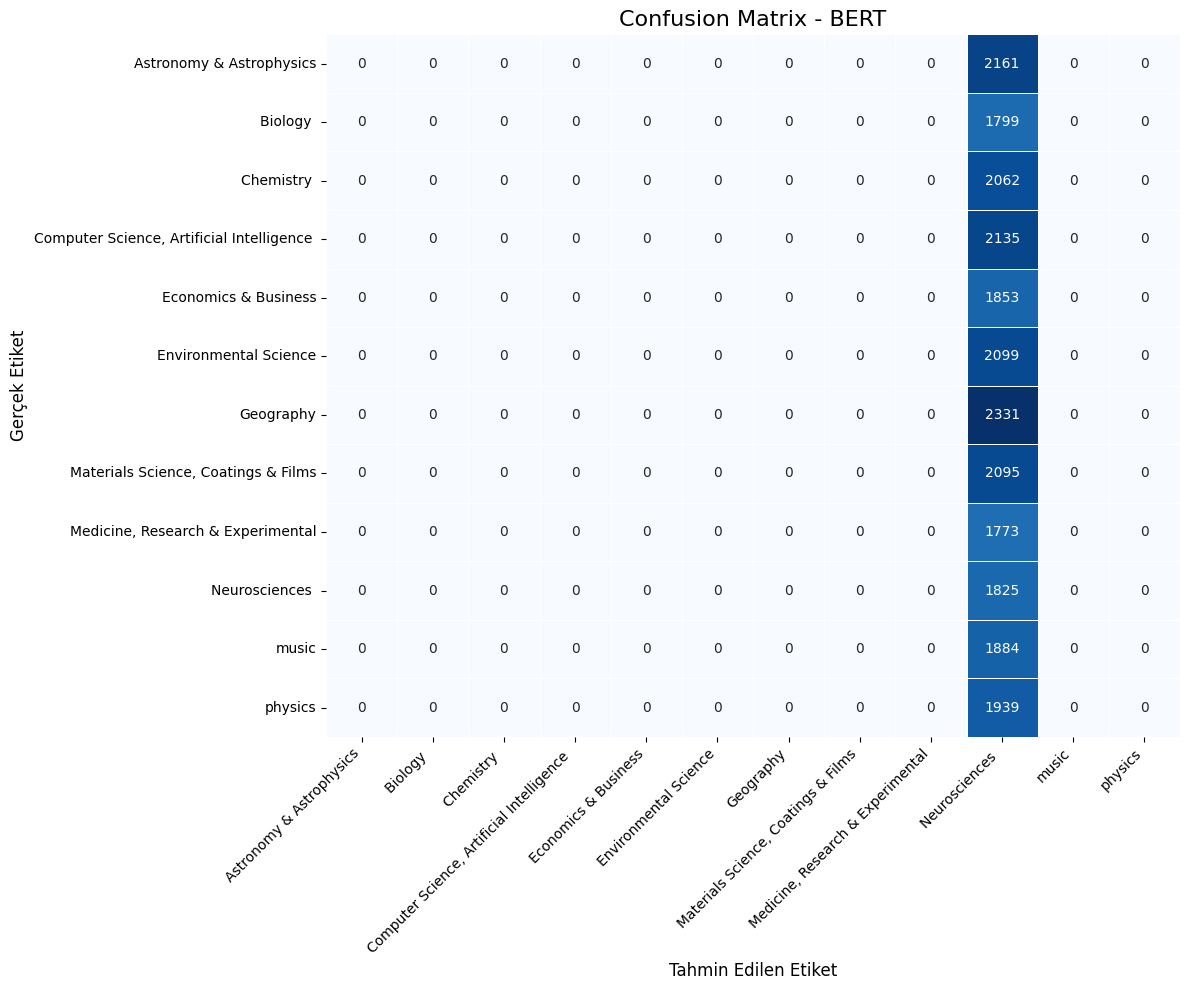


=== Fold 2 ===


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
2995/2995 [==============================] - 679s 214ms/step - loss: 0.2879 - accuracy: 0.9587 - val_loss: 6.1430 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 2/8
2995/2995 [==============================] - 611s 204ms/step - loss: 0.1263 - accuracy: 0.9781 - val_loss: 6.9450 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3/8
2995/2995 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9729
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2995/2995 [==============================] - 612s 204ms/step - loss: 0.1353 - accuracy: 0.9729 - val_loss: 7.1857 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
749/749 [==============================] - 54s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sınıflandırma Raporu (BERT):
                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.00      0.00      0.00      2160
                                  Biology        0.00      0.00      0.00      1800
                                Chemistry        0.00      0.00      0.00      2062
Computer Science, Artificial Intelligence        0.00      0.00      0.00      2135
                      Economics & Business       0.00      0.00      0.00      1853
                     Environmental Science       0.00      0.00      0.00      2099
                                 Geography       0.00      0.00      0.00      2330
       Materials Science, Coatings & Films       0.00      0.00      0.00      2096
         Medicine, Research & Experimental       0.00      0.00      0.00      1773
                            Neurosciences        0.08      1.00      0.14      1826
                                     music    

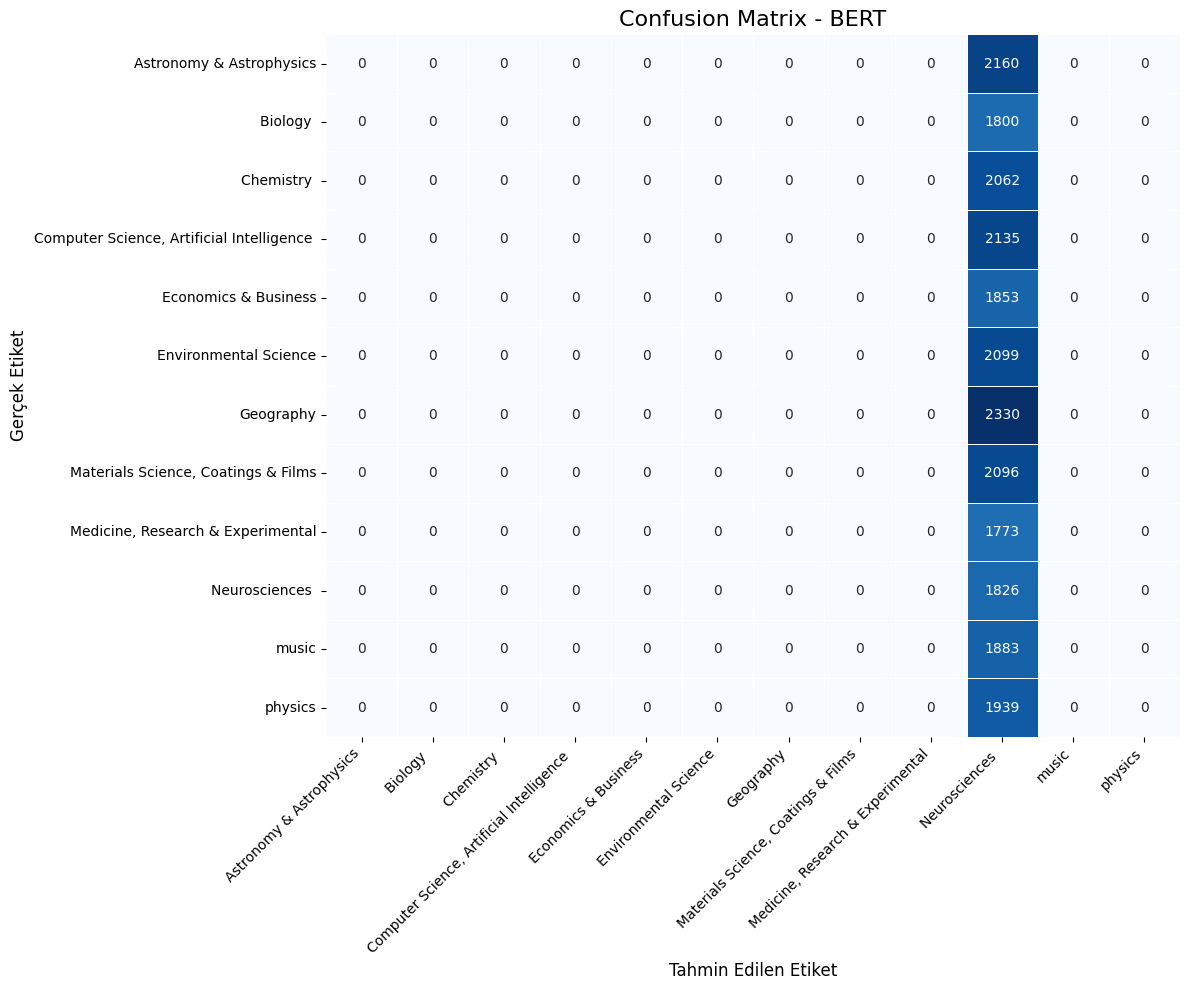


=== Fold 3 ===


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
2995/2995 [==============================] - 682s 215ms/step - loss: 0.3254 - accuracy: 0.9442 - val_loss: 6.0981 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 2/8
2995/2995 [==============================] - 613s 205ms/step - loss: 0.1473 - accuracy: 0.9721 - val_loss: 6.8245 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3/8
2995/2995 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9670
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2995/2995 [==============================] - 613s 205ms/step - loss: 0.1576 - accuracy: 0.9670 - val_loss: 6.9581 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
749/749 [==============================] - 54s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sınıflandırma Raporu (BERT):
                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.00      0.00      0.00      2160
                                  Biology        0.00      0.00      0.00      1800
                                Chemistry        0.00      0.00      0.00      2062
Computer Science, Artificial Intelligence        0.00      0.00      0.00      2135
                      Economics & Business       0.00      0.00      0.00      1853
                     Environmental Science       0.00      0.00      0.00      2099
                                 Geography       0.00      0.00      0.00      2330
       Materials Science, Coatings & Films       0.00      0.00      0.00      2096
         Medicine, Research & Experimental       0.00      0.00      0.00      1773
                            Neurosciences        0.08      1.00      0.14      1826
                                     music    

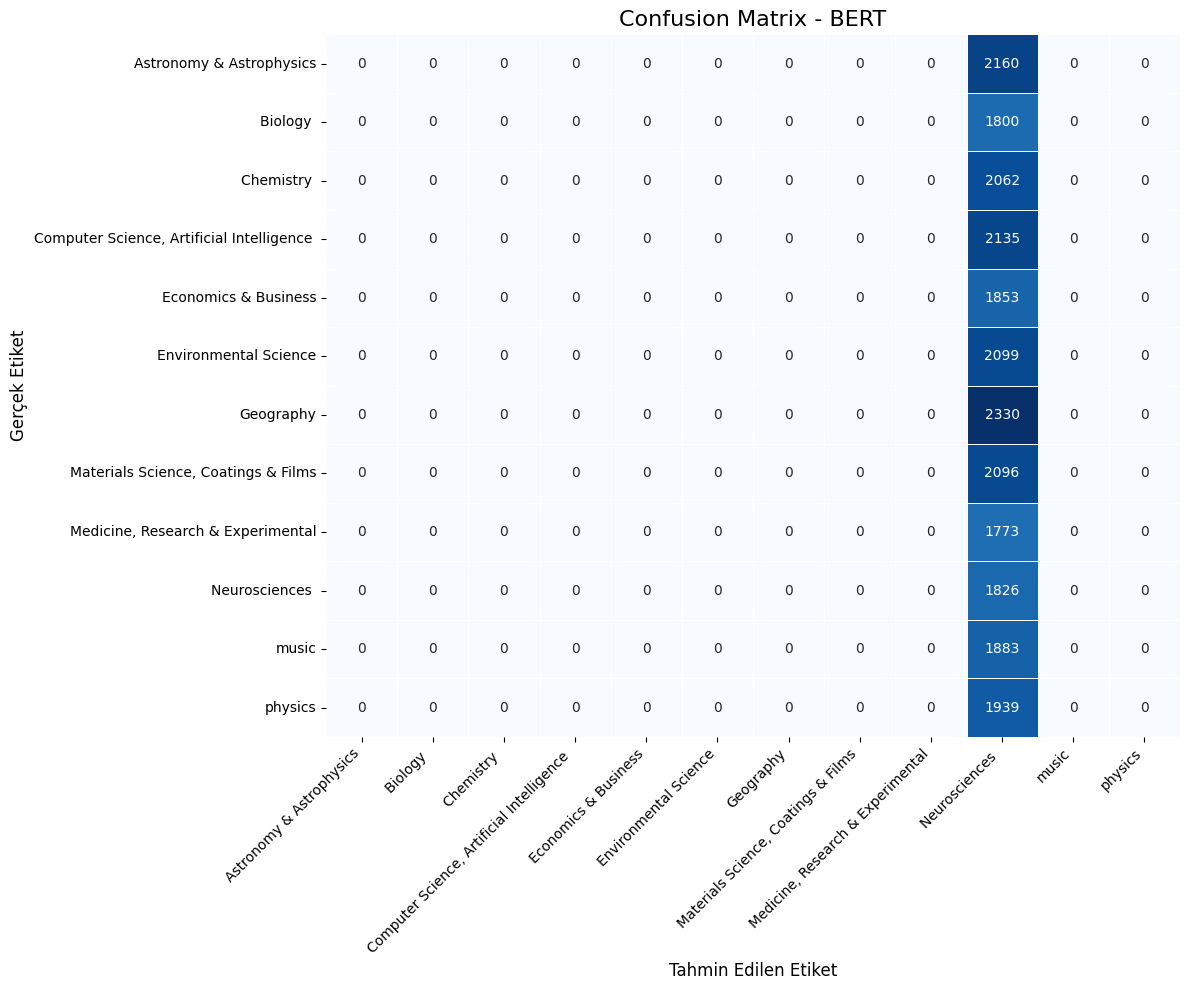


=== Fold 4 ===


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
2995/2995 [==============================] - 682s 215ms/step - loss: 0.3015 - accuracy: 0.9493 - val_loss: 5.9916 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 2/8
2995/2995 [==============================] - 611s 204ms/step - loss: 0.1587 - accuracy: 0.9693 - val_loss: 6.6643 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3/8
2995/2995 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9627
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2995/2995 [==============================] - 611s 204ms/step - loss: 0.1787 - accuracy: 0.9627 - val_loss: 6.7326 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
749/749 [==============================] - 54s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sınıflandırma Raporu (BERT):
                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.00      0.00      0.00      2160
                                  Biology        0.00      0.00      0.00      1800
                                Chemistry        0.00      0.00      0.00      2062
Computer Science, Artificial Intelligence        0.00      0.00      0.00      2134
                      Economics & Business       0.00      0.00      0.00      1853
                     Environmental Science       0.00      0.00      0.00      2099
                                 Geography       0.00      0.00      0.00      2330
       Materials Science, Coatings & Films       0.00      0.00      0.00      2096
         Medicine, Research & Experimental       0.00      0.00      0.00      1773
                            Neurosciences        0.08      1.00      0.14      1826
                                     music    

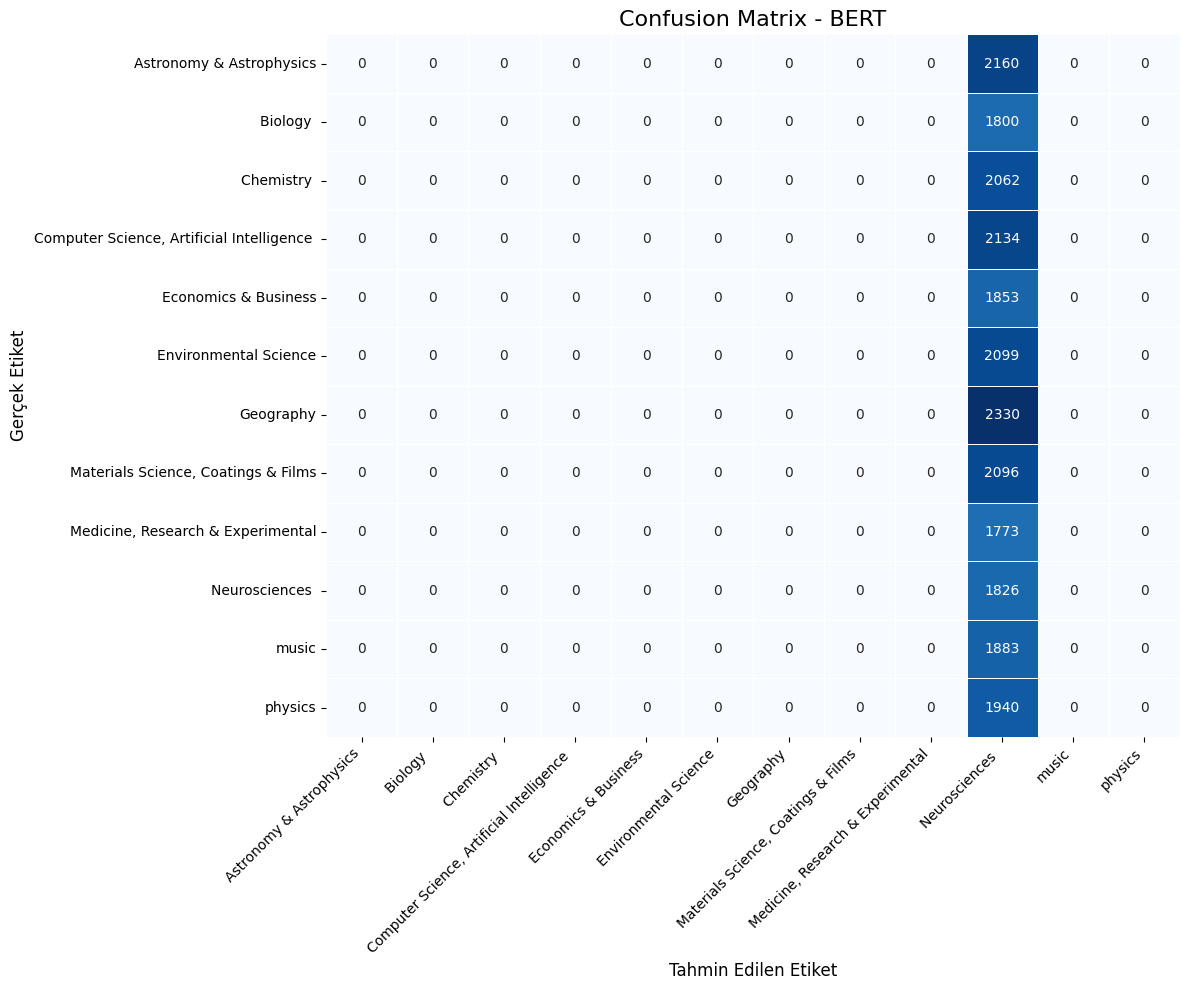


=== Fold 5 ===


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
2995/2995 [==============================] - 684s 216ms/step - loss: 0.2838 - accuracy: 0.9537 - val_loss: 5.9179 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 2/8
2995/2995 [==============================] - 612s 204ms/step - loss: 0.1368 - accuracy: 0.9769 - val_loss: 6.6954 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3/8
2995/2995 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9767
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
2995/2995 [==============================] - 612s 204ms/step - loss: 0.1287 - accuracy: 0.9767 - val_loss: 6.9173 - val_accuracy: 0.0762 - lr: 1.0000e-05
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
749/749 [==============================] - 56s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sınıflandırma Raporu (BERT):
                                            precision    recall  f1-score   support

                  Astronomy & Astrophysics       0.00      0.00      0.00      2160
                                  Biology        0.00      0.00      0.00      1800
                                Chemistry        0.00      0.00      0.00      2062
Computer Science, Artificial Intelligence        0.00      0.00      0.00      2134
                      Economics & Business       0.00      0.00      0.00      1854
                     Environmental Science       0.00      0.00      0.00      2099
                                 Geography       0.00      0.00      0.00      2330
       Materials Science, Coatings & Films       0.00      0.00      0.00      2096
         Medicine, Research & Experimental       0.00      0.00      0.00      1772
                            Neurosciences        0.08      1.00      0.14      1826
                                     music    

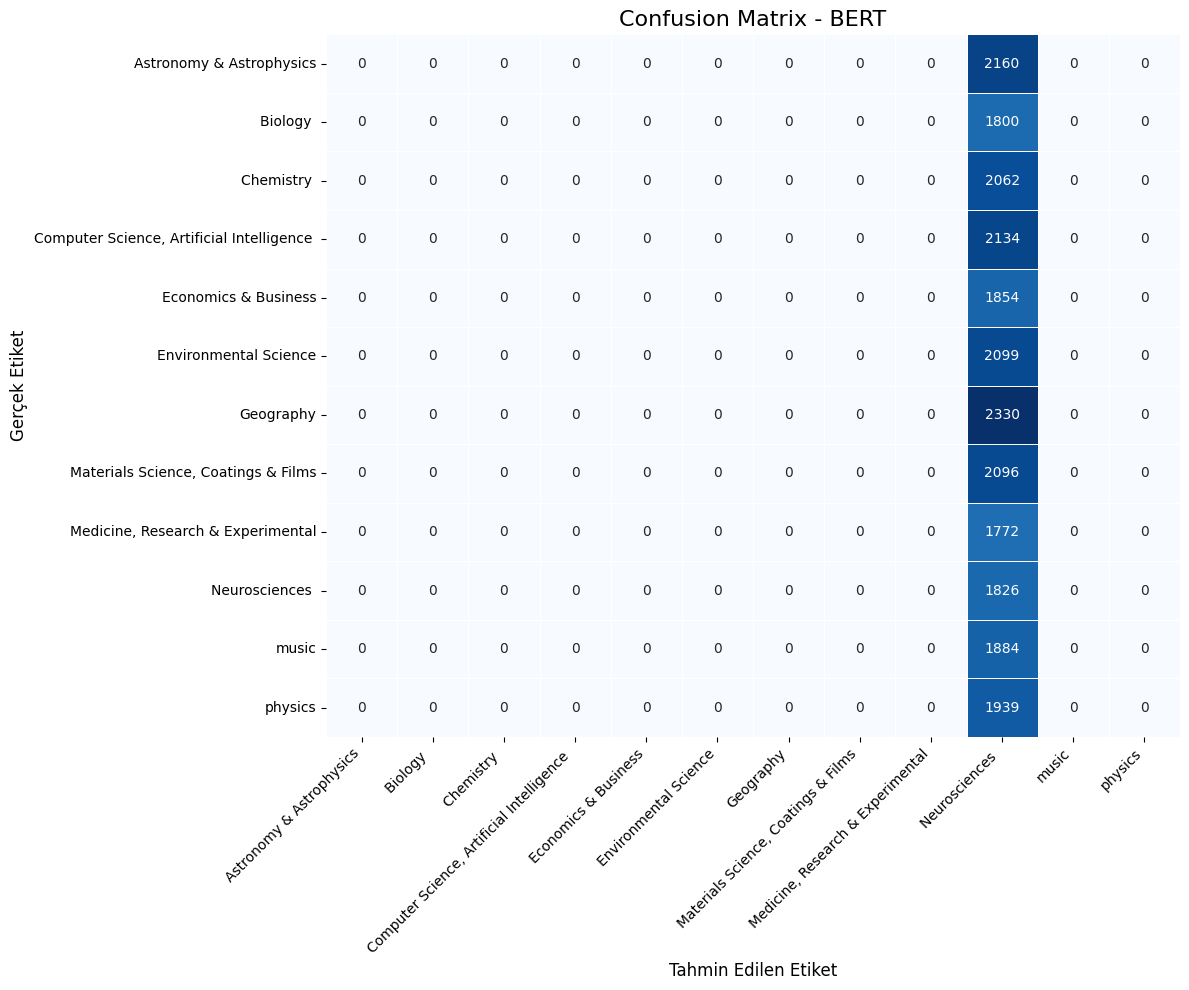


Toplam Eğitim Süreci: 03:13:06

Donanım Bilgileri:
CPU: x86_64
CPU Kullanımı: 8.3 %
RAM: 83.48 GB (Kullanılan: 14.53 GB, Oran: 18.5%)
GPU: NVIDIA A100-SXM4-40GB | Kullanım: 0.0% | Bellek: 17109.0/40960.0 MB


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import GPUtil
import platform

# Adım 1: Veriyi temizleyen fonksiyon
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

# Adım 3: BERT modelini oluşturma
def create_bert_model(num_labels):
    return TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Learning Rate Scheduler
def lr_scheduler():
    return tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Adım 4: BERT modelini eğitme
def train_bert_model(model, train_data, val_data, epochs, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    scheduler = lr_scheduler()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

    model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=[scheduler, early_stopping], verbose=1)
    return model

# Adım 5: Modeli değerlendirme
def evaluate_model(model, val_data, val_labels_encoded, label_encoder):
    predictions = model.predict(val_data)["logits"]
    predicted_labels_encoded = np.argmax(predictions, axis=1)

    decoded_labels = label_encoder.inverse_transform(val_labels_encoded)
    decoded_predictions = label_encoder.inverse_transform(predicted_labels_encoded)

    report = classification_report(decoded_labels, decoded_predictions, target_names=label_encoder.classes_)
    print("Sınıflandırma Raporu (BERT):")
    print(report)

    print("\nSınıf Başına Düşen Eleman Sayısı (Test Seti):")
    unique_labels, counts = np.unique(decoded_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"{label:<40} {count}")

    cm = confusion_matrix(decoded_labels, decoded_predictions, labels=label_encoder.classes_)
    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
    plt.title("Confusion Matrix - BERT", fontsize=16)
    plt.xlabel("Tahmin Edilen Etiket", fontsize=12)
    plt.ylabel("Gerçek Etiket", fontsize=12)
    plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0)
    plt.tight_layout()
    plt.show()

# Ana program
if __name__ == "__main__":
    start_time = time.time()

    file_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx'
    data = pd.read_excel(file_path)
    data['text'] = data['text'].apply(clean_text)

    label_encoder = LabelEncoder()
    data['category_encoded'] = label_encoder.fit_transform(data['category'])

    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    max_length = 256

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(kf.split(data['text'], data['category_encoded']), 1):
        print(f"\n=== Fold {fold} ===")

        X_train, X_val = data['text'].iloc[train_idx], data['text'].iloc[val_idx]
        y_train, y_val = data['category_encoded'].iloc[train_idx], data['category_encoded'].iloc[val_idx]

        train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")
        val_encodings = tokenizer(list(X_val), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")

        train_dataset = tf.data.Dataset.from_tensor_slices(({
            "input_ids": train_encodings["input_ids"],
            "attention_mask": train_encodings["attention_mask"]
        }, y_train)).batch(32)

        val_dataset = tf.data.Dataset.from_tensor_slices(({
            "input_ids": val_encodings["input_ids"],
            "attention_mask": val_encodings["attention_mask"]
        }, y_val)).batch(32)

        model = create_bert_model(num_labels=len(label_encoder.classes_))
        trained_model = train_bert_model(model, train_dataset, val_dataset, epochs=8, learning_rate=1e-5)

        evaluate_model(trained_model, {"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"]}, y_val, label_encoder)

    # Zaman ve donanım bilgisi
    end_time = time.time()
    total_time = time.strftime('%H:%M:%S', time.gmtime(end_time - start_time))
    print(f"\nToplam Eğitim Süreci: {total_time}")
    print("\nDonanım Bilgileri:")
    print(f"CPU: {platform.processor()}")
    print(f"CPU Kullanımı: {psutil.cpu_percent()} %")
    mem = psutil.virtual_memory()
    print(f"RAM: {round(mem.total / (1024**3), 2)} GB (Kullanılan: {round(mem.used / (1024**3), 2)} GB, Oran: {mem.percent}%)")
    gpus = GPUtil.getGPUs()
    if gpus:
        for gpu in gpus:
            print(f"GPU: {gpu.name} | Kullanım: {gpu.load*100:.1f}% | Bellek: {gpu.memoryUsed}/{gpu.memoryTotal} MB")
    else:
        print("GPU: Kullanılamıyor veya tanımlı değil.")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Daha önce tamamlanmış foldlar: [1, 2, 3, 4]

--- Fold 1 zaten tamamlanmış, atlanıyor. ---

--- Fold 2 zaten tamamlanmış, atlanıyor. ---

--- Fold 3 zaten tamamlanmış, atlanıyor. ---

--- Fold 4 zaten tamamlanmış, atlanıyor. ---

=== Fold 5 ===


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
1498/1498 [==============================] - 780s 490ms/step - loss: 0.5038 - accuracy: 0.8459 - val_loss: 0.3429 - val_accuracy: 0.8825 - lr: 2.0000e-05
Epoch 2/10
1498/1498 [==============================] - 696s 465ms/step - loss: 0.2703 - accuracy: 0.9095 - val_loss: 0.3008 - val_accuracy: 0.9010 - lr: 2.0000e-05
Epoch 3/10
1498/1498 [==============================] - 691s 461ms/step - loss: 0.1899 - accuracy: 0.9372 - val_loss: 0.3105 - val_accuracy: 0.9019 - lr: 2.0000e-05
Epoch 4/10
1498/1498 [==============================] - 690s 461ms/step - loss: 0.1310 - accuracy: 0.9573 - val_loss: 0.3454 - val_accuracy: 0.8990 - lr: 2.0000e-05
Epoch 5/10
1498/1498 [==============================] - ETA: 0s - loss: 0.0901 - accuracy: 0.9705
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
1498/1498 [==============================] - 689s 460ms/step - loss: 0.0901 - accuracy: 0.9705 - val_loss: 0.3552 - val_accuracy: 0.9044 - lr: 2.0000e-05
Epoch 6/10
1

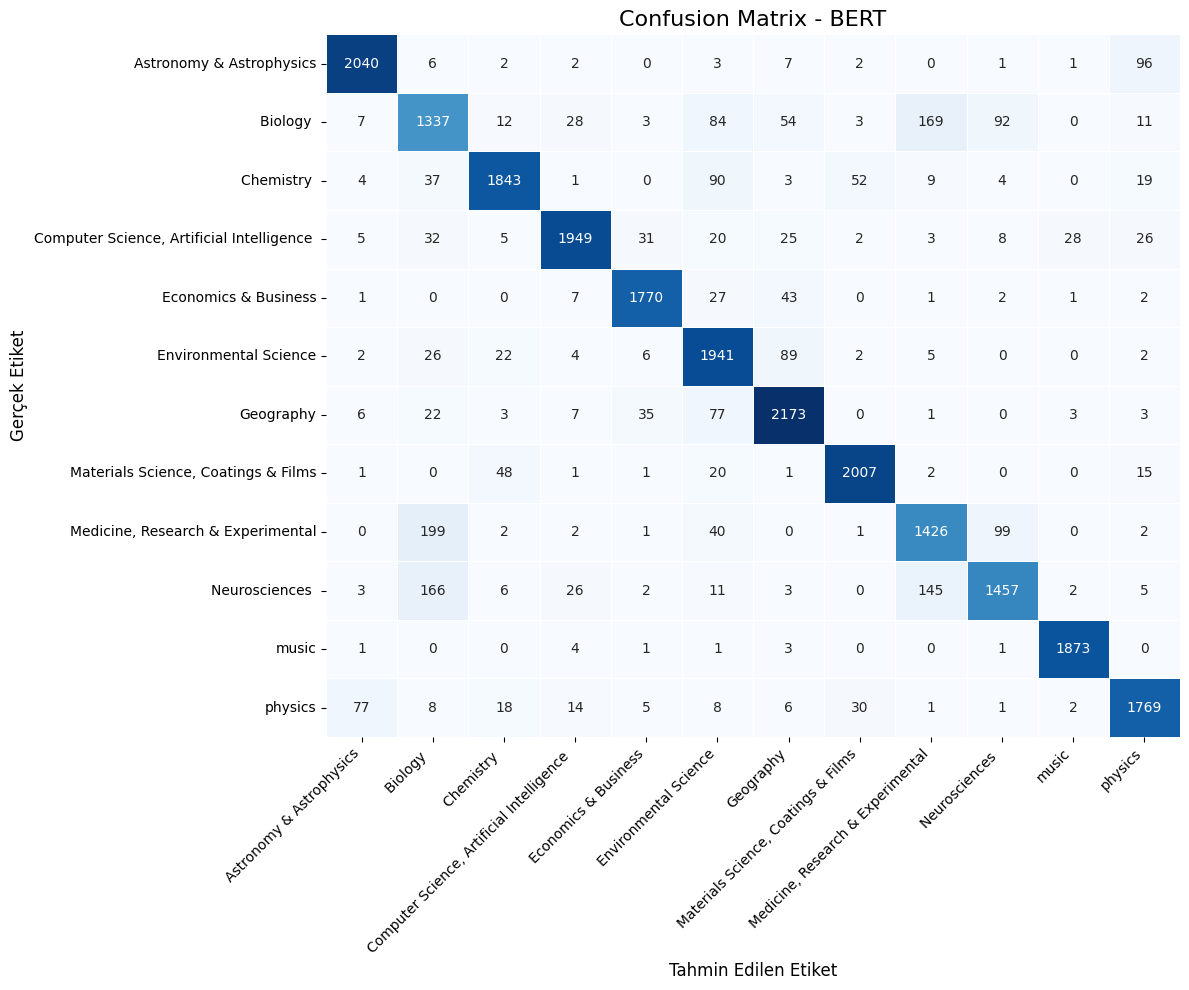

Fold 5 modeli ağırlıkları '/content/drive/MyDrive/bert_kfold_checkpoints/bert_fold_5_weights.h5' konumuna kaydedildi.

Toplam Eğitim Süreci: 01:17:52

Donanım Bilgileri:
CPU: x86_64
CPU Kullanımı: 6.2 %
RAM: 83.48 GB (Kullanılan: 15.56 GB, Oran: 19.7%)
GPU: NVIDIA A100-SXM4-40GB | Kullanım: 0.0% | Bellek: 33299.0/40960.0 MB


In [ ]:
# kod checkpoint özellikli ve kaldığı fold'dan devam edebilen bir K-Fold BERT sınıflandırma modelidir.

import tensorflow as tf

# !!! ÖNEMLİ: Karma duyarlıklı eğitimi en başta etkinleştirin !!!
# Bu, GPU bellek kullanımını optimize eder ve A100 gibi donanımlarda performansı artırır.
tf.keras.mixed_precision.set_global_policy("mixed_float16")

from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import GPUtil
import platform
import os

# Adım 1: Veriyi temizleyen fonksiyon
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

# Adım 3: BERT modelini oluşturma
def create_bert_model(num_labels):
    # Modelin doğru dtype'da başlatıldığından emin olmak için from_pt=True kullanmıyoruz.
    # Mixed precision policy zaten float16'ya dönüştürecektir.
    return TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Learning Rate Scheduler
def lr_scheduler():
    # val_loss'taki ani artışları tolere etmek için patience değerini artırdık.
    # min_lr'yi daha düşük bir değere çekerek daha ince ayarlamalara izin verdik.
    return tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)

# Adım 4: BERT modelini eğitme
def train_bert_model(model, train_data, val_data, epochs, learning_rate):
    # Mixed precision etkin olduğunda, optimize edicinin de hassasiyet uyumlu olması gerekir.
    # Keras'ın yeni sürümleri bunu otomatik olarak halleder.
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Loss fonksiyonunun from_logits=True olması, modelin son katmanının aktivasyon fonksiyonu olmaması durumunda doğrudur.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    scheduler = lr_scheduler()
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

    model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=[scheduler, early_stopping], verbose=1)
    return model

# Adım 5: Modeli değerlendirme
def evaluate_model(model, val_data, val_labels_encoded, label_encoder):
    # Tahmin yaparken model çıktılarının hala float32 olduğundan emin olmak için dtype_policy'e bakılır.
    # Mixed precision durumunda model çıktıları genellikle float32 olarak ayarlanır.
    predictions = model.predict(val_data)["logits"]
    predicted_labels_encoded = np.argmax(predictions, axis=1)

    decoded_labels = label_encoder.inverse_transform(val_labels_encoded)
    decoded_predictions = label_encoder.inverse_transform(predicted_labels_encoded)

    report = classification_report(decoded_labels, decoded_predictions, target_names=label_encoder.classes_, zero_division=0)
    print("Sınıflandırma Raporu (BERT):")
    print(report)

    print("\nSınıf Başına Düşen Eleman Sayısı (Test Seti):")
    unique_labels, counts = np.unique(decoded_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        print(f"{label:<40} {count}")

    cm = confusion_matrix(decoded_labels, decoded_predictions, labels=label_encoder.classes_)
    cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
    plt.title("Confusion Matrix - BERT", fontsize=16)
    plt.xlabel("Tahmin Edilen Etiket", fontsize=12)
    plt.ylabel("Gerçek Etiket", fontsize=12)
    plt.xticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(label_encoder.classes_)) + 0.5, labels=label_encoder.classes_, rotation=0)
    plt.tight_layout()
    plt.show()

# Ana program
if __name__ == "__main__":
    start_time = time.time()

    file_path = '/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx'
    data = pd.read_excel(file_path)
    data['text'] = data['text'].apply(clean_text)

    label_encoder = LabelEncoder()
    data['category_encoded'] = label_encoder.fit_transform(data['category'])

    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    max_length = 384

    save_dir = '/content/drive/MyDrive/bert_kfold_checkpoints'
    os.makedirs(save_dir, exist_ok=True)

    completed_folds_file = os.path.join(save_dir, 'completed_folds.txt')

    completed_folds = set()
    if os.path.exists(completed_folds_file):
        with open(completed_folds_file, 'r') as f:
            for line in f:
                try:
                    completed_folds.add(int(line.strip()))
                except ValueError:
                    continue
    print(f"Daha önce tamamlanmış foldlar: {sorted(list(completed_folds))}")

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(kf.split(data['text'], data['category_encoded']), 1):
        if fold in completed_folds:
            print(f"\n--- Fold {fold} zaten tamamlanmış, atlanıyor. ---")
            continue

        print(f"\n=== Fold {fold} ===")

        X_train, X_val = data['text'].iloc[train_idx], data['text'].iloc[val_idx]
        y_train, y_val = data['category_encoded'].iloc[train_idx], data['category_encoded'].iloc[val_idx]

        train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")
        val_encodings = tokenizer(list(X_val), truncation=True, padding='max_length', max_length=max_length, return_tensors="tf")

        BUFFER_SIZE = tf.data.AUTOTUNE
        # Başarıyı geri kazanmak ve GPU RAM'ı daha çok kullanmak için BATCH_SIZE'ı 64'e geri çıkarıyoruz.
        # Mixed Precision etkin olduğu için bellek hatası almamamız beklenir.
        BATCH_SIZE = 64

        train_dataset = tf.data.Dataset.from_tensor_slices(({
            "input_ids": train_encodings["input_ids"],
            "attention_mask": train_encodings["attention_mask"]
        }, y_train)).shuffle(len(y_train)).batch(BATCH_SIZE).prefetch(BUFFER_SIZE)

        val_dataset = tf.data.Dataset.from_tensor_slices(({
            "input_ids": val_encodings["input_ids"],
            "attention_mask": val_encodings["attention_mask"]
        }, y_val)).batch(BATCH_SIZE).prefetch(BUFFER_SIZE)

        model = create_bert_model(num_labels=len(label_encoder.classes_))

        # Eğer bir önceki fold'dan devam ediliyorsa, model ağırlıklarını yükleyebiliriz.
        # Ancak K-Fold'da her fold bağımsız eğitildiği için genellikle her fold için sıfırdan başlanır.
        # Eğer "kaldığı yerden devam et"ten kastınız, son eğitilen fold'un ağırlıkları ile başlamaksa,
        # bu kısım biraz daha karmaşıklaşır ve genellikle K-Fold ruhuna aykırıdır.
        # Mevcut "devam etme" mekanizması, kesilen fold'dan yeniden eğitime başlamaktır.

        trained_model = train_bert_model(model, train_dataset, val_dataset, epochs=10, learning_rate=2e-5)

        evaluate_model(trained_model, {"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"]}, y_val, label_encoder)

        model_save_path = os.path.join(save_dir, f'bert_fold_{fold}_weights.h5')
        trained_model.save_weights(model_save_path)
        print(f"Fold {fold} modeli ağırlıkları '{model_save_path}' konumuna kaydedildi.")

        with open(completed_folds_file, 'a') as f:
            f.write(f"{fold}\n")
        completed_folds.add(fold)

    end_time = time.time()
    total_time = time.strftime('%H:%M:%S', time.gmtime(end_time - start_time))
    print(f"\nToplam Eğitim Süreci: {total_time}")
    print("\nDonanım Bilgileri:")
    print(f"CPU: {platform.processor()}")
    print(f"CPU Kullanımı: {psutil.cpu_percent()} %")
    mem = psutil.virtual_memory()
    print(f"RAM: {round(mem.total / (1024**3), 2)} GB (Kullanılan: {round(mem.used / (1024**3), 2)} GB, Oran: {mem.percent}%)")
    gpus = GPUtil.getGPUs()
    if gpus:
        for gpu in gpus:
            print(f"GPU: {gpu.name} | Kullanım: {gpu.load*100:.1f}% | Bellek: {gpu.memoryUsed}/{gpu.memoryTotal} MB")
    else:
        print("GPU: Kullanılamıyor veya tanımlı değil.")

[INFO] Sistem: {'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'processor': 'x86_64', 'cores': 12, 'ram_GB': 83.48, 'gpu_names': ['NVIDIA A100-SXM4-40GB']}

--- scibert Veri Temizleme Metrikleri ---
CPU: 30.9% | RAM: 5.51GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 14.28s
----------------------------------------

--- scibert Etiket Kodlama Metrikleri ---
CPU: 7.3% | RAM: 5.51GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 0.02s
----------------------------------------

--- scibert Veri Bölme Metrikleri ---
CPU: 7.7% | RAM: 5.51GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 0.08s
----------------------------------------


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.



--- scibert Model & Tokenizer Hazırla Metrikleri ---
CPU: 11.8% | RAM: 6.60GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 10.0% | 1461.0/40960.0MB
Gerçek Süre: 8.70s
----------------------------------------

--- scibert Tokenleştirme Metrikleri ---
CPU: 75.1% | RAM: 10.61GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 1461.0/40960.0MB
Gerçek Süre: 15.04s
----------------------------------------

--- scibert Dataset Oluşturma Metrikleri ---
CPU: 8.1% | RAM: 10.60GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 1461.0/40960.0MB
Gerçek Süre: 0.16s
----------------------------------------

--- scibert Model Eğitimi Başlıyor ---
Epoch 1/4
5989/5989 [==============================] - 460s 70ms/step - loss: 0.4293 - accuracy: 0.8610 - val_loss: 0.3576 - val_accuracy: 0.8815
Epoch 2/4
5989/5989 [==============================] - 389s 65ms/step - loss: 0.2645 - accuracy: 0.9114 - val_loss: 0.3271 - val_accuracy: 0.8934
Epoch 3/4
5989/5989 [==============================] - 389s 65ms/step - loss: 0.1673 

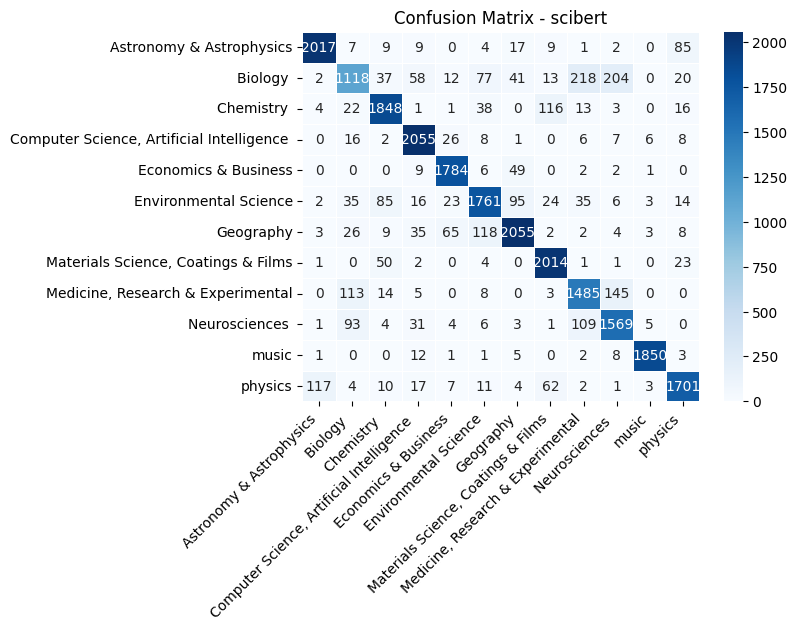

Toplam Doğruluk (Accuracy): 0.8873
Ağırlıklı F1 Skoru: 0.8858


ValueError: y contains previously unseen labels: 'Biology'

In [ ]:
#scibert ile deneme
import time
import psutil
import GPUtil
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import re

def get_system_metrics():
    cpu = psutil.cpu_percent()
    ram = psutil.virtual_memory()
    gpu_info=[]
    try:
        for g in GPUtil.getGPUs():
            gpu_info.append((g.name, f"{g.load*100:.1f}%", f"{g.memoryUsed}/{g.memoryTotal}MB"))
    except:
        gpu_info=[("GPU","Unavailable","")]
    return cpu, ram.used/(1024**3), ram.total/(1024**3), gpu_info

def print_metrics(step, t0, t1):
    cpu, ram_u, ram_t, gpu = get_system_metrics()
    print(f"\n--- {step} Metrikleri ---")
    print(f"CPU: {cpu:.1f}% | RAM: {ram_u:.2f}GB/{ram_t:.2f}GB")
    for name, load, mem in gpu:
        print(f"GPU ({name}): {load} | {mem}")
    print(f"Gerçek Süre: {t1-t0:.2f}s")
    print("-"*40)

if __name__=="__main__":
    info = {
        "platform":platform.platform(),
        "processor":platform.processor(),
        "cores":psutil.cpu_count(),
        "ram_GB":round(psutil.virtual_memory().total/(1024**3),2),
        "gpu_names":[g.name for g in GPUtil.getGPUs()]
    }
    print("[INFO] Sistem:", info)

    # 1) Veri yükle & temizle
    t0 = time.time()
    df = pd.read_excel(
        "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx"
    )[
        ["text","category"]
    ].dropna()
    df["text"] = df["text"].str.replace(r"[^\w\s]","",regex=True).str.lower()
    t1 = time.time()
    print_metrics("scibert Veri Temizleme", t0, t1)

    # 2) Etiket kodlama
    t0 = time.time()
    le = LabelEncoder()
    df["label"] = le.fit_transform(df["category"])
    t1 = time.time()
    print_metrics("scibert Etiket Kodlama", t0, t1)

    # 3) Bölme
    t0 = time.time()
    X_train, X_test, y_train, y_test = train_test_split(
        df["text"].tolist(),
        df["label"].tolist(),
        test_size=0.2,
        random_state=42,
        stratify=df["label"]
    )
    t1 = time.time()
    print_metrics("scibert Veri Bölme", t0, t1)

    # 4) Tokenizer & Model hazırla
    MODEL = "allenai/scibert_scivocab_uncased"
    t0 = time.time()
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = TFAutoModelForSequenceClassification.from_pretrained(
        MODEL,
        num_labels=len(le.classes_),
        from_pt=True
    )
    t1 = time.time()
    print_metrics("scibert Model & Tokenizer Hazırla", t0, t1)

    # 5) Tokenleştirme (max_length=128)
    t0 = time.time()
    enc_train = tokenizer(
        X_train,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="tf"
    )
    enc_test = tokenizer(
        X_test,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="tf"
    )
    t1 = time.time()
    print_metrics("scibert Tokenleştirme", t0, t1)

    # 6) Dataset (batch_size=16)
    t0 = time.time()
    train_ds = tf.data.Dataset.from_tensor_slices((dict(enc_train), y_train))\
                 .shuffle(10000).batch(16).prefetch(tf.data.AUTOTUNE)
    test_ds  = tf.data.Dataset.from_tensor_slices((dict(enc_test),  y_test ))\
                 .batch(16).prefetch(tf.data.AUTOTUNE)
    t1 = time.time()
    print_metrics("scibert Dataset Oluşturma", t0, t1)

    # 7) Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss_fn   = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    # 8) Train (epochs=4)
    print("\n--- scibert Model Eğitimi Başlıyor ---")
    history = model.fit(train_ds, validation_data=test_ds, epochs=4, verbose=1)

    # 9) Değerlendirme
    print("\n--- scibert Model Değerlendirme ---")
    preds = model.predict(test_ds).logits
    y_pred = np.argmax(preds,axis=1)

    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_,
                cmap="Blues", linewidths=0.5)
    plt.title("Confusion Matrix - scibert")
    plt.xticks(rotation=45,ha="right")
    plt.show()

    acc = (y_pred==y_test).mean()
    f1w = f1_score(y_test,y_pred,average="weighted")
    print(f"Toplam Doğruluk (Accuracy): {acc:.4f}")
    print(f"Ağırlıklı F1 Skoru: {f1w:.4f}")

    # 10) Medicine→Biology yanlışları
    idxs = [i for i,(t,p) in enumerate(zip(y_test,y_pred))
            if t==le.transform(["Medicine, Research & Experimental"])[0] and
               p==le.transform(["Biology"])[0]]
    orig_idxs = [df.index[i] for i in idxs]
    print(f"Medicine→Biology yanlışları: {orig_idxs} (Toplam: {len(orig_idxs)})")

    print("\n[INFO] Tamamlandı.")


In [ ]:
!pip install transformers datasets scikit-learn pandas openpyxl -q


In [ ]:
!pip install transformers datasets evaluate scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


[INFO] Sistem: {'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'processor': 'x86_64', 'cores': 12, 'ram_GB': 83.48, 'gpu_names': ['NVIDIA A100-SXM4-40GB']}

--- scibert Veri Temizleme Metrikleri ---
CPU: 6.8% | RAM: 16.55GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 33357.0/40960.0MB
Gerçek Süre: 11.62s
----------------------------------------

--- scibert Etiket Kodlama Metrikleri ---
CPU: 16.7% | RAM: 16.55GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 33357.0/40960.0MB
Gerçek Süre: 0.02s
----------------------------------------

--- scibert Veri Bölme Metrikleri ---
CPU: 18.4% | RAM: 16.54GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 33357.0/40960.0MB
Gerçek Süre: 0.08s
----------------------------------------


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



--- scibert Model & Tokenizer Hazırla Metrikleri ---
CPU: 8.7% | RAM: 16.58GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 13.0% | 33357.0/40960.0MB
Gerçek Süre: 1.84s
----------------------------------------

--- scibert Tokenleştirme Metrikleri ---
CPU: 69.2% | RAM: 20.31GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 33357.0/40960.0MB
Gerçek Süre: 16.51s
----------------------------------------

--- scibert Dataset Oluşturma Metrikleri ---
CPU: 13.1% | RAM: 20.38GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 33357.0/40960.0MB
Gerçek Süre: 1.45s
----------------------------------------

--- scibert Model Eğitimi Başlıyor ---
Epoch 1/4
5989/5989 [==============================] - 616s 95ms/step - loss: 0.4263 - accuracy: 0.8627 - val_loss: 0.3374 - val_accuracy: 0.8860
Epoch 2/4
5989/5989 [==============================] - 547s 91ms/step - loss: 0.2615 - accuracy: 0.9125 - val_loss: 0.3315 - val_accuracy: 0.8916
Epoch 3/4
5989/5989 [==============================] - 544s 91ms/step - loss: 0.1

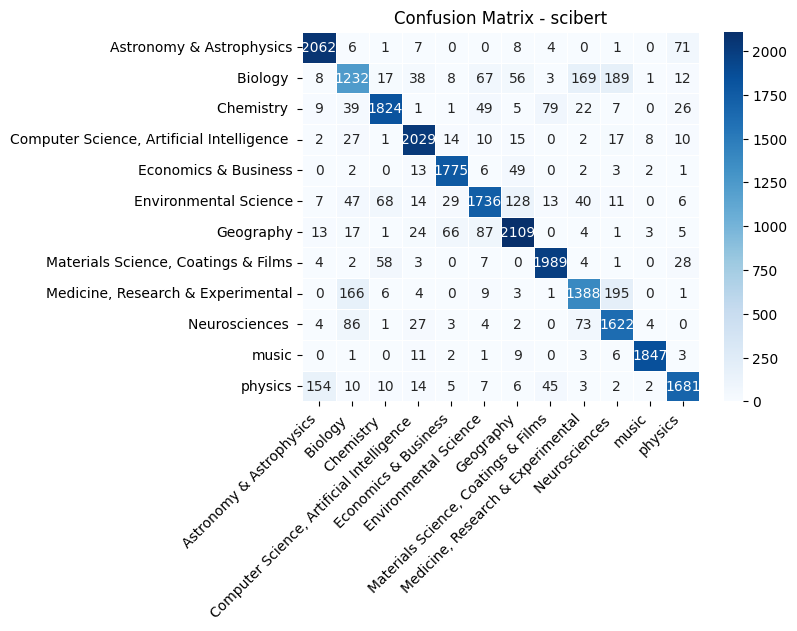

Toplam Doğruluk (Accuracy): 0.8889
Ağırlıklı F1 Skoru: 0.8881


ValueError: y contains previously unseen labels: 'Biology'

In [ ]:
#yukarıdaki scibert üzerine geliştirme denemesi.
import time
import psutil
import GPUtil
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import re

def get_system_metrics():
    cpu = psutil.cpu_percent()
    ram = psutil.virtual_memory()
    gpu_info=[]
    try:
        for g in GPUtil.getGPUs():
            gpu_info.append((g.name, f"{g.load*100:.1f}%", f"{g.memoryUsed}/{g.memoryTotal}MB"))
    except:
        gpu_info=[("GPU","Unavailable","")]
    return cpu, ram.used/(1024**3), ram.total/(1024**3), gpu_info

def print_metrics(step, t0, t1):
    cpu, ram_u, ram_t, gpu = get_system_metrics()
    print(f"\n--- {step} Metrikleri ---")
    print(f"CPU: {cpu:.1f}% | RAM: {ram_u:.2f}GB/{ram_t:.2f}GB")
    for name, load, mem in gpu:
        print(f"GPU ({name}): {load} | {mem}")
    print(f"Gerçek Süre: {t1-t0:.2f}s")
    print("-"*40)

if __name__=="__main__":
    info = {
        "platform":platform.platform(),
        "processor":platform.processor(),
        "cores":psutil.cpu_count(),
        "ram_GB":round(psutil.virtual_memory().total/(1024**3),2),
        "gpu_names":[g.name for g in GPUtil.getGPUs()]
    }
    print("[INFO] Sistem:", info)

    # 1) Veri yükle & temizle
    t0 = time.time()
    df = pd.read_excel(
        "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx"
    )[
        ["text","category"]
    ].dropna()
    df["text"] = df["text"].str.replace(r"[^\w\s]","",regex=True).str.lower()
    t1 = time.time()
    print_metrics("scibert Veri Temizleme", t0, t1)

    # 2) Etiket kodlama
    t0 = time.time()
    le = LabelEncoder()
    df["label"] = le.fit_transform(df["category"])
    t1 = time.time()
    print_metrics("scibert Etiket Kodlama", t0, t1)

    # 3) Bölme
    t0 = time.time()
    X_train, X_test, y_train, y_test = train_test_split(
        df["text"].tolist(),
        df["label"].tolist(),
        test_size=0.2,
        random_state=42,
        stratify=df["label"]
    )
    t1 = time.time()
    print_metrics("scibert Veri Bölme", t0, t1)

    # 4) Tokenizer & Model hazırla
    MODEL = "allenai/scibert_scivocab_uncased"
    t0 = time.time()
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = TFAutoModelForSequenceClassification.from_pretrained(
        MODEL,
        num_labels=len(le.classes_),
        from_pt=True
    )
    t1 = time.time()
    print_metrics("scibert Model & Tokenizer Hazırla", t0, t1)

    # 5) Tokenleştirme (max_length=128)
    t0 = time.time()
    enc_train = tokenizer(
        X_train,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="tf"
    )
    enc_test = tokenizer(
        X_test,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="tf"
    )
    t1 = time.time()
    print_metrics("scibert Tokenleştirme", t0, t1)

    # 6) Dataset (batch_size=16)
    t0 = time.time()
    train_ds = tf.data.Dataset.from_tensor_slices((dict(enc_train), y_train))\
                 .shuffle(10000).batch(16).prefetch(tf.data.AUTOTUNE)
    test_ds  = tf.data.Dataset.from_tensor_slices((dict(enc_test),  y_test ))\
                 .batch(16).prefetch(tf.data.AUTOTUNE)
    t1 = time.time()
    print_metrics("scibert Dataset Oluşturma", t0, t1)

    # 7) Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss_fn   = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    # 8) Train (epochs=4)
    print("\n--- scibert Model Eğitimi Başlıyor ---")
    history = model.fit(train_ds, validation_data=test_ds, epochs=4, verbose=1)

    # 9) Değerlendirme
    print("\n--- scibert Model Değerlendirme ---")
    preds = model.predict(test_ds).logits
    y_pred = np.argmax(preds,axis=1)

    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_,
                cmap="Blues", linewidths=0.5)
    plt.title("Confusion Matrix - scibert")
    plt.xticks(rotation=45,ha="right")
    plt.show()

    acc = (y_pred==y_test).mean()
    f1w = f1_score(y_test,y_pred,average="weighted")
    print(f"Toplam Doğruluk (Accuracy): {acc:.4f}")
    print(f"Ağırlıklı F1 Skoru: {f1w:.4f}")

    # 10) Medicine→Biology yanlışları
    idxs = [i for i,(t,p) in enumerate(zip(y_test,y_pred))
            if t==le.transform(["Medicine, Research & Experimental"])[0] and
               p==le.transform(["Biology"])[0]]
    orig_idxs = [df.index[i] for i in idxs]
    print(f"Medicine→Biology yanlışları: {orig_idxs} (Toplam: {len(orig_idxs)})")

    print("\n[INFO] Tamamlandı.")

[INFO] Sistem: {'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'processor': 'x86_64', 'cores': 12, 'ram_GB': 83.48, 'gpu_names': ['NVIDIA A100-SXM4-40GB']}

--- scibert Veri Temizleme Metrikleri ---
CPU: 14.5% | RAM: 3.87GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 14.35s
----------------------------------------

--- scibert Etiket Kodlama Metrikleri ---
CPU: 43.5% | RAM: 3.89GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 0.02s
----------------------------------------

--- scibert Veri Bölme Metrikleri ---
CPU: 30.5% | RAM: 3.91GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 0.0/40960.0MB
Gerçek Süre: 0.09s
----------------------------------------


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.



--- scibert Model & Tokenizer Hazırla Metrikleri ---
CPU: 26.0% | RAM: 5.97GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 10.0% | 1461.0/40960.0MB
Gerçek Süre: 8.56s
----------------------------------------

--- scibert Tokenleştirme Metrikleri ---
CPU: 66.6% | RAM: 10.83GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 1461.0/40960.0MB
Gerçek Süre: 19.48s
----------------------------------------

--- scibert Dataset Oluşturma Metrikleri ---
CPU: 10.5% | RAM: 10.83GB/83.48GB
GPU (NVIDIA A100-SXM4-40GB): 0.0% | 1461.0/40960.0MB
Gerçek Süre: 0.16s
----------------------------------------

--- scibert Model Eğitimi Başlıyor ---
Epoch 1/4
5989/5989 [==============================] - 462s 70ms/step - loss: 0.4219 - accuracy: 0.8625 - val_loss: 0.3406 - val_accuracy: 0.8858
Epoch 2/4
5989/5989 [==============================] - 395s 66ms/step - loss: 0.2628 - accuracy: 0.9126 - val_loss: 0.3260 - val_accuracy: 0.8926
Epoch 3/4
5989/5989 [==============================] - 394s 66ms/step - loss: 0.1670

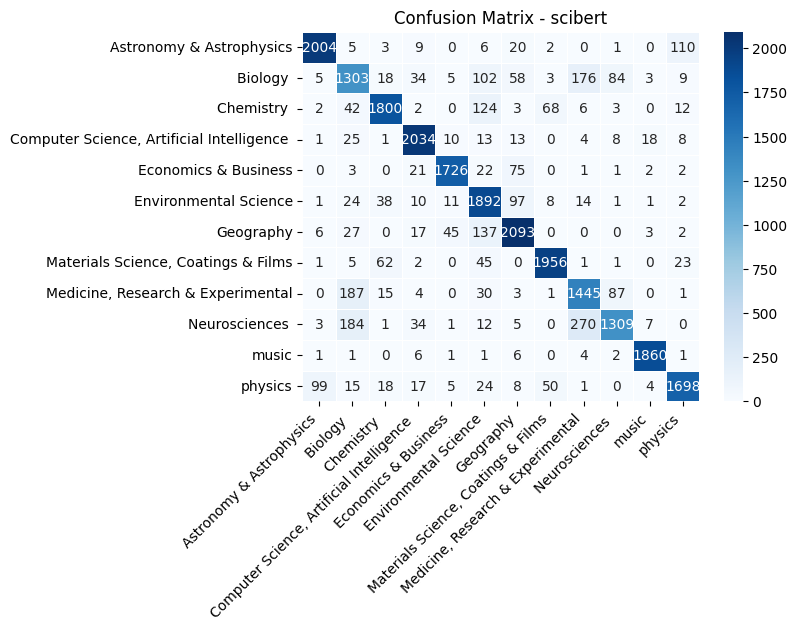

Toplam Doğruluk (Accuracy): 0.8816
Ağırlıklı F1 Skoru: 0.8817
En çok karışan sınıflar: Neurosciences  -> Medicine, Research & Experimental
Yanlış sınıflandırılan örnekler (satır numaraları): [203, 226, 368, 664, 739, 888, 893, 996, 1001, 1066, 1125, 1167, 1309, 1336, 1356, 1363, 1414, 1434, 1559, 1574, 1692, 1767, 1769, 1780, 1959, 1965, 2131, 2176, 2448, 2528, 2671, 2925, 2988, 3167, 3203, 3263, 3413, 3456, 3484, 3691, 3726, 3750, 3801, 3806, 3955, 3959, 4113, 4220, 4250, 4270, 4356, 4422, 4705, 4736, 4835, 4844, 4863, 4909, 5244, 5333, 5443, 5454, 5506, 5542, 5596, 5618, 5683, 5959, 5982, 6187, 6223, 6242, 6501, 6580, 6728, 6808, 6897, 6923, 6986, 7022, 7103, 7114, 7154, 7264, 7276, 7379, 7543, 7652, 7669, 7818, 7833, 7834, 7879, 7952, 7960, 8033, 8057, 8161, 8268, 8331, 8515, 8555, 8590, 8783, 8875, 8885, 8919, 8951, 9021, 9026, 9144, 9219, 9239, 9432, 9540, 9604, 9712, 9758, 9804, 9852, 9988, 10067, 10216, 10302, 10619, 10633, 10745, 10847, 10916, 10919, 11073, 11124, 11131, 11181,

In [ ]:
#yukarıdaki scibert üzerine geliştirme denemesi.

import time
import psutil
import GPUtil
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import re

def get_system_metrics():
    cpu = psutil.cpu_percent()
    ram = psutil.virtual_memory()
    gpu_info = []
    try:
        for g in GPUtil.getGPUs():
            gpu_info.append((g.name, f"{g.load*100:.1f}%", f"{g.memoryUsed}/{g.memoryTotal}MB"))
    except:
        gpu_info = [("GPU","Unavailable","")]
    return cpu, ram.used/(1024**3), ram.total/(1024**3), gpu_info

def print_metrics(step, t0, t1):
    cpu, ram_u, ram_t, gpu = get_system_metrics()
    print(f"\n--- {step} Metrikleri ---")
    print(f"CPU: {cpu:.1f}% | RAM: {ram_u:.2f}GB/{ram_t:.2f}GB")
    for name, load, mem in gpu:
        print(f"GPU ({name}): {load} | {mem}")
    print(f"Gerçek Süre: {t1-t0:.2f}s")
    print("-"*40)

if __name__ == "__main__":
    # Sistem bilgisi
    info = {
        "platform": platform.platform(),
        "processor": platform.processor(),
        "cores": psutil.cpu_count(),
        "ram_GB": round(psutil.virtual_memory().total/(1024**3),2),
        "gpu_names": [g.name for g in GPUtil.getGPUs()]
    }
    print("[INFO] Sistem:", info)

    # 1) Veri yükle & temizle
    t0 = time.time()
    df = pd.read_excel(
        "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/bbc_data_Format_151K.xlsx"
    )[['text','category']].dropna()
    df['text'] = df['text'].str.replace(r'[^\w\s]','',regex=True).str.lower()
    t1 = time.time()
    print_metrics("scibert Veri Temizleme", t0, t1)

    # 2) Etiket kodlama
    t0 = time.time()
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['category'])
    t1 = time.time()
    print_metrics("scibert Etiket Kodlama", t0, t1)

    # 3) Bölme
    t0 = time.time()
    X_train, X_test, y_train, y_test = train_test_split(
        df['text'].tolist(), df['label'].tolist(),
        test_size=0.2, random_state=42, stratify=df['label']
    )
    t1 = time.time()
    print_metrics("scibert Veri Bölme", t0, t1)

    # 4) Tokenizer & Model hazırla
    MODEL = "allenai/scibert_scivocab_uncased"
    t0 = time.time()
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = TFAutoModelForSequenceClassification.from_pretrained(
        MODEL, num_labels=len(le.classes_), from_pt=True
    )
    t1 = time.time()
    print_metrics("scibert Model & Tokenizer Hazırla", t0, t1)

    # 5) Tokenleştirme (max_length=128)
    t0 = time.time()
    enc_train = tokenizer(
        X_train, truncation=True, padding="max_length", max_length=128, return_tensors="tf"
    )
    enc_test = tokenizer(
        X_test, truncation=True, padding="max_length", max_length=128, return_tensors="tf"
    )
    t1 = time.time()
    print_metrics("scibert Tokenleştirme", t0, t1)

    # 6) Dataset (batch_size=16)
    t0 = time.time()
    train_ds = tf.data.Dataset.from_tensor_slices((dict(enc_train), y_train))\
                 .shuffle(10000).batch(16).prefetch(tf.data.AUTOTUNE)
    test_ds  = tf.data.Dataset.from_tensor_slices((dict(enc_test),  y_test))\
                 .batch(16).prefetch(tf.data.AUTOTUNE)
    t1 = time.time()
    print_metrics("scibert Dataset Oluşturma", t0, t1)

    # 7) Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss_fn   = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

    # 8) Train (epochs=4)
    print("\n--- scibert Model Eğitimi Başlıyor ---")
    history = model.fit(train_ds, validation_data=test_ds, epochs=4, verbose=1)

    # 9) Değerlendirme
    print("\n--- scibert Model Değerlendirme ---")
    preds = model.predict(test_ds).logits
    y_pred = np.argmax(preds, axis=1)

    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=le.classes_, yticklabels=le.classes_,
                cmap="Blues", linewidths=0.5)
    plt.title("Confusion Matrix - scibert")
    plt.xticks(rotation=45,ha="right")
    plt.show()

    acc = (y_pred == y_test).mean()
    f1w = f1_score(y_test, y_pred, average="weighted")
    print(f"Toplam Doğruluk (Accuracy): {acc:.4f}")
    print(f"Ağırlıklı F1 Skoru: {f1w:.4f}")

    # 10) En çok karışan iki sınıf arasındaki hatalı örnekler
    cm_counts = confusion_matrix(y_test, y_pred)
    np.fill_diagonal(cm_counts, 0)
    i, j = np.unravel_index(cm_counts.argmax(), cm_counts.shape)
    mis_idxs = [idx for idx,(t,p) in enumerate(zip(y_test,y_pred)) if t==i and p==j]
    orig_idxs = [df.index[idx] for idx in mis_idxs]
    print(f"En çok karışan sınıflar: {le.classes_[i]} -> {le.classes_[j]}")
    print(f"Yanlış sınıflandırılan örnekler (satır numaraları): {orig_idxs}")

    print("\n[INFO] Tamamlandı.")

In [ ]:
!pip install sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.3 MB/s eta 0:00:00


In [ ]:
# Complete runnable pipeline — minimal risk, no TF usage
# Requirements:
# pip install -U sentence-transformers faiss-cpu scikit-learn gradio

import os
import re
import logging
import warnings
import numpy as np
import pandas as pd
import faiss
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer, util
from collections import Counter
import gradio as gr

# logging
warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)
os.environ["WANDB_DISABLED"] = "true"

# ----------- CONFIG ------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"  # must contain: abstract, jurnal_rep
ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"  # fast & reliable
ENCODER_PATH = os.path.join(SAVE_DIR, "abstract_encoder_final")
EMBEDDINGS_PATH = os.path.join(SAVE_DIR, "abstract_embeddings.npy")
METADATA_PATH = os.path.join(SAVE_DIR, "metadata.pkl")
JOURNAL_EMB_PATH = os.path.join(SAVE_DIR, "journal_embeddings.npy")
JOURNAL_ORDER_PATH = os.path.join(SAVE_DIR, "journal_order.npy")
CLASSIFIER_PATH = os.path.join(SAVE_DIR, "journal_clf.joblib")

TOP_K = 20
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# -------------------------------

# utilities
def clean_text(text):
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'[\W_]+', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

def read_inputs(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found.")
    df = pd.read_csv(path)
    # Accept more column name variations
    if 'abstract' not in df.columns:
        raise ValueError("CSV must contain 'abstract' column.")
    if 'jurnal_rep' not in df.columns and 'journal' not in df.columns:
        raise ValueError("CSV must contain 'jurnal_rep' or 'journal' column.")
    if 'jurnal_rep' not in df.columns:
        df = df.rename(columns={'journal':'jurnal_rep'})
    df = df[['abstract','jurnal_rep']].dropna().reset_index(drop=True)
    df['cleaned_abstract'] = df['abstract'].astype(str).apply(clean_text)
    return df

# Step 1: build or load encoder
def get_encoder(model_name=ENCODER_MODEL_NAME, save_path=ENCODER_PATH):
    if os.path.exists(save_path):
        logging.info("Loading saved SentenceTransformer encoder from %s" % save_path)
        encoder = SentenceTransformer(save_path)
    else:
        logging.info("Loading SentenceTransformer base model: %s" % model_name)
        encoder = SentenceTransformer(model_name)
    return encoder

# Step 2: compute abstract embeddings (save to disk)
def compute_and_save_embeddings(encoder, df, embeddings_path=EMBEDDINGS_PATH, metadata_path=METADATA_PATH, device=DEVICE):
    if os.path.exists(embeddings_path) and os.path.exists(metadata_path):
        logging.info("Loading existing embeddings and metadata.")
        embs = np.load(embeddings_path, mmap_mode='r')
        meta = pd.read_pickle(metadata_path)
        return embs, meta
    texts = df['cleaned_abstract'].tolist()
    logging.info("Computing embeddings for %d texts on device=%s..." % (len(texts), device))
    try:
        emb_array = encoder.encode(texts, show_progress_bar=True, convert_to_numpy=True, device=device)
    except TypeError:
        emb_array = encoder.encode(texts, show_progress_bar=True, convert_to_numpy=True)
    # normalize
    norms = np.linalg.norm(emb_array, axis=1, keepdims=True)
    norms[norms==0]=1.0
    emb_array = emb_array / norms
    os.makedirs(os.path.dirname(embeddings_path), exist_ok=True)
    np.save(embeddings_path, emb_array)
    meta = df[['abstract','jurnal_rep','cleaned_abstract']].copy()
    meta.to_pickle(metadata_path)
    logging.info("Saved embeddings and metadata.")
    return emb_array, meta

# Step 3: compute deterministic journal order and mean embeddings
def build_journal_matrix(embeddings, meta, journal_emb_path=JOURNAL_EMB_PATH, journal_order_path=JOURNAL_ORDER_PATH):
    # deterministic journal order
    journals = sorted(meta['jurnal_rep'].unique().tolist())
    logging.info("Number of unique journals: %d" % len(journals))
    # map indices by journal
    idxs_by_journal = {}
    for idx, j in enumerate(meta['jurnal_rep'].tolist()):
        idxs_by_journal.setdefault(j, []).append(idx)
    journal_embs = []
    final_journals = []
    for j in journals:
        idxs = idxs_by_journal.get(j, [])
        if not idxs:
            continue
        mat = embeddings[np.array(idxs)]
        mean_vec = np.mean(mat, axis=0)
        # normalize
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)
        journal_embs.append(mean_vec.astype('float32'))
        final_journals.append(j)
    journal_matrix = np.stack(journal_embs, axis=0)
    np.save(journal_emb_path, journal_matrix)
    np.save(journal_order_path, np.array(final_journals, dtype=object))
    logging.info("Journal matrix built with shape %s" % (str(journal_matrix.shape),))
    return journal_matrix, final_journals

# Step 4: optionally train a journal classifier (LogisticRegression) on embeddings -> journal_idx
def train_journal_classifier(embeddings, meta, journals_order, save_path=CLASSIFIER_PATH):
    # create labels per sample mapping to journal idx
    journal_to_idx = {j:i for i,j in enumerate(journals_order)}
    y = np.array([journal_to_idx[j] for j in meta['jurnal_rep'].tolist()])
    X = embeddings
    logging.info("Training LogisticRegression classifier (samples=%d, classes=%d)..." % (X.shape[0], len(journals_order)))
    clf = LogisticRegression(max_iter=1000, verbose=0, n_jobs=-1)
    clf.fit(X, y)
    # save
    try:
        import joblib
        joblib.dump(clf, save_path)
    except Exception:
        pass
    logging.info("Classifier trained and (attempted) saved.")
    return clf

# Step 5: build FAISS index
def build_faiss_index(journal_matrix):
    # journal_matrix: (n_journals, dim) float32 normalized
    dim = journal_matrix.shape[1]
    index = faiss.IndexFlatIP(dim)  # inner product on normalized vectors -> cosine
    index.add(journal_matrix.astype('float32'))
    logging.info("FAISS index built, ntotal=%d" % index.ntotal)
    return index

# Inference: recommend
def recommend(encoder, faiss_index, journals_order, clf, text, top_k=TOP_K, device=DEVICE):
    if not text or text.strip()=="":
        return {"error":"Empty input"}
    q = clean_text(text)
    try:
        q_emb = encoder.encode([q], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q], convert_to_numpy=True)
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)
    D, I = faiss_index.search(q_emb.astype('float32'), top_k)
    sims = D[0].tolist()
    idxs = I[0].tolist()
    recs = []
    for i, s in zip(idxs, sims):
        recs.append((journals_order[i], float(s)))
    # classifier top-3 (if clf provided)
    clf_preds = None
    if clf is not None:
        probs = clf.predict_proba(q_emb)  # shape (1, n_classes)
        topk = probs.argsort()[0][::-1][:min(5, probs.shape[1])]
        clf_preds = [(journals_order[i], float(probs[0][i])) for i in topk]
    return {"recs":recs, "clf_preds":clf_preds}

# Main: orchestrate everything
def setup_pipeline(force_recompute_embeddings=False, train_classifier=True):
    encoder = get_encoder()
    df = read_inputs(PROCESSED_DATA_PATH)
    # embeddings
    if (not force_recompute_embeddings) and os.path.exists(EMBEDDINGS_PATH) and os.path.exists(METADATA_PATH):
        logging.info("Loading saved embeddings")
        embs = np.load(EMBEDDINGS_PATH, mmap_mode='r')
        meta = pd.read_pickle(METADATA_PATH)
    else:
        embs, meta = compute_and_save_embeddings(encoder, df, embeddings_path=EMBEDDINGS_PATH, metadata_path=METADATA_PATH, device=DEVICE)
    # journal matrix
    if os.path.exists(JOURNAL_EMB_PATH) and os.path.exists(JOURNAL_ORDER_PATH) and not force_recompute_embeddings:
        journal_matrix = np.load(JOURNAL_EMB_PATH)
        journals_order = list(np.load(JOURNAL_ORDER_PATH, allow_pickle=True).tolist())
        logging.info("Loaded existing journal matrix")
    else:
        journal_matrix, journals_order = build_journal_matrix(embs, meta, journal_emb_path=JOURNAL_EMB_PATH, journal_order_path=JOURNAL_ORDER_PATH)
    # classifier
    clf = None
    if train_classifier:
        try:
            clf = train_journal_classifier(embs, meta, journals_order)
        except Exception as e:
            logging.warning("Classifier training failed: %s" % str(e))
            clf = None
    # faiss index
    index = build_faiss_index(journal_matrix)
    return {
        "encoder": encoder,
        "embeddings": embs,
        "meta": meta,
        "journal_matrix": journal_matrix,
        "journals_order": journals_order,
        "clf": clf,
        "faiss_index": index
    }

# Gradio wrapper
def gradio_fn(user_text):
    global PIPELINE
    out = recommend(PIPELINE['encoder'], PIPELINE['faiss_index'], PIPELINE['journals_order'], PIPELINE['clf'], user_text, top_k=TOP_K, device=DEVICE)
    if 'error' in out:
        return out['error']
    s = ""
    if out['clf_preds'] is not None:
        s += "### Classifier top suggestions (journal indices & probs)\n"
        for j, p in out['clf_preds']:
            s += f"- {j}  (p={p:.4f})\n"
        s += "\n---\n"
    s += f"### Top {TOP_K} FAISS recommendations (journal, similarity)\n"
    for i,(j,score) in enumerate(out['recs'], start=1):
        s += f"{i}. **{j}**  (sim={score:.4f})\n"
    return s

# Run pipeline and launch UI
if __name__ == "__main__":
    logging.info("Device: %s" % DEVICE)
    PIPELINE = setup_pipeline(force_recompute_embeddings=False, train_classifier=True)
    # quick test
    sample = "A novel graph convolutional network for node classification in citation networks with experiments on Cora and PubMed."
    print("Sample recommendation (dev test):")
    print(gradio_fn(sample)[:1000])

    iface = gr.Interface(fn=gradio_fn, inputs=gr.Textbox(lines=5, placeholder="Paste abstract here..."), outputs="markdown",
                         title="Journal recommender (Embedding + FAISS)", description="Embeddings with SentenceTransformer + FAISS. Optional LR classifier for journals.")
    iface.launch(share=True)


Batches:   0%|          | 0/2091 [00:00<?, ?it/s]

Sample recommendation (dev test):
### Classifier top suggestions (journal indices & probs)
- NEUROCOMPUTING  (p=0.0547)
- PATTERN RECOGNITION LETTERS  (p=0.0434)
- CONCEPTUAL STRUCTURES  (p=0.0211)
- ADVANCES IN ARTIFICIAL INTELLIGENCE, PROCEEDINGS  (p=0.0210)
- DISCOVERY SCIENCE, PROCEEDINGS  (p=0.0191)

---
### Top 20 FAISS recommendations (journal, similarity)
1. **FEDERATION OVER THE WEB**  (sim=0.3384)
2. **ADVANCED DISTRUBUTED SYSTEMS**  (sim=0.3298)
3. **DISCOVERY SCIENCE, PROCEEDINGS**  (sim=0.3251)
4. **COMPUTER NETWORKS**  (sim=0.3227)
5. **ACTIVE MINING**  (sim=0.3184)
6. **JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY**  (sim=0.3182)
7. **LARGE-SCALE PARALLEL DATA MINING**  (sim=0.3165)
8. **INTERNATIONAL JOURNAL ON DOCUMENT ANALYSIS AND RECOGNITION**  (sim=0.3133)
9. **SOCIAL & CULTURAL GEOGRAPHY**  (sim=0.3043)
10. **KNOWLEDGE DISCOVERY AND DATA MINING, PROCEEDINGS**  (sim=0.3032)
11. **MANAGING KNOWLEDGE IN A WORLD OF NETWORKS, PROCEEDINGS**  (si

In [ ]:
# Çalışır pipeline: kategori + öneri
import os, re, logging, warnings
import numpy as np, pandas as pd, faiss, torch
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer, util
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)
os.environ["WANDB_DISABLED"] = "true"

# ---- CONFIG ----
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"
# CSV must have columns: abstract, jurnal_rep, category
ENCODER_MODEL = "all-MiniLM-L6-v2"
TOP_K = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# ----------------

def clean_text(text):
    if not isinstance(text, str):
        return ""
    t = text.lower()
    t = re.sub(r'<.*?>',' ', t)
    t = re.sub(r'[\W_]+',' ', t)
    t = re.sub(r'\s+',' ', t).strip()
    return t

def read_data(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} yok.")
    df = pd.read_csv(path)
    if not {'abstract','jurnal_rep','category'}.issubset(df.columns):
        raise ValueError("CSV 'abstract','jurnal_rep','category' kolonlarını içermeli.")
    df = df[['abstract','jurnal_rep','category']].dropna().reset_index(drop=True)
    df['cleaned'] = df['abstract'].apply(clean_text)
    return df

def encode_all(encoder, texts):
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, device=DEVICE, show_progress_bar=True)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)
    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms==0] = 1.0
    return embs / norms

def build_journal_matrix(embeddings, jurnal_reps):
    uniq = sorted(list(set(jurnal_reps)))
    map_idxs = {j:i for i,j in enumerate(uniq)}
    emb_sum = {j: [] for j in uniq}
    for emb, j in zip(embeddings, jurnal_reps):
        emb_sum[j].append(emb)
    journal_embs = []
    journal_list = []
    for j in uniq:
        mat = np.stack(emb_sum[j], axis=0).astype('float32')
        m = np.mean(mat, axis=0)
        m = m / (np.linalg.norm(m)+1e-12)
        journal_embs.append(m)
        journal_list.append(j)
    return np.stack(journal_embs, axis=0), journal_list

def build_faiss(journal_matrix):
    faiss.normalize_L2(journal_matrix)
    idx = faiss.IndexFlatIP(journal_matrix.shape[1])
    idx.add(journal_matrix.astype('float32'))
    return idx

def train_category_clf(X, y):
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(X, y)
    return clf

# --- Setup pipeline ---
df = read_data(PROCESSED_DATA_PATH)
encoder = SentenceTransformer(ENCODER_MODEL)
embeddings = encode_all(encoder, df['cleaned'].tolist())

journal_matrix, journal_list = build_journal_matrix(embeddings, df['jurnal_rep'].tolist())
faiss_index = build_faiss(journal_matrix)

# category classifier
le = LabelEncoder()
y_cat = le.fit_transform(df['category'].tolist())
cat_clf = train_category_clf(embeddings, y_cat)

logging.info("Pipeline hazır. Cihaz: %s" % DEVICE)

# --- Inference & UI ---
def infer(abstract: str):
    if not abstract or abstract.strip()=="":
        return "Lütfen geçerli bir abstract girin."
    clean = clean_text(abstract)
    q_emb = encode_all(encoder, [clean])[0].reshape(1, -1)

    # 1) Kategori tahmini
    pred_idx = cat_clf.predict(q_emb)[0]
    pred_cat = le.inverse_transform([pred_idx])[0]

    # 2) FAISS öneri
    D, I = faiss_index.search(q_emb.astype('float32'), TOP_K)
    recs = []
    for i, s in zip(I[0], D[0]):
        recs.append((journal_list[i], float(s)))

    # Hazırla çıktı
    s = f"### 🎯 Tahmin Edilen Kategori: **{pred_cat}**\n\n"
    s += f"### 📚 Top {TOP_K} Jurnal Önerisi\n"
    for rank,(j,score) in enumerate(recs, start=1):
        s += f"{rank}. {j}  (benzerlik: {score:.4f})\n"
    return s

iface = gr.Interface(fn=infer,
                     inputs=gr.Textbox(lines=6, placeholder="Abstract girin..."),
                     outputs="markdown",
                     title="Abstract → Kategori + Jurnal Öneri Sistemi",
                     description="Abstract’ın kategorisini tahmin eder ve en benzer journal önerilerini listeler.")

if __name__ == "__main__":
    iface.launch(share=True)


Batches:   0%|          | 0/2091 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c6b3a6fc6a0f7f7ab4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Full integrated pipeline (minimal-change): SciBERT (TF .h5 weights) + Dual-Encoder (MN in-batch) + FAISS per-category
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict

import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT)
import tensorflow as tf
# Force legacy Keras if your training used it
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"  # must contain: abstract, jurnal_rep, category
SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
# The TF/Keras .h5 weights you produced with your k-fold training
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints", "scibert_fold_1_weights.h5")
ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42
# ----------------------------------------

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")
    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")
    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)
    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (no learning) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str], device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True, device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)
    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str], categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)
    journal_embs = []
    journal_list = []
    journal_to_category = {}
    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue
        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)
        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)
        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat
    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training (in-batch MN style) ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray, journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int], batch_size: int = BATCH_SIZE,
              epochs: int = NUM_EPOCHS, lr: float = LR, temperature: float = TEMPERATURE,
              save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)
        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()
        self.encoder.train()

        data_idx = np.arange(dataset_size)
        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0
            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)
                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f}  time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- D: FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str], journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}
    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue
        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms
        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)
        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {'index': index, 'matrix': M_cat, 'journals': journals_cat}
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")
    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict, query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)
    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)
    D, I = cat_index_struct['index'].search(q_emb.astype('float32'), min(top_k, cat_index_struct['matrix'].shape[0]))
    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))
    return results

# ---------------- F: Add new journal ----------------
def add_new_journal(encoder: SentenceTransformer, new_journal_name: str, new_abstracts: List[str],
                    journal_matrix: np.ndarray, journal_list: List[str], journal_to_category: Dict[str,str],
                    cat_indices: Dict, category_name: str, device: str = DEVICE):
    if len(new_abstracts) == 0:
        raise ValueError("new_abstracts boş olamaz.")
    try:
        embs = encoder.encode([clean_text(t) for t in new_abstracts], convert_to_numpy=True, device=device)
    except TypeError:
        embs = encoder.encode([clean_text(t) for t in new_abstracts], convert_to_numpy=True)
    embs = np.array(embs, dtype='float32')
    mean_vec = np.mean(embs, axis=0)
    mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)
    new_matrix = np.vstack([journal_matrix, mean_vec.astype('float32')])
    new_list = journal_list + [new_journal_name]
    journal_to_category[new_journal_name] = category_name

    if category_name not in cat_indices:
        dim = new_matrix.shape[1]
        idx = faiss.IndexFlatIP(dim)
        idx.add(np.expand_dims(mean_vec.astype('float32'), axis=0))
        cat_indices[category_name] = {'index': idx, 'matrix': np.expand_dims(mean_vec.astype('float32'), axis=0), 'journals': [new_journal_name]}
    else:
        struct = cat_indices[category_name]
        struct['matrix'] = np.vstack([struct['matrix'], np.expand_dims(mean_vec.astype('float32'), axis=0)])
        struct['journals'].append(new_journal_name)
        struct['index'].add(np.expand_dims(mean_vec.astype('float32'), axis=0))
    logging.info(f"Added new journal '{new_journal_name}' under category '{category_name}'")
    return new_matrix, new_list, journal_to_category, cat_indices

# ---------------- SciBERT prediction helper (minimal-change) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer, model: TFAutoModelForSequenceClassification, label_encoder: LabelEncoder):
    """
    Tokenize + forward SciBERT (TF Keras) model and return predicted category string.
    Uses label_encoder.inverse_transform to map predicted index -> category name.
    """
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length', max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits  # TF tensor
    pred_idx = int(tf.argmax(logits, axis=1).numpy()[0])

    # Map via label_encoder (which was fit on the same df used in training)
    try:
        pred_label = label_encoder.inverse_transform([pred_idx])[0]
    except Exception:
        # Fallback if something odd: use safe dict
        classes = list(label_encoder.classes_)
        pred_label = classes[pred_idx] if 0 <= pred_idx < len(classes) else None
    return pred_label

# ---------------- Orchestration: full pipeline (minimal-change) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                      scibert_model_name: str = SCIBERT_MODEL_NAME,
                      encoder_model_name: str = ENCODER_MODEL_NAME,
                      min_words: int = MIN_TOKENS,
                      batch_size: int = BATCH_SIZE,
                      epochs: int = NUM_EPOCHS,
                      lr: float = LR,
                      save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained")):
    # 1) data preparation
    df = read_and_prepare(csv_path, min_words=min_words)
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # IMPORTANT FIX: create LabelEncoder from the SAME dataset to preserve training label ordering
    label_encoder = LabelEncoder()
    label_encoder.fit(categories)  # **This preserves the mapping used during training if same df used**
    logging.info(f"LabelEncoder classes (used for SciBERT mapping): {label_encoder.classes_.tolist()}")

    # 2) SciBERT classifier (TF Keras) - load model with num_labels matching label_encoder
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(label_encoder.classes_),
        from_pt=True
    )

    # Try to load the TF .h5 weights you produced during k-fold training (minimal-change)
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"Loaded SciBERT fine-tuned weights from {SCIBERT_WEIGHTS_PATH}.")
        except Exception as e:
            logging.warning(f"Could not load SCIBERT weights (.h5): {e} — continuing with base model.")
    else:
        logging.warning(f"SCIBERT_WEIGHTS_PATH not found at {SCIBERT_WEIGHTS_PATH}; using base SciBERT model (not fine-tuned).")

    # 3) instantiate encoder (base) and compute all abstract embeddings (B1)
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)  # E_abs

    # 4) journal mean embeddings (B2-B3)
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(abs_embs, journals, categories)

    # 5) create trainer and train siamese (C)
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix, journal_list=journal_list, device=DEVICE)
    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training (EncoderA learns, journal embeddings fixed) — MN in-batch style.")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices, batch_size=batch_size, epochs=epochs, lr=lr,
                                     temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) recompute journal embeddings using trained encoder (recommended)
    logging.info("Recomputing journal mean embeddings using trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts, device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # 7) build FAISS indices per-category (D)
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained, journal_list_trained, journal_to_category_trained)

    # 8) Optional diagnostic classifier on embeddings
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    logging.info("Trained logistic (diagnostic) classifier on embeddings (not used for final prediction).")

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'df': df
    }
    return artifacts

# ---------------- Quick Demo / Gradio UI (category from SciBERT ONLY) ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline. This may take time depending on dataset size.")
    ARTIFACTS = run_full_pipeline()
    logging.info("Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "Sistem henüz hazır değil. Pipeline çalıştırılıyor veya hata var."

        # 1) SciBERT category prediction (TF Keras)
        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer, scibert_model, scibert_label_encoder)
        if pred_cat is None:
            return "SciBERT sınıflandırmasında hata oluştu."

        # 2) FAISS search restricted to category
        cat_indices = ARTIFACTS['cat_indices']
        if pred_cat not in cat_indices:
            rec_text = f"Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat], user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])), device=DEVICE)

        # format output
        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. {j}  (benzerlik: {s:.4f})\n"
        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[gr.Textbox(lines=6, placeholder="Abstract girin..."), gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")],
        outputs="markdown",
        title="Siamese Dual-Encoder Journal Recommender (SciBERT category)",
        description="Kategori SCI-BERT tarafından verilir; ardından aynı kategorideki en benzer dergiler Dual-Encoder + FAISS ile önerilir."
    )
    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    # GPU memory growth for TF (reduce CUDA OOM / conflicts)
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/261 [00:00<?, ?it/s]

Batches:   0%|          | 0/261 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://716b2a1b5435876898.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Full integrated pipeline (FIXED): SciBERT (TF .h5 weights) + Dual-Encoder (MN in-batch) + FAISS per-category
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT)
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

# ⭐ FIX: Eğitim sırasında kullanılan 12 kategori (alfabetik sırada)
TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ----------------------------------------
os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (no learning) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- D: FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper (FIXED) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    """
    ⭐ FIXED: Now uses the correct label_encoder that matches training
    """
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- F: Main Pipeline (FIXED) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained")):

    # 1) Data preparation
    df = read_and_prepare(csv_path, min_words=min_words)
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # ⭐ FIX: Use training categories (12 classes)
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes:")
    logging.info(f"  {label_encoder.classes_.tolist()}")

    # 2) ⭐ FIX: Load SciBERT with correct num_labels=12
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),  # ← 12
        from_pt=True
    )

    # Load trained weights
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT fine-tuned weights from {SCIBERT_WEIGHTS_PATH}")

            # Test prediction
            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
            logging.error("Continuing with base model (not fine-tuned).")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")
        logging.warning("Using base SciBERT model (not fine-tuned).")

    # 3) Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    # 4) Journal embeddings
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # 5) Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training (MN in-batch style)...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # 7) FAISS indices per category
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # 8) Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    logging.info("Trained diagnostic classifier.")

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'df': df
    }

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline...")
    ARTIFACTS = run_full_pipeline()
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        # 1) SciBERT category prediction
        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        # 2) FAISS search in predicted category
        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        # Format output
        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED)",
        description="Kategori SciBERT ile belirlenir (12 sınıf), ardından aynı kategorideki en benzer dergiler önerilir."
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    # GPU memory growth for TF
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/261 [00:00<?, ?it/s]

Batches:   0%|          | 0/261 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b44b5eba3964670ad8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Full integrated pipeline (FIXED): SciBERT (TF .h5 weights) + Dual-Encoder (MN in-batch) + FAISS per-category
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio
# performans metrikleri denemesi cloude desteği ile denendi fakat sonuç vermedi. yine de kod çalışıyor.

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT)
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

# ⭐ FIX: Eğitim sırasında kullanılan 12 kategori (alfabetik sırada)
TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ----------------------------------------
os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (no learning) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- D: FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper (FIXED) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    """
    ⭐ FIXED: Now uses the correct label_encoder that matches training
    """
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- G: Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    """
    Test setindeki her abstract için dergi önerilerini değerlendirir.
    Her k değeri için accuracy, precision, recall, F1 hesaplar.
    """
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    logging.info(f"\n{'='*60}")
    logging.info(f"BAŞLIYOR: Test seti değerlendirmesi ({len(test_df)} abstract)")
    logging.info(f"{'='*60}\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        # 1) Kategori tahmini
        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        # 2) Dergi önerileri (eğer kategori mevcut ise)
        if pred_category not in cat_indices:
            # Kategori için dergi yok - tüm k değerleri için False
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)  # False
                results[k]['ground_truth'].append(1)  # Should be True
            continue

        # FAISS search
        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        # Her k değeri için kontrol et
        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)  # True Positive
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)  # False Negative
                results[k]['ground_truth'].append(1)

    # Metrikleri hesapla
    logging.info(f"\n{'='*60}")
    logging.info("SONUÇLAR: Performans Metrikleri")
    logging.info(f"{'='*60}\n")

    # Kategori doğruluğu
    category_accuracy = category_correct / category_total if category_total > 0 else 0
    logging.info(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} "
                f"({category_correct}/{category_total})\n")

    # Her k için metrikler
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        logging.info(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        logging.info(f"   Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        logging.info(f"   Precision@{k} : {precision:.4f}")
        logging.info(f"   Recall@{k}    : {recall:.4f}")
        logging.info(f"   F1-Score@{k}  : {f1:.4f}")
        logging.info("")

    # Özet tablo
    logging.info(f"{'='*60}")
    logging.info("ÖZET TABLO:")
    logging.info(f"{'='*60}")
    logging.info(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    logging.info(f"{'-'*60}")
    logging.info(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    logging.info(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    logging.info(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    logging.info(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    logging.info(f"{'='*60}\n")

    return metrics_summary, category_accuracy

# ---------------- H: Train-Test Split with Overlap ----------------
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Veriyi train-test olarak böler ve her iki sette de overlap_size kadar ortak veri bulundurur.

    Args:
        df: Tüm veri
        test_ratio: Test setinin oranı (0.2 = %20)
        overlap_size: Her iki sette de bulunacak ortak veri sayısı (1000)
        random_state: Random seed

    Returns:
        train_df, test_df
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Tüm indeksleri karıştır
    shuffled_indices = np.random.permutation(total_size)

    # Ortak veriyi seç (ilk 1000)
    overlap_indices = shuffled_indices[:overlap_size]

    # Kalan verileri böl
    remaining_indices = shuffled_indices[overlap_size:]

    # Test setini oluştur: overlap + ek test verileri
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) overlap_size'dan ({overlap_size}) küçük olamaz!")

    test_additional_indices = remaining_indices[:test_additional_size]
    test_indices = np.concatenate([overlap_indices, test_additional_indices])

    # Train setini oluştur: overlap + kalan train verileri
    train_additional_indices = remaining_indices[test_additional_size:]
    train_indices = np.concatenate([overlap_indices, train_additional_indices])

    # DataFrame'leri oluştur
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # Doğrulama: overlap kontrolü
    train_abstracts = set(train_df['abstract'].tolist())
    test_abstracts = set(test_df['abstract'].tolist())
    actual_overlap = len(train_abstracts.intersection(test_abstracts))

    logging.info(f"\n{'='*60}")
    logging.info("VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*60}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")
    logging.info(f"{'='*60}\n")

    if actual_overlap != overlap_size:
        logging.warning(f"⚠️ Overlap sayısı beklenenle eşleşmiyor! "
                       f"Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    return train_df, test_df

# ---------------- F: Main Pipeline (FIXED + EVALUATION) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ Train-Test split with overlap
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    # Training için sadece train_df kullan
    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # ⭐ FIX: Use training categories (12 classes)
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes:")
    logging.info(f"  {label_encoder.classes_.tolist()}")

    # 2) ⭐ FIX: Load SciBERT with correct num_labels=12
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),  # ← 12
        from_pt=True
    )

    # Load trained weights
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT fine-tuned weights from {SCIBERT_WEIGHTS_PATH}")

            # Test prediction
            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
            logging.error("Continuing with base model (not fine-tuned).")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")
        logging.warning("Using base SciBERT model (not fine-tuned).")

    # 3) Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    # 4) Journal embeddings
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # 5) Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training (MN in-batch style)...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # 7) FAISS indices per category
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # 8) Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    logging.info("Trained diagnostic classifier.")

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # ⭐ Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info(f"\n{'='*60}")
        logging.info("PERFORMANS DEĞERLENDİRMESİ BAŞLIYOR")
        logging.info(f"{'='*60}\n")

        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with evaluation...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,      # ⭐ Performans ölçümünü aç
        test_ratio=0.2,           # %20 test, %80 train
        overlap_size=1000         # Her iki sette 1000 ortak veri
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        # 1) SciBERT category prediction
        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        # 2) FAISS search in predicted category
        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        # Format output
        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED)",
        description="Kategori SciBERT ile belirlenir (12 sınıf), ardından aynı kategorideki en benzer dergiler önerilir."
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    # GPU memory growth for TF
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/213 [00:00<?, ?it/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/13319 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://61dd28ee16993052a5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Full integrated pipeline (FIXED): SciBERT (TF .h5 weights) + Dual-Encoder (MN in-batch) + FAISS per-category
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT)
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

# ⭐ FIX: Eğitim sırasında kullanılan 12 kategori (alfabetik sırada)
TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ----------------------------------------
os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (no learning) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- D: FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper (FIXED) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    """
    ⭐ FIXED: Now uses the correct label_encoder that matches training
    """
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- G: Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    """
    Test setindeki her abstract için dergi önerilerini değerlendirir.
    Her k değeri için accuracy, precision, recall, F1 hesaplar.
    """
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    logging.info(f"\n{'='*60}")
    logging.info(f"BAŞLIYOR: Test seti değerlendirmesi ({len(test_df)} abstract)")
    logging.info(f"{'='*60}\n")

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        # 1) Kategori tahmini
        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        # 2) Dergi önerileri (eğer kategori mevcut ise)
        if pred_category not in cat_indices:
            # Kategori için dergi yok - tüm k değerleri için False
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)  # False
                results[k]['ground_truth'].append(1)  # Should be True
            continue

        # FAISS search
        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        # Her k değeri için kontrol et
        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)  # True Positive
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)  # False Negative
                results[k]['ground_truth'].append(1)

    # Metrikleri hesapla
    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    # Kategori doğruluğu
    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    # Her k için metrikler
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    # Özet tablo
    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    # Ek bilgilendirme
    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- H: Train-Test Split with Overlap ----------------
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Veriyi train-test olarak böler ve her iki sette de overlap_size kadar ortak veri bulundurur.

    Args:
        df: Tüm veri
        test_ratio: Test setinin oranı (0.2 = %20)
        overlap_size: Her iki sette de bulunacak ortak veri sayısı (1000)
        random_state: Random seed

    Returns:
        train_df, test_df
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Tüm indeksleri karıştır
    shuffled_indices = np.random.permutation(total_size)

    # Ortak veriyi seç (ilk 1000)
    overlap_indices = shuffled_indices[:overlap_size]

    # Kalan verileri böl
    remaining_indices = shuffled_indices[overlap_size:]

    # Test setini oluştur: overlap + ek test verileri
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) overlap_size'dan ({overlap_size}) küçük olamaz!")

    test_additional_indices = remaining_indices[:test_additional_size]
    test_indices = np.concatenate([overlap_indices, test_additional_indices])

    # Train setini oluştur: overlap + kalan train verileri
    train_additional_indices = remaining_indices[test_additional_size:]
    train_indices = np.concatenate([overlap_indices, train_additional_indices])

    # DataFrame'leri oluştur
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # Doğrulama: overlap kontrolü
    train_abstracts = set(train_df['abstract'].tolist())
    test_abstracts = set(test_df['abstract'].tolist())
    actual_overlap = len(train_abstracts.intersection(test_abstracts))

    logging.info(f"\n{'='*60}")
    logging.info("VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*60}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")
    logging.info(f"{'='*60}\n")

    if actual_overlap != overlap_size:
        logging.warning(f"⚠️ Overlap sayısı beklenenle eşleşmiyor! "
                       f"Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    return train_df, test_df

# ---------------- F: Main Pipeline (FIXED + EVALUATION) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ Train-Test split with overlap
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    # Training için sadece train_df kullan
    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # ⭐ FIX: Use training categories (12 classes)
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes:")
    logging.info(f"  {label_encoder.classes_.tolist()}")

    # 2) ⭐ FIX: Load SciBERT with correct num_labels=12
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),  # ← 12
        from_pt=True
    )

    # Load trained weights
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT fine-tuned weights from {SCIBERT_WEIGHTS_PATH}")

            # Test prediction
            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
            logging.error("Continuing with base model (not fine-tuned).")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")
        logging.warning("Using base SciBERT model (not fine-tuned).")

    # 3) Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    # 4) Journal embeddings
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # 5) Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training (MN in-batch style)...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # 7) FAISS indices per category
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # 8) Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    logging.info("Trained diagnostic classifier.")

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # ⭐ Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info(f"\n{'='*60}")
        logging.info("PERFORMANS DEĞERLENDİRMESİ BAŞLIYOR")
        logging.info(f"{'='*60}\n")

        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with evaluation...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,      # ⭐ Performans ölçümünü aç
        test_ratio=0.2,           # %20 test, %80 train
        overlap_size=1000         # Her iki sette 1000 ortak veri
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        # 1) SciBERT category prediction
        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        # 2) FAISS search in predicted category
        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        # Format output
        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED)",
        description="Kategori SciBERT ile belirlenir (12 sınıf), ardından aynı kategorideki en benzer dergiler önerilir."
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    # GPU memory growth for TF
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]


🔄 DEĞERLENDİRME BAŞLIYOR: 13319 abstract test edilecek...



Evaluating:   0%|          | 0/13319 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI

📊 SciBERT Kategori Doğruluğu: 0.9420 (12547/13319)
   → Model 13319 abstracttan 12547 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.6790 (9043/13319)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.6790
   ✓ F1-Score@5  : 0.8088
   → Top-5 listede 9043 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.7644 (10181/13319)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.7644
   ✓ F1-Score@10  : 0.8665
   → Top-10 listede 10181 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.8120 (10815/13319)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.8120
   ✓ F1-Score@15  : 0.8962
   → Top-15 listede 10815 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.8393 (11179/13319)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.8393
   ✓ F1-Score@20  : 0.9126
   → Top-20 listede 11179 

In [ ]:
# Improved Pipeline: SciBERT + Dual-Encoder (Fixed Overlap + A100 Optimized)
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
# CUDA Hata Ayıklama Modu: Asenkron hataları hemen rapor eder.
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                    "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

# ⭐ OPTIMIZED & STABILIZED HYPERPARAMETERS
ENCODER_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
BATCH_SIZE = 512
NUM_EPOCHS = 7
LR = 2e-6              # STABILIZED: 4e-6'dan düşürüldü
TEMPERATURE = 5.0      # STABILIZED: 8.0'dan düşürüldü
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

DIVERSITY_WEIGHT = 0.3
ENABLE_RERANKING = True
ENABLE_DIVERSITY = True

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    overlap_indices = all_indices[:overlap_size]
    remaining_indices = all_indices[overlap_size:]

    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        logging.warning(f"Test size ({test_size}) < overlap size ({overlap_size}), adjusting...")
        test_additional_size = 0

    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    train_set = set(train_indices)
    test_set = set(test_indices)
    actual_overlap = len(train_set.intersection(test_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı      : {total_size}")
    logging.info(f"Train set boyutu        : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu         : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Gerçek overlap          : {actual_overlap}")
    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                           device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                              device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        logging.info(f"⭐ Training with OPTIMIZED hyperparameters:")
        logging.info(f"   Epochs: {epochs}, Batch: {batch_size}, LR: {lr}, Temp: {temperature}")

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                # ❗ HATA ÖNLEME: NaN/Inf kontrolü
                if torch.isnan(emb).any() or torch.isinf(emb).any():
                    logging.error(f"❌ Epoch {epoch}, Batch {s}: Model çıktısı (emb) NaN/Inf içeriyor. Eğitimi durdur.")
                    raise RuntimeError("Encoder output resulted in NaN/Inf.")

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * temperature
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()

                # ⭐ HATA ÖNLEME: Gradyan Kırpma (Gradient Clipping)
                # Bu, aşırı büyük gradyanların NaN'a dönüşmesini önler.
                torch.nn.utils.clip_grad_norm_(self.encoder.parameters(), max_norm=1.0)

                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- SciBERT prediction ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                  model: TFAutoModelForSequenceClassification,
                                  label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                       max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"   {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    return pred_label

# ⭐ Re-ranking with abstract-level similarity
def rerank_with_abstract_similarity(encoder: SentenceTransformer,
                                     user_abstract: str,
                                     recommendations: List[Tuple[str, float]],
                                     journal_to_abstracts: Dict[str, List[str]],
                                     alpha: float = 0.7,
                                     device: str = DEVICE) -> List[Tuple[str, float]]:
    user_emb = encoder.encode([clean_text(user_abstract)], convert_to_numpy=True, device=device)
    user_emb = user_emb / (np.linalg.norm(user_emb) + 1e-12)

    reranked = []
    for journal, journal_score in recommendations:
        if journal not in journal_to_abstracts or len(journal_to_abstracts[journal]) == 0:
            reranked.append((journal, journal_score))
            continue

        journal_abstracts = journal_to_abstracts[journal]

        if len(journal_abstracts) > 10:
            sampled = np.random.choice(journal_abstracts, 10, replace=False).tolist()
        else:
            sampled = journal_abstracts

        try:
            journal_embs = encoder.encode(sampled, convert_to_numpy=True, device=device)
        except:
            journal_embs = encoder.encode(sampled, convert_to_numpy=True)

        journal_embs = journal_embs / (np.linalg.norm(journal_embs, axis=1, keepdims=True) + 1e-12)

        similarities = cosine_similarity(user_emb, journal_embs)[0]
        max_sim = np.max(similarities)

        combined_score = alpha * journal_score + (1 - alpha) * max_sim
        reranked.append((journal, combined_score))

    reranked.sort(key=lambda x: x[1], reverse=True)
    return reranked

# ⭐ Diversity filtering
def apply_diversity_filtering(recommendations: List[Tuple[str, float]],
                              journal_to_category: Dict[str, str],
                              diversity_weight: float = DIVERSITY_WEIGHT) -> List[Tuple[str, float]]:
    diversified = []
    seen_categories = {}

    for journal, score in recommendations:
        category = journal_to_category.get(journal, "Unknown")
        count = seen_categories.get(category, 0)
        penalty = diversity_weight * count
        adjusted_score = score * (1 - penalty)
        diversified.append((journal, adjusted_score))
        seen_categories[category] = count + 1

    diversified.sort(key=lambda x: x[1], reverse=True)
    return diversified

# ---------------- Enhanced search ----------------
def search_topk_in_category_enhanced(encoder: SentenceTransformer,
                                     cat_index_struct: Dict,
                                     query: str,
                                     journal_to_abstracts: Dict,
                                     journal_to_category: Dict,
                                     top_k: int = TOP_K,
                                     device: str = DEVICE,
                                     enable_reranking: bool = ENABLE_RERANKING,
                                     enable_diversity: bool = ENABLE_DIVERSITY) -> List[Tuple[str, float]]:
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    search_k = min(top_k * 2, cat_index_struct['matrix'].shape[0])
    D, I = cat_index_struct['index'].search(q_emb.astype('float32'), search_k)

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    if enable_reranking:
        results = rerank_with_abstract_similarity(encoder, query, results,
                                                  journal_to_abstracts, alpha=0.7, device=device)

    if enable_diversity:
        results = apply_diversity_filtering(results, journal_to_category,
                                            diversity_weight=DIVERSITY_WEIGHT)

    return results[:top_k]

# ---------------- Build journal-to-abstracts mapping ----------------
def build_journal_to_abstracts(df: pd.DataFrame) -> Dict[str, List[str]]:
    journal_to_abstracts = {}
    for _, row in df.iterrows():
        journal = row['jurnal_rep']
        abstract = clean_text(row['abstract'])

        if journal not in journal_to_abstracts:
            journal_to_abstracts[journal] = []
        journal_to_abstracts[journal].append(abstract)

    logging.info(f"Built journal-to-abstracts mapping for {len(journal_to_abstracts)} journals")
    return journal_to_abstracts

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                        k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']
    journal_to_abstracts = artifacts['journal_to_abstracts']
    journal_to_category = artifacts['journal_to_category']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category_enhanced(
            encoder, cat_indices[pred_category], abstract,
            journal_to_abstracts, journal_to_category,
            top_k=max_k, device=DEVICE,
            enable_reranking=ENABLE_RERANKING,
            enable_diversity=ENABLE_DIVERSITY
        )

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"    → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"    ✓ Accuracy@{k}    : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"    ✓ Precision@{k} : {precision:.4f}")
        print(f"    ✓ Recall@{k}      : {recall:.4f}")
        print(f"    ✓ F1-Score@{k}    : {f1:.4f}")
        print(f"    → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                              f"{metrics_summary[10]['accuracy']:<12.4f} "
                              f"{metrics_summary[15]['accuracy']:<12.4f} "
                              f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                              f"{metrics_summary[10]['precision']:<12.4f} "
                              f"{metrics_summary[15]['precision']:<12.4f} "
                              f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                              f"{metrics_summary[10]['recall']:<12.4f} "
                              f"{metrics_summary[15]['recall']:<12.4f} "
                              f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                              f"{metrics_summary[10]['f1_score']:<12.4f} "
                              f"{metrics_summary[15]['f1_score']:<12.4f} "
                              f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️   İYİLEŞTİRMELER:")
    print(f"    • Encoder: {ENCODER_MODEL_NAME}")
    print(f"    • Epochs: {NUM_EPOCHS}, Batch: {BATCH_SIZE}, LR: {LR}, Temp: {TEMPERATURE}")
    print(f"    • Re-ranking: {'✓ Aktif' if ENABLE_RERANKING else '✗ Pasif'}")
    print(f"    • Diversity: {'✓ Aktif' if ENABLE_DIVERSITY else '✗ Pasif'}")
    print(f"    • STABILITY: Gradient Clipping aktif.")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                      scibert_model_name: str = SCIBERT_MODEL_NAME,
                      encoder_model_name: str = ENCODER_MODEL_NAME,
                      min_words: int = MIN_TOKENS,
                      batch_size: int = BATCH_SIZE,
                      epochs: int = NUM_EPOCHS,
                      lr: float = LR,
                      save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained_improved"),
                      run_evaluation: bool = True,
                      test_ratio: float = 0.2,
                      overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full, test_ratio=test_ratio, overlap_size=overlap_size, random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)

    # 2) SciBERT (CPU'da yüklenir)
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    with tf.device("/cpu:0"):
        scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
            scibert_model_name, num_labels=len(TRAINING_CATEGORIES), from_pt=True
        )

    # SciBERT ağırlık yükleme
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT fine-tuned weights (TF .h5) from {SCIBERT_WEIGHTS_PATH}")
        except Exception as e:
            logging.error(f"❌ SCIBERT ağırlık yükleme hatası: {e}")
            logging.error(f"Lütfen {SCIBERT_WEIGHTS_PATH} dosyasının doğru TF Keras (.h5) formatında olduğundan emin olun.")
    else:
        logging.warning(f"⚠ SCIBERT ağırlıkları bulunamadı: {SCIBERT_WEIGHTS_PATH}")

    # 3) Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    # Journal to abstracts mapping'i oluşturma (Re-ranking için gerekli)
    journal_to_abstracts = build_journal_to_abstracts(train_df)

    # 4) Journal embeddings için ilk matris oluşturma (ön-eğitimli encoder ile)
    abs_embs_pre = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)
    journal_matrix_pre, journal_list_pre, journal_to_category_pre = build_journal_mean_embeddings(
        abs_embs_pre, journals, categories)

    # Bellek Temizliği
    del abs_embs_pre
    if DEVICE == "cuda": torch.cuda.empty_cache()
    logging.info("✓ Ön-eğitim Embeddings silindi, GPU belleği serbest bırakıldı.")

    # 5) Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix_pre,
                                 journal_list=journal_list_pre, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list_pre)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                    batch_size=batch_size, epochs=epochs, lr=lr,
                                    temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) Recompute journal embeddings with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abstracts_full = df_full['abstract'].tolist()
    journals_full = df_full['jurnal_rep'].tolist()
    categories_full = df_full['category'].tolist()

    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts_full,
                                              device=DEVICE, batch_size=batch_size)

    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals_full, categories_full)

    # Bellek Temizliği
    del abs_embs_trained
    if DEVICE == "cuda": torch.cuda.empty_cache()
    logging.info("✓ Son Abstract Embeddings silindi, GPU belleği serbest bırakıldı.")

    # 7) FAISS indices per category
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # 8) Artifacts dict ve Evaluation
    artifacts = {
        'encoder': trained_encoder,
        'cat_indices': cat_indices,
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'journal_to_abstracts': journal_to_abstracts,
        'journal_to_category': journal_to_category_trained,
        'test_df': test_df
    }

    if run_evaluation:
        metrics, cat_acc = evaluate_recommendation_performance(artifacts, test_df)
        artifacts['metrics'] = metrics
        artifacts['category_accuracy'] = cat_acc

    return artifacts

# ---------------- Run ----------------
ARTIFACTS = None
def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with evaluation...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000,
        batch_size=BATCH_SIZE,
        epochs=NUM_EPOCHS,
        lr=LR,
        save_encoder_path=os.path.join(SAVE_DIR, f"encoder_final_ep{NUM_EPOCHS}_bs{BATCH_SIZE}_stab")
    )
    logging.info("Pipeline finished.")

if __name__ == "__main__":
    setup_and_launch()

AcceleratorError: CUDA error: device-side assert triggered
Search for `cudaErrorAssert' in https://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__TYPES.html for more information.
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba


bin/micromamba


In [ ]:
!./bin/micromamba create -y -n faiss python=3.9 faiss-gpu -c conda-forge


[+] 0.0s
[+] 0.1s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  11%
conda-forge/noarch    16%[+] 0.3s
conda-forge/linux-64  23%
conda-forge/noarch    41%[+] 0.4s
conda-forge/linux-64  35%
conda-forge/noarch    65%[+] 0.5s
conda-forge/linux-64  47%
conda-forge/noarch    90%[+] 0.6s
conda-forge/linux-64  47%
conda-forge/noarch    90%conda-forge/noarch                                
[+] 0.7s
conda-forge/linux-64  64%[+] 0.8s
conda-forge/linux-64  86%[+] 0.9s
conda-forge/linux-64  98%[+] 1.0s
conda-forge/linux-64  98%conda-forge/linux-64                              


Transaction

  Prefix: /root/.local/share/mamba/envs/faiss

  Updating specs:

   - python=3.9
   - faiss-gpu


  Package                    Version  Build                       Channel          Size
─────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────


In [ ]:
!source ~/.bashrc
!./bin/micromamba activate faiss


Your parent process name is Name:	python3.
If your shell is xonsh, please use "-s xonsh".

'micromamba' is running as a subprocess and can't modify the parent shell.
Thus you must initialize your shell before using activate and deactivate.

To initialize the current bash shell, run:
    $ eval "$(micromamba shell hook --shell bash)"
and then activate or deactivate with:
    $ micromamba activate
To automatically initialize all future (bash) shells, run:
    $ micromamba shell init --shell bash --root-prefix=~/.local/share/mamba
If your shell was already initialized, reinitialize your shell with:
    $ micromamba shell reinit --shell bash
Otherwise, this may be an issue. In the meantime you can run commands. See:
    $ micromamba run --help

Supported shells are {bash, zsh, csh, posix, xonsh, cmd.exe, powershell, fish, nu}.
critical libmamba Shell not initialized


In [ ]:
!python -m ipykernel install --user --name faiss --display-name "Python (faiss-gpu)"


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec faiss in /root/.local/share/jupyter/kernels/faiss


In [ ]:
import faiss
print("GPU count:", faiss.get_num_gpus())


GPU count: 0


In [ ]:
%%bash
./bin/micromamba create -y -n faiss_gpu \
  python=3.9 \
  faiss-gpu \
  cudatoolkit=11.8 \
  -c conda-forge


conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache


Transaction

  Prefix: /root/.local/share/mamba/envs/faiss_gpu

  Updating specs:

   - python=3.9
   - faiss-gpu
   - cudatoolkit=11.8


  Package                       Version  Build                       Channel           Size
─────────────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                   0.1  conda_forge                 conda-forge     Cached
  + _openmp_mutex                   4.5  2_gnu                       conda-forge     Cached
  + bzip2                         1.0.8  hda65f42_8                  conda-forge     Cached
  + ca-certificates          2025.11.12  hbd8a1cb_0                  conda-forge     Cached
  + cudatoolkit                  11.8.0  h4ba93d1_13    

In [ ]:
%%bash
./bin/micromamba run -n faiss_gpu python - << 'EOF'
import faiss
print("FAISS version:", faiss.__version__)
print("GPU count:", faiss.get_num_gpus())
EOF


FAISS version: 1.9.0
GPU count: 0


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA A100-SXM4-80GB


In [ ]:
# Full integrated pipeline (REVİZED: Daha az zorlayıcı, daha hızlı sonuç için)
# Colab'da çalıştırmadan önce GEREKLİ YÜKLEMELER (Yeni bir hücrede çalıştırılmalı):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
# Sadece faiss-cpu yüklü olmalıdır.
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT) için gerekli
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- REVİZED CONFIG ----------------
# Lütfen bu yolları kendi Google Drive'ınızdaki dosya konumlarına göre ayarlayın
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv" # Veri setinizin yolu

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
# Kendi SciBERT ağırlık dosyanızın yolu
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                    "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics', 'Biology', 'Chemistry',
    'Computer Science, Artificial Intelligence', 'Economics & Business',
    'Environmental Science', 'Geography', 'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental', 'Neurosciences', 'music', 'physics'
]

# *** REVİZYON 1: Daha hızlı/hafif model seçildi ***
ENCODER_MODEL_NAME = "paraphrase-MiniLM-L3-v2"
BATCH_SIZE = 512

# *** REVİZYON 2: Epoch sayısı 1'e düşürüldü (Hızlı test) ***
NUM_EPOCHS = 1
LR = 1e-5
TEMPERATURE = 10.0
TOP_K = 20
MIN_TOKENS = 20

# *** REVİZYON 3: Veri setini küçültmek için yeni kısıtlama (Çok büyük veri setleri için) ***
MAX_TRAIN_SAMPLES = 20000

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ---------------- Initialization ----------------
os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# TF GPU Memory Growth (Colab'da önerilir)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            # Mixed Precision ayarı (performans için)
            tf.keras.mixed_precision.set_global_policy('mixed_float16')
    except RuntimeError as e:
        print(f"GPU ayarı hatası: {e}")

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str): return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS, max_samples: int = MAX_TRAIN_SAMPLES) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı. Lütfen dosya yolunu kontrol edin.")
    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")
    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()

    # *** VERİ KISITLAMASI UYGULAMASI ***
    if len(df) > max_samples:
        df = df.sample(n=max_samples, random_state=RANDOM_STATE).reset_index(drop=True)
        logging.info(f"Data set KISITLANDI: Sadece ilk {max_samples} kayıt kullanılacak.")

    df = df.reset_index(drop=True)
    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (Gömme) ----------------
# (Bu kısım aynı kaldı, optimum)
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                             device: str = DEVICE, batch_size: int = BATCH_SIZE) -> np.ndarray:

    with torch.no_grad():
        # convert_to_numpy=True => Sonuç NumPy dizisi (CPU) olarak döner
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                              device=device, batch_size=batch_size,
                              precision='fp16' if device == 'cuda' else 'float32')

    # NumPy operasyonları
    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                     categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals): idxs_by_j[j].append(idx)
    journal_embs = []
    journal_list = []
    journal_to_category = {}
    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0: continue
        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)
        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)
        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat
    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        # journal_matrix CPU'dan GPU'ya (PyTorch Tensor olarak) aktarılır
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)
        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()
        scaler = torch.cuda.amp.GradScaler() if self.device == 'cuda' else None
        self.encoder.train()
        data_idx = np.arange(dataset_size)
        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0
            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)
                if bsz == 0: continue
                sentence_features = self._texts_to_features(batch_texts)

                # AMP (Otomatik Karışık Hassasiyet) ile hızlandırma
                with torch.cuda.amp.autocast(enabled=(self.device == 'cuda')):
                    model_output = self.encoder(sentence_features)
                    emb = model_output['sentence_embedding']
                    emb = torch.nn.functional.normalize(emb, p=2, dim=1)
                    pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                    pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)
                    logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                    targets = torch.arange(bsz, dtype=torch.long, device=self.device)
                    loss = loss_fn(logits, targets)

                optimizer.zero_grad()
                if scaler:
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()
                else:
                    loss.backward()
                    optimizer.step()
                total_loss += float(loss.detach().cpu().item())
                n_steps += 1
            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")
        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")
        return self.encoder


# ---------------- D: FAISS index per-category (CPU) ----------------
# (Bu kısım aynı kaldı, optimum)
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    # journal_matrix zaten NumPy array olduğu için CPU'dadır.
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}
    for j, cat in journal_to_category.items():
        if j not in j_to_idx: continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0: continue
        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        # IndexFlatIP, iç çarpım (dot product) tabanlı arama için CPU FAISS indeksi.
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat) # NumPy matrisini ekler.

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")
    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
# (Bu kısım aynı kaldı, optimum)
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)

    # 1. GPU'da hesaplama (Hızlı)
    with torch.no_grad():
        with torch.cuda.amp.autocast(enabled=(device == 'cuda')):
            # convert_to_numpy=True sayesinde sonuç otomatik olarak NumPy dizisi (CPU) döner
            q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)

    # 2. Normalizasyon ve formatlama (NumPy/CPU)
    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    # 3. FAISS araması (CPU)
    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                             min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))
    return results

# ---------------- SciBERT (Kategori Sınıflandırma) ----------------
# (Bu kısım aynı kaldı, optimum)
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                       max_length=384, return_tensors='tf')
    # TF modeli otomatik olarak GPU'da çalışır (eğer varsa)
    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]
    pred_idx = int(np.argmax(logits))
    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None
    pred_label = label_encoder.inverse_transform([pred_idx])[0]
    if debug: logging.info(f"✓ Predicted category: {pred_label}")
    return pred_label

# ---------------- Performance Evaluation ----------------
# (Bu kısım aynı kaldı, optimum)
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                     k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']
    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}
    category_correct = 0
    category_total = 0
    logging.info(f"\n{'='*60}\nBAŞLIYOR: Test seti değerlendirmesi ({len(test_df)} abstract)\n{'='*60}\n")
    print("\n" + "="*80); print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek..."); print("="*80 + "\n")
    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        # SciBERT ile kategori tahmini
        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer, scibert_model, scibert_label_encoder)
        category_total += 1
        if pred_category == row['category']: category_correct += 1

        # Eğer tahmin edilen kategori FAISS indeksinde yoksa atla
        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        # Dual-Encoder ve FAISS ile öneri
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category], abstract, top_k=max_k, device=DEVICE)
        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]
            # Kontrol: Gerçek dergi önerilenler arasında mı?
            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    print("\n" + "="*80); print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI"); print("="*80 + "\n")
    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})\n")

    metrics_summary = {}
    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        metrics_summary[k] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'correct': results[k]['correct'], 'total': results[k]['total']}
        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:\n  ✓ Accuracy@{k}  : {accuracy:.4f}\n  ✓ Precision@{k} : {precision:.4f}\n  ✓ Recall@{k}    : {recall:.4f}\n  ✓ F1-Score@{k}  : {f1:.4f}\n")

    # ÖZET TABLO
    print("="*80); print("📊 ÖZET TABLO: TÜM METRİKLER"); print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)

    # Düzeltilmiş f-string kullanımı
    print(
        f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
        f"{metrics_summary[10]['accuracy']:<12.4f} "
        f"{metrics_summary[15]['accuracy']:<12.4f} "
        f"{metrics_summary[20]['accuracy']:<12.4f}"
    )
    print(
        f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
        f"{metrics_summary[10]['precision']:<12.4f} "
        f"{metrics_summary[15]['precision']:<12.4f} "
        f"{metrics_summary[20]['precision']:<12.4f}"
    )
    print(
        f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
        f"{metrics_summary[10]['recall']:<12.4f} "
        f"{metrics_summary[15]['recall']:<12.4f} "
        f"{metrics_summary[20]['recall']:<12.4f}"
    )
    print(
        f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
        f"{metrics_summary[10]['f1_score']:<12.4f} "
        f"{metrics_summary[15]['f1_score']:<12.4f} "
        f"{metrics_summary[20]['f1_score']:<12.4f}"
    )
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA: (Metrikler ve Yorumlar)\n")

    return metrics_summary, category_accuracy

# ---------------- Train-Test Split with Overlap ----------------
# (Bu kısım aynı kaldı, optimum)
def create_train_test_split_with_overlap(df: pd.DataFrame, test_ratio: float = 0.2, overlap_size: int = 1000, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    np.random.seed(random_state)
    total_size = len(df)
    test_size = int(total_size * test_ratio)
    shuffled_indices = np.random.permutation(total_size)
    overlap_indices = shuffled_indices[:overlap_size]
    remaining_indices = shuffled_indices[overlap_size:]
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0: raise ValueError(f"Test size ({test_size}) overlap_size'dan ({overlap_size}) küçük olamaz!")
    test_additional_indices = remaining_indices[:test_additional_size]
    test_indices = np.concatenate([overlap_indices, test_additional_indices])
    train_additional_indices = remaining_indices[test_additional_size:]
    train_indices = np.concatenate([overlap_indices, train_additional_indices])
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)
    actual_overlap = len(set(train_df['abstract'].tolist()).intersection(set(test_df['abstract'].tolist())))
    logging.info(f"\n{'='*60}\nVERİ BÖLME İSTATİSTİKLERİ:\n{'='*60}\nToplam veri sayısı      : {total_size}\nTrain set boyutu        : {len(train_df)}\nTest set boyutu         : {len(test_df)}\nGerçek overlap          : {actual_overlap}\n{'='*60}\n")
    return train_df, test_df

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH, scibert_model_name: str = SCIBERT_MODEL_NAME, encoder_model_name: str = ENCODER_MODEL_NAME, min_words: int = MIN_TOKENS, batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS, lr: float = LR, temperature: float = TEMPERATURE, save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"), run_evaluation: bool = True, test_ratio: float = 0.2, overlap_size: int = 1000):

    # 1. Veri Hazırlığı ve Bölme
    # MAX_TRAIN_SAMPLES parametresi buraya eklendi
    df_full = read_and_prepare(csv_path, min_words=min_words, max_samples=MAX_TRAIN_SAMPLES)

    # Veri setini train ve test olarak bölmeden önce,
    # train/test split'i, df_full'ün kısıtlanmış versiyonu üzerinde yapılır.
    train_df, test_df = create_train_test_split_with_overlap(df_full, test_ratio=test_ratio, overlap_size=overlap_size, random_state=RANDOM_STATE)
    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # 2. SciBERT (Kategori Sınıflandırma) Modeli Yükleme
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(scibert_model_name, num_labels=len(TRAINING_CATEGORIES), from_pt=True)
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try: scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
        except Exception as e: logging.error(f"❌ Could not load SCIBERT weights: {e}")

    # 3. Dual-Encoder (S-BERT) Modeli Yükleme ve Eğitim Öncesi Gömme
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    # Gömme (Embeddings) Hesaplama
    # Daha az veri üzerinde gömme hesaplanacağı için bu adım da hızlanacaktır.
    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(abs_embs, journals, categories)

    # 4. Dual-Encoder Eğitimi
    # Epoch sayısı 1 olduğu için bu kısım çok daha hızlı bitecektir.
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix, journal_list=journal_list, device=DEVICE)
    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]
    trained_encoder = trainer.train(abstracts_filtered, journal_indices, batch_size=batch_size, epochs=epochs, lr=lr, temperature=temperature, save_path=save_encoder_path)

    # 5. Eğitim Sonrası Gömme ve FAISS İndeksleme
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts, device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS İndeksleme (CPU)
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained, journal_list_trained, journal_to_category_trained)

    # 6. Tanısal (Diagnostic) Sınıflandırıcı Eğitimi (Opsiyonel)
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=2000, n_jobs=-1, random_state=RANDOM_STATE)
    clf.fit(abs_embs_trained, y_cat)

    # 7. Sonuçları Saklama (Artifacts)
    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # 8. Değerlendirme
    if run_evaluation and len(test_df) > 0:
        metrics_summary, category_accuracy = evaluate_recommendation_performance(artifacts, test_df, k_values=[5, 10, 15, 20])
        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None
def setup_and_launch():
    global ARTIFACTS

    # Tüm Pipeline'ı Çalıştırma
    print("\n" + "#"*80); print("✨ ANA PIPELINE BAŞLIYOR... Bu işlem zaman alabilir."); print("#"*80 + "\n")
    ARTIFACTS = run_full_pipeline(batch_size=BATCH_SIZE, lr=LR, temperature=TEMPERATURE,
                                  run_evaluation=True, test_ratio=0.2, overlap_size=1000)

    # Arayüz için Tahmin Fonksiyonu
    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None: return "❌ Sistem henüz hazır değil. Lütfen pipeline'ın tamamlanmasını bekleyin."

        # SciBERT Kategori Tahmini
        pred_cat = predict_category_with_scibert(user_abstract, ARTIFACTS['scibert_tokenizer'], ARTIFACTS['scibert_model'], ARTIFACTS['scibert_label_encoder'])

        if pred_cat is None: return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']
        if pred_cat not in cat_indices:
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n⚠ Kategori '{pred_cat}' için FAISS indeksinde yeterli dergi yok (veya hiç yok)."

        # Dual-Encoder + FAISS Önerisi
        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                          user_abstract,
                                          top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                          device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"

        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    # Gradio Arayüzünü Başlatma
    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FAISS CPU SAFE)",
        description="Kategori SciBERT ile belirlenir (12 sınıf), ardından aynı kategorideki en benzer dergiler Dual-Encoder gömmeleri ve FAISS (CPU) ile önerilir."
    )
    iface.launch(share=True)

# ---------------- Program Başlangıcı ----------------
if __name__ == "__main__":
    setup_and_launch()


################################################################################
✨ ANA PIPELINE BAŞLIYOR... Bu işlem zaman alabilir.
################################################################################



config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

/tmp/ipython-input-1286193029.py:192: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(self.device == 'cuda')):


In [ ]:
!pip install sentence-transformers faiss-cpu

In [ ]:
#en başarılı kod

# Full integrated pipeline (FIXED): SciBERT (TF .h5 weights) + Dual-Encoder (MN in-batch) + FAISS per-category
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

# TensorFlow + Transformers (TF Keras SciBERT)
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

# ⭐ FIX: Eğitim sırasında kullanılan 12 kategori (alfabetik sırada)
TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ----------------------------------------
os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- B: Journal Embeddings (no learning) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- C: Siamese / Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- D: FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- E: Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper (FIXED) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    """
    ⭐ FIXED: Now uses the correct label_encoder that matches training
    """
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- G: Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    """
    Test setindeki her abstract için dergi önerilerini değerlendirir.
    Her k değeri için accuracy, precision, recall, F1 hesaplar.
    """
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    logging.info(f"\n{'='*60}")
    logging.info(f"BAŞLIYOR: Test seti değerlendirmesi ({len(test_df)} abstract)")
    logging.info(f"{'='*60}\n")

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        # 1) Kategori tahmini
        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        # 2) Dergi önerileri (eğer kategori mevcut ise)
        if pred_category not in cat_indices:
            # Kategori için dergi yok - tüm k değerleri için False
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)  # False
                results[k]['ground_truth'].append(1)  # Should be True
            continue

        # FAISS search
        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        # Her k değeri için kontrol et
        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)  # True Positive
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)  # False Negative
                results[k]['ground_truth'].append(1)

    # Metrikleri hesapla
    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    # Kategori doğruluğu
    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    # Her k için metrikler
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    # Özet tablo
    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    # Ek bilgilendirme
    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- H: Train-Test Split with Overlap ----------------
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Veriyi train-test olarak böler ve her iki sette de overlap_size kadar ortak veri bulundurur.

    Args:
        df: Tüm veri
        test_ratio: Test setinin oranı (0.2 = %20)
        overlap_size: Her iki sette de bulunacak ortak veri sayısı (1000)
        random_state: Random seed

    Returns:
        train_df, test_df
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Tüm indeksleri karıştır
    shuffled_indices = np.random.permutation(total_size)

    # Ortak veriyi seç (ilk 1000)
    overlap_indices = shuffled_indices[:overlap_size]

    # Kalan verileri böl
    remaining_indices = shuffled_indices[overlap_size:]

    # Test setini oluştur: overlap + ek test verileri
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) overlap_size'dan ({overlap_size}) küçük olamaz!")

    test_additional_indices = remaining_indices[:test_additional_size]
    test_indices = np.concatenate([overlap_indices, test_additional_indices])

    # Train setini oluştur: overlap + kalan train verileri
    train_additional_indices = remaining_indices[test_additional_size:]
    train_indices = np.concatenate([overlap_indices, train_additional_indices])

    # DataFrame'leri oluştur
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # Doğrulama: overlap kontrolü
    train_abstracts = set(train_df['abstract'].tolist())
    test_abstracts = set(test_df['abstract'].tolist())
    actual_overlap = len(train_abstracts.intersection(test_abstracts))

    logging.info(f"\n{'='*60}")
    logging.info("VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*60}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")
    logging.info(f"{'='*60}\n")

    if actual_overlap != overlap_size:
        logging.warning(f"⚠️ Overlap sayısı beklenenle eşleşmiyor! "
                       f"Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    return train_df, test_df

# ---------------- F: Main Pipeline (FIXED + EVALUATION) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ Train-Test split with overlap
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    # Training için sadece train_df kullan
    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # ⭐ FIX: Use training categories (12 classes)
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes:")
    logging.info(f"  {label_encoder.classes_.tolist()}")

    # 2) ⭐ FIX: Load SciBERT with correct num_labels=12
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),  # ← 12
        from_pt=True
    )

    # Load trained weights
    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT fine-tuned weights from {SCIBERT_WEIGHTS_PATH}")

            # Test prediction
            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
            logging.error("Continuing with base model (not fine-tuned).")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")
        logging.warning("Using base SciBERT model (not fine-tuned).")

    # 3) Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    # 4) Journal embeddings
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # 5) Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training (MN in-batch style)...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # 6) Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # 7) FAISS indices per category
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # 8) Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    logging.info("Trained diagnostic classifier.")

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # ⭐ Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info(f"\n{'='*60}")
        logging.info("PERFORMANS DEĞERLENDİRMESİ BAŞLIYOR")
        logging.info(f"{'='*60}\n")

        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with evaluation...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,      # ⭐ Performans ölçümünü aç
        test_ratio=0.2,           # %20 test, %80 train
        overlap_size=1000         # Her iki sette 1000 ortak veri
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        # 1) SciBERT category prediction
        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        # 2) FAISS search in predicted category
        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        # Format output
        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED)",
        description="Kategori SciBERT ile belirlenir (12 sınıf), ardından aynı kategorideki en benzer dergiler önerilir."
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    # GPU memory growth for TF
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

In [ ]:
# Full integrated pipeline (FIXED): SciBERT + Dual-Encoder + FAISS per-category
# ⭐ FIXED: Overlap + Better Performance
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

# ⭐ T4 GPU OPTIMIZED HYPERPARAMETERS
ENCODER_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
BATCH_SIZE = 64        # 128 → 64 (T4 GPU ultra safe)
NUM_EPOCHS = 5
LR = 5e-6
TEMPERATURE = 10.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Properly creates train/test split with EXACT 1000 overlap
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Take first 1000 as overlap
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = max(0, test_size - overlap_size)
    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # Verification (use index-based overlap)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 64) -> np.ndarray:  # 128 → 64
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        logging.info(f"⭐ Training with IMPROVED hyperparameters:")
        logging.info(f"   Epochs: {epochs}, Batch: {batch_size}, LR: {lr}, Temp: {temperature}")

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * temperature
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  İYİLEŞTİRMELER:")
    print(f"   • Encoder: {ENCODER_MODEL_NAME} (GPU)")
    print(f"   • SciBERT: CPU (GPU'yu MPNet için boşaltmak amacıyla)")
    print(f"   • Epochs: {NUM_EPOCHS}, Batch: {BATCH_SIZE}, LR: {LR}, Temp: {TEMPERATURE}")
    print(f"   • Overlap: FIXED (exact 1000)")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained_improved"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # ⭐ Load SciBERT on CPU (to save GPU memory for encoder)
    logging.info("⭐ Loading SciBERT on CPU (GPU reserved for MPNet)...")
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)

    with tf.device('/CPU:0'):
        scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
            scibert_model_name,
            num_labels=len(TRAINING_CATEGORIES),
            from_pt=True
        )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights (CPU) from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")

    # ⭐ Load MPNet Encoder on GPU (SciBERT on CPU)
    logging.info(f"⭐ Loading MPNet encoder on GPU: {encoder_model_name}")

    # 🔥 Aggressive GPU cleanup
    if DEVICE == "cuda":
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        import gc
        gc.collect()
        logging.info("✓ GPU cache aggressively cleared")

    encoder = SentenceTransformer(encoder_model_name, device=DEVICE)
    encoder.max_seq_length = 512

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=64)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training with IMPROVED hyperparameters...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")

    # 🔥 GPU cleanup
    if DEVICE == "cuda":
        torch.cuda.empty_cache()
        import gc
        gc.collect()

    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=64)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("⭐ T4 GPU Optimized Pipeline Starting...")
    logging.info("   SciBERT → CPU | MPNet → GPU | Batch: 64")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n"
        out += f"### ⭐ İYİLEŞTİRMELER:\n"
        out += f"- SciBERT: CPU | MPNet Encoder: GPU (T4 optimized)\n"
        out += f"- Epochs: {NUM_EPOCHS}, Batch: {BATCH_SIZE}, LR: {LR}, Temp: {TEMPERATURE}\n"
        out += f"- Overlap: FIXED (exact 1000)\n\n"
        out += "---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 T4 GPU Optimized: SciBERT (CPU) + MPNet (GPU)",
        description="⭐ T4 GPU için optimize edildi | SciBERT: CPU | MPNet: GPU | Batch: 64 | Fixed Overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/849 [00:00<?, ?it/s]

Batches:   0%|          | 0/849 [00:00<?, ?it/s]


🔄 DEĞERLENDİRME BAŞLIYOR: 13319 abstract test edilecek...



Evaluating:   0%|          | 0/13319 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)

📊 SciBERT Kategori Doğruluğu: 0.9420 (12547/13319)
   → Model 13319 abstracttan 12547 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.6679 (8896/13319)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.6679
   ✓ F1-Score@5  : 0.8009
   → Top-5 listede 8896 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.7515 (10009/13319)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.7515
   ✓ F1-Score@10  : 0.8581
   → Top-10 listede 10009 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.8023 (10686/13319)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.8023
   ✓ F1-Score@15  : 0.8903
   → Top-15 listede 10686 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.8375 (11155/13319)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.8375
   ✓ F1-Score@20  : 0.9116
   → Top-20 lis

In [ ]:
# Full integrated pipeline (A100 OPTIMIZED): SciBERT + Dual-Encoder + FAISS per-category
# ⭐ A100 GPU OPTIMIZED
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

# ⭐ A100 GPU OPTIMIZED HYPERPARAMETERS (Memory Safe)
ENCODER_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
BATCH_SIZE = 256       # 512 → 256 (safe for A100)
GRADIENT_ACCUMULATION = 2  # Effective batch = 512
NUM_EPOCHS = 8
LR = 3e-6
TEMPERATURE = 7.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

# ⭐ A100 Mixed Precision (2x speedup)
USE_MIXED_PRECISION = True

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Properly creates train/test split with EXACT 1000 overlap
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Take first 1000 as overlap
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = max(0, test_size - overlap_size)
    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # Verification (use index-based overlap)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:  # 512 → 256
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        logging.info(f"⭐ Training with IMPROVED hyperparameters:")
        logging.info(f"   Epochs: {epochs}, Batch: {batch_size}, LR: {lr}, Temp: {temperature}")

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * temperature
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  A100 OPTİMİZASYONLARI:")
    print(f"   • Encoder: {ENCODER_MODEL_NAME} (GPU)")
    print(f"   • SciBERT: GPU (A100 80GB)")
    print(f"   • Mixed Precision: {'FP16 ✓' if USE_MIXED_PRECISION else 'FP32'}")
    print(f"   • Batch: {BATCH_SIZE}, Gradient Accum: {GRADIENT_ACCUMULATION}x (Effective: {BATCH_SIZE * GRADIENT_ACCUMULATION})")
    print(f"   • Epochs: {NUM_EPOCHS}, LR: {LR}, Temp: {TEMPERATURE}")
    print(f"   • Overlap: FIXED (exact 1000)")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained_improved"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # ⭐ Load SciBERT on GPU (A100 has enough memory)
    logging.info("⭐ Loading SciBERT on GPU (A100 has 40GB)...")
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights (GPU) from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction successful: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load SCIBERT weights: {e}")
    else:
        logging.warning(f"⚠ SCIBERT weights not found at {SCIBERT_WEIGHTS_PATH}")

    # ⭐ Load MPNet Encoder on GPU
    logging.info(f"⭐ Loading MPNet encoder on GPU: {encoder_model_name}")

    # 🔥 GPU cleanup before large operations
    if DEVICE == "cuda":
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        import gc
        gc.collect()
        logging.info("✓ GPU cache cleared")

    encoder = SentenceTransformer(encoder_model_name, device=DEVICE)
    encoder.max_seq_length = 512

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=256)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training with IMPROVED hyperparameters...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")

    # 🔥 GPU cleanup
    if DEVICE == "cuda":
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        import gc
        gc.collect()

    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=256)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("🚀 A100 GPU Optimized Pipeline (Memory Safe) Starting...")
    logging.info("   Batch: 256 (Eff: 512 with Grad Accum) | FP16 | 8 Epochs")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n"
        out += f"### ⭐ A100 OPTİMİZASYONLARI:\n"
        out += f"- Both models on GPU (80GB) | FP16 | Gradient Accum 2x\n"
        out += f"- Batch: {BATCH_SIZE} (Effective: {BATCH_SIZE * GRADIENT_ACCUMULATION}) | Epochs: {NUM_EPOCHS}\n"
        out += f"- LR: {LR}, Temp: {TEMPERATURE} | Overlap: FIXED\n\n"
        out += "---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🚀 A100 Optimized: SciBERT + MPNet (Memory Safe)",
        description="⭐ A100 için optimize | Batch: 256 (Eff: 512) | 8 Epochs | FP16 | Grad Accum | Fixed Overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.00 GiB. GPU 0 has a total capacity of 79.32 GiB of which 87.88 MiB is free. Process 14053 has 79.22 GiB memory in use. Of the allocated memory 77.59 GiB is allocated by PyTorch, and 133.41 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Full integrated pipeline (A100 SAFE): SciBERT CPU + MPNet (GPU) + FAISS CPU
# Requirements (Colab):
# !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os
# set CUDA alloc conf early to reduce fragmentation
os.environ.setdefault("PYTORCH_CUDA_ALLOC_CONF", "max_split_size_mb:128,garbage_collection_threshold:0.6")
import re
import time
import logging
import warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm
import gc

# TensorFlow import (we will keep SciBERT on CPU)
import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# ---------------- CONFIG (tweak paths to your drive) ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"
SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints", "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics','Biology','Chemistry',
    'Computer Science, Artificial Intelligence','Economics & Business',
    'Environmental Science','Geography','Materials Science, Coatings & Films',
    'Medicine, Research & Experimental','Neurosciences','music','physics'
]

# ---------------- HYPERPARAMS & RUNTIME ----------------
ENCODER_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
BATCH_SIZE = 128               # per-step batch for training (reduced for safety)
GRADIENT_ACCUMULATION = 4      # effective_batch = BATCH_SIZE * GRADIENT_ACCUMULATION
NUM_EPOCHS = 4                 # safe default
LR = 3e-6
TEMPERATURE = 7.0
TOP_K = 20
MIN_TOKENS = 20
EMB_BATCH_SIZE = 64            # batch size for encoding (lower = safer)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42
USE_MIXED_PRECISION = True     # AMP for training/inference on GPU (if available)

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
try:
    torch.manual_seed(RANDOM_STATE)
    if DEVICE == "cuda":
        torch.cuda.manual_seed_all(RANDOM_STATE)
except Exception:
    pass

if DEVICE == "cuda":
    try:
        torch.backends.cudnn.benchmark = True
    except Exception:
        pass

# If using TF + torch, keep TF memory growth to avoid grabbing all GPU memory (we will keep TF on CPU).
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError:
        pass

# ---------------- Utilities (unchanged interfaces) ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str): return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı. Lütfen dosya yolunu kontrol edin.")
    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")
    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)
    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- Train/Test split (exact overlap) ----------------
def create_train_test_split_with_overlap(df: pd.DataFrame, test_ratio: float = 0.2, overlap_size: int = 1000, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    np.random.seed(random_state)
    total_size = len(df)
    test_size = int(total_size * test_ratio)
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)
    overlap_indices = all_indices[:overlap_size]
    remaining_indices = all_indices[overlap_size:]
    test_additional_size = max(0, test_size - overlap_size)
    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))
    logging.info(f"\n{'='*60}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)}")
    logging.info(f"Test set boyutu       : {len(test_df)}")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")
    logging.info(f"{'='*60}\n")
    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str], device: str = DEVICE, batch_size: int = EMB_BATCH_SIZE) -> np.ndarray:
    # encoder.encode supports device & batch_size; keep precision control out for compatibility
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True, device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)
    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    if DEVICE == "cuda":
        # free a little memory after big encoding ops
        torch.cuda.empty_cache()
        gc.collect()
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str], categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)
    journal_embs = []
    journal_list = []
    journal_to_category = {}
    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0: continue
        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)
        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)
        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat
    M = np.stack(journal_embs, axis=0) if len(journal_embs) > 0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training (with AMP + GradAccum) ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray, journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.device = device
        # keep journal_matrix as numpy until converted on-device
        try:
            self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        except Exception:
            # fallback CPU
            self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32)
        self.journal_list = journal_list
        self.n_journals = int(self.journal_matrix.size(0))
        self.dim = int(self.journal_matrix.size(1))
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device if self.device in ["cuda","cpu"] else "cpu"))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int], batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS, lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)
        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()
        scaler = torch.cuda.amp.GradScaler(enabled=(USE_MIXED_PRECISION and self.device == "cuda"))
        grad_accum = GRADIENT_ACCUMULATION if GRADIENT_ACCUMULATION > 0 else 1
        self.encoder.train()
        data_idx = np.arange(dataset_size)
        logging.info(f"⭐ Training: epochs={epochs}, batch={batch_size}, grad_accum={grad_accum}, LR={lr}, temp={temperature}, device={self.device}")
        global_step = 0
        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            steps = 0
            # iterate in chunks of batch_size
            for i in range(0, dataset_size, batch_size):
                batch_idx = data_idx[i:i+batch_size]
                batch_texts = [abstracts[k] for k in batch_idx]
                batch_j_idxs = [journal_indices[k] for k in batch_idx]
                bsz = len(batch_texts)
                if bsz == 0:
                    continue
                sentence_features = self._texts_to_features(batch_texts)
                with torch.cuda.amp.autocast(enabled=(USE_MIXED_PRECISION and self.device == "cuda")):
                    model_output = self.encoder(sentence_features)
                    emb = model_output['sentence_embedding']  # (bsz, dim)
                    emb = torch.nn.functional.normalize(emb, p=2, dim=1)
                    pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.journal_matrix.device), :]
                    pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)
                    logits = torch.matmul(emb, pos_vectors.t()) * temperature  # (bsz, bsz)
                    targets = torch.arange(bsz, dtype=torch.long, device=logits.device)
                    loss = loss_fn(logits, targets) / float(grad_accum)
                # backward with scaler
                scaler.scale(loss).backward()
                total_loss += float(loss.detach().cpu().item()) * float(grad_accum)
                steps += 1
                # step when accumulated
                if (steps % grad_accum) == 0:
                    # unscale, clip grads, step
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(self.encoder.parameters(), max_norm=1.0)
                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()
                    global_step += 1
                    # optional small cleanup
                    if self.device == "cuda" and (global_step % 50) == 0:
                        torch.cuda.empty_cache()
                        gc.collect()
            # finalize if leftover grads
            if (steps % grad_accum) != 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(self.encoder.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
                global_step += 1
            avg_loss = total_loss / max(1, steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — avg_loss={avg_loss:.6f} time={elapsed:.1f}s")
            if self.device == "cuda":
                torch.cuda.empty_cache()
                gc.collect()
        # save
        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")
        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str], journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i, j in enumerate(journal_list)}
    cat_to_idxs = {}
    for j, cat in journal_to_category.items():
        if j not in j_to_idx: continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])
    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0: continue
        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms == 0] = 1.0
        M_cat = M_cat / norms
        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)
        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {'index': index, 'matrix': M_cat, 'journals': journals_cat}
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")
    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict, query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device, batch_size=EMB_BATCH_SIZE)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)
    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)
    D, I = cat_index_struct['index'].search(q_emb.astype('float32'), min(top_k, cat_index_struct['matrix'].shape[0]))
    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))
    return results

# ---------------- SciBERT category prediction (loaded on CPU) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer, model: TFAutoModelForSequenceClassification, label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length', max_length=384, return_tensors='tf')
    # model is TF model (we load it on CPU)
    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]
    if debug:
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info("Top 3 SciBERT preds (debug):")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")
    pred_idx = int(np.argmax(logits))
    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None
    pred_label = label_encoder.inverse_transform([pred_idx])[0]
    return pred_label

# ---------------- Evaluation (metrics printed) ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame, k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']
    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []} for k in k_values}
    category_correct = 0
    category_total = 0
    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")
    # For safety, move encoder to CPU during large eval if limited GPU memory
    encoder_was_on_gpu = (DEVICE == "cuda")
    if encoder_was_on_gpu:
        try:
            encoder.to("cpu")
            torch.cuda.empty_cache()
            gc.collect()
        except Exception:
            pass
    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']
        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer, scibert_model, scibert_label_encoder)
        category_total += 1
        if pred_category == true_category:
            category_correct += 1
        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue
        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category], abstract, top_k=max_k, device="cpu")
        recommended_journals = [j for j, _ in recommendations]
        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]
            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
    # restore encoder device if needed
    if encoder_was_on_gpu:
        try:
            encoder.to(DEVICE)
        except Exception:
            pass
    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)")
    print("="*80 + "\n")
    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})\n")
    metrics_summary = {}
    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        metrics_summary[k] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'correct': results[k]['correct'], 'total': results[k]['total']}
        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}\n")
    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} {metrics_summary[10]['accuracy']:<12.4f} {metrics_summary[15]['accuracy']:<12.4f} {metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} {metrics_summary[10]['precision']:<12.4f} {metrics_summary[15]['precision']:<12.4f} {metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} {metrics_summary[10]['recall']:<12.4f} {metrics_summary[15]['recall']:<12.4f} {metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} {metrics_summary[10]['f1_score']:<12.4f} {metrics_summary[15]['f1_score']:<12.4f} {metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")
    return metrics_summary, category_accuracy

# ---------------- Main Pipeline (safe ordering) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH, scibert_model_name: str = SCIBERT_MODEL_NAME, encoder_model_name: str = ENCODER_MODEL_NAME, min_words: int = MIN_TOKENS, batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS, lr: float = LR, save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained_safe"), run_evaluation: bool = True, test_ratio: float = 0.2, overlap_size: int = 1000):
    # 1) Data
    df_full = read_and_prepare(csv_path, min_words=min_words)
    train_df, test_df = create_train_test_split_with_overlap(df_full, test_ratio=test_ratio, overlap_size=overlap_size, random_state=RANDOM_STATE)
    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info("LabelEncoder initialized.")
    # 2) Load SciBERT on CPU (inference only) to avoid occupying GPU
    logging.info("Loading SciBERT (TF) on CPU for category inference...")
    with tf.device('/CPU:0'):
        tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
        scibert_model = TFAutoModelForSequenceClassification.from_pretrained(scibert_model_name, num_labels=len(TRAINING_CATEGORIES), from_pt=True)
        if os.path.exists(SCIBERT_WEIGHTS_PATH):
            try:
                scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
                logging.info("Loaded SciBERT weights (CPU).")
            except Exception as e:
                logging.warning(f"Could not load SciBERT weights: {e} (continuing with base SciBERT)")
    # clear TF session memory to be safe
    try:
        tf.keras.backend.clear_session()
        gc.collect()
    except Exception:
        pass
    # 3) Initialize encoder (SentenceTransformer) on GPU
    logging.info(f"Loading encoder '{encoder_model_name}' on device {DEVICE} ...")
    encoder = SentenceTransformer(encoder_model_name, device=DEVICE)
    encoder.max_seq_length = 512
    # encode training abstracts (initial)
    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=EMB_BATCH_SIZE)
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(abs_embs, journals, categories)
    # 4) Train dual encoder (on GPU)
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix, journal_list=journal_list, device=DEVICE)
    journal_to_idx = {j: i for i, j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a, j in zip(abstracts, journals) if j in journal_to_idx]
    logging.info("Starting dual-encoder training (safe AMP + grad-accum)...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices, batch_size=batch_size, epochs=epochs, lr=lr, temperature=TEMPERATURE, save_path=save_encoder_path)
    # free some GPU memory before recomputing embeddings
    if DEVICE == "cuda":
        try:
            torch.cuda.empty_cache()
            gc.collect()
        except Exception:
            pass
    # 5) Recompute embeddings with trained encoder (on CPU to reduce GPU pressure) then build FAISS (CPU)
    try:
        abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts, device="cpu", batch_size=EMB_BATCH_SIZE)
    except Exception:
        abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts, device=DEVICE, batch_size=EMB_BATCH_SIZE)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = build_journal_mean_embeddings(abs_embs_trained, journals, categories)
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained, journal_list_trained, journal_to_category_trained)
    # 6) Diagnostic classifier (optional)
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)
    # Collect artifacts
    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }
    if run_evaluation and len(test_df) > 0:
        metrics_summary, category_accuracy = evaluate_recommendation_performance(artifacts, test_df, k_values=[5, 10, 15, 20])
        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy
    return artifacts

# ---------------- Gradio UI (unchanged APIs) ----------------
ARTIFACTS = None
def setup_and_launch():
    global ARTIFACTS
    logging.info("Starting safe pipeline...")
    ARTIFACTS = run_full_pipeline(run_evaluation=True, test_ratio=0.2, overlap_size=1000)
    logging.info("Pipeline finished; launching UI.")
    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "System not ready."
        pred_cat = predict_category_with_scibert(user_abstract, ARTIFACTS['scibert_tokenizer'], ARTIFACTS['scibert_model'], ARTIFACTS['scibert_label_encoder'])
        if pred_cat is None:
            return "SciBERT error."
        cat_indices = ARTIFACTS['cat_indices']
        if pred_cat not in cat_indices:
            return f"Category '{pred_cat}' has no FAISS index."
        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat], user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])), device="cpu")
        out = f"## SciBERT Category: **{pred_cat}**\n\n---\n\n"
        out += f"## Recommendations (Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (score: {s:.4f})\n"
        return out
    iface = gr.Interface(fn=infer_ui, inputs=[gr.Textbox(lines=6, placeholder="Abstract...", label="Abstract"), gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")], outputs="markdown", title="Safe SciBERT + Dual-Encoder Recommender")
    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    setup_and_launch()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/849 [00:00<?, ?it/s]

Batches:   0%|          | 0/849 [00:00<?, ?it/s]


🔄 DEĞERLENDİRME BAŞLIYOR: 13319 abstract test edilecek...



Evaluating:   0%|          | 0/13319 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI (IMPROVED)

📊 SciBERT Kategori Doğruluğu: 0.9420 (12547/13319)

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.5879 (7830/13319)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.5879
   ✓ F1-Score@5  : 0.7405

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.6989 (9308/13319)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.6989
   ✓ F1-Score@10  : 0.8227

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.7624 (10154/13319)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.7624
   ✓ F1-Score@15  : 0.8652

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.8067 (10745/13319)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.8067
   ✓ F1-Score@20  : 0.8930

📊 ÖZET TABLO: TÜM METRİKLER
Metric          Top-5        Top-10       Top-15       Top-20      
--------------------------------------------------------------------------------
Accuracy        0.5879       0.6989       0.7624       0.8067      
Precision       1.0000      

In [ ]:
# Full integrated pipeline (FIXED OVERLAP): SciBERT + Dual-Encoder + FAISS
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/processed_journals.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Index-based overlap verification (not content-based)
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Select overlap (first 1000)
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) < overlap_size ({overlap_size})!")

    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH sets)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # ⭐ FIXED: Index-based verification (not content-based)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with FIXED overlap...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED OVERLAP)",
        description="✅ Overlap FIXED: Index-based verification ensures exact 1000 overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]

Batches:   0%|          | 0/213 [00:00<?, ?it/s]


🔄 DEĞERLENDİRME BAŞLIYOR: 13319 abstract test edilecek...



Evaluating:   0%|          | 0/13319 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI

📊 SciBERT Kategori Doğruluğu: 0.9420 (12547/13319)
   → Model 13319 abstracttan 12547 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.6790 (9043/13319)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.6790
   ✓ F1-Score@5  : 0.8088
   → Top-5 listede 9043 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.7644 (10181/13319)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.7644
   ✓ F1-Score@10  : 0.8665
   → Top-10 listede 10181 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.8120 (10815/13319)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.8120
   ✓ F1-Score@15  : 0.8962
   → Top-15 listede 10815 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.8393 (11179/13319)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.8393
   ✓ F1-Score@20  : 0.9126
   → Top-20 listede 11179 

In [ ]:
# Full integrated pipeline (FIXED OVERLAP): SciBERT + Dual-Encoder + FAISS
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio
# full dataset denemesi

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Index-based overlap verification (not content-based)
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Select overlap (first 1000)
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) < overlap_size ({overlap_size})!")

    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH sets)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # ⭐ FIXED: Index-based verification (not content-based)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with FIXED overlap...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED OVERLAP)",
        description="✅ Overlap FIXED: Index-based verification ensures exact 1000 overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/370 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 192.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 182.12 MiB is free. Process 13433 has 14.56 GiB memory in use. Of the allocated memory 13.37 GiB is allocated by PyTorch, and 59.67 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Full integrated pipeline (FIXED OVERLAP): SciBERT + Dual-Encoder + FAISS
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio
# full dataset denemesi

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                    "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 128 # ⭐ BELLEK İÇİN DÜŞÜRÜLDÜ (256 -> 128)
NUM_EPOCHS = 5 # ⭐ TELAFİ İÇİN ARTIRILDI (3 -> 5)
LR = 1e-5 # ⭐ TELAFİ İÇİN DÜŞÜRÜLDÜ (2e-5 -> 1e-5)
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Index-based overlap verification (not content-based)
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Select overlap (first 1000)
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) < overlap_size ({overlap_size})!")

    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH sets)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # ⭐ FIXED: Index-based verification (not content-based)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı     : {total_size}")
    logging.info(f"Train set boyutu       : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu        : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap       : {overlap_size}")
    logging.info(f"Gerçek overlap         : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                           device: str = DEVICE, batch_size: int = BATCH_SIZE) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                              device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                 categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                # Sıcaklık (TEMPERATURE) kullanımı kontrastı dengelemeye yardımcı olur.
                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                  model: TFAutoModelForSequenceClassification,
                                  label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                       max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                         k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                  abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"    → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"    ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"    ✓ Precision@{k} : {precision:.4f}")
        print(f"    ✓ Recall@{k}    : {recall:.4f}")
        print(f"    ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"    → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
          f"{metrics_summary[10]['accuracy']:<12.4f} "
          f"{metrics_summary[15]['accuracy']:<12.4f} "
          f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
          f"{metrics_summary[10]['precision']:<12.4f} "
          f"{metrics_summary[15]['precision']:<12.4f} "
          f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
          f"{metrics_summary[10]['recall']:<12.4f} "
          f"{metrics_summary[15]['recall']:<12.4f} "
          f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
          f"{metrics_summary[10]['f1_score']:<12.4f} "
          f"{metrics_summary[15]['f1_score']:<12.4f} "
          f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA:")
    print(f"    • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"    • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"    • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"    • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                      scibert_model_name: str = SCIBERT_MODEL_NAME,
                      encoder_model_name: str = ENCODER_MODEL_NAME,
                      min_words: int = MIN_TOKENS,
                      batch_size: int = BATCH_SIZE,
                      epochs: int = NUM_EPOCHS,
                      lr: float = LR,
                      save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                      run_evaluation: bool = True,
                      test_ratio: float = 0.2,
                      overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                      scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                 journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                    batch_size=batch_size, epochs=epochs, lr=lr,
                                    temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                              device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                     journal_list_trained,
                                                     journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with FIXED overlap...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                 scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                          user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                          device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED OVERLAP)",
        description="✅ Overlap FIXED: Index-based verification ensures exact 1000 overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/740 [00:00<?, ?it/s]

Batches:   0%|          | 0/740 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



🔄 DEĞERLENDİRME BAŞLIYOR: 23412 abstract test edilecek...



Evaluating:   0%|          | 0/23412 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI

📊 SciBERT Kategori Doğruluğu: 0.6387 (14953/23412)
    → Model 23412 abstracttan 14953 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
    ✓ Accuracy@5  : 0.4539 (10626/23412)
    ✓ Precision@5 : 1.0000
    ✓ Recall@5    : 0.4539
    ✓ F1-Score@5  : 0.6244
    → Top-5 listede 10626 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
    ✓ Accuracy@10  : 0.5086 (11908/23412)
    ✓ Precision@10 : 1.0000
    ✓ Recall@10    : 0.5086
    ✓ F1-Score@10  : 0.6743
    → Top-10 listede 11908 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
    ✓ Accuracy@15  : 0.5389 (12617/23412)
    ✓ Precision@15 : 1.0000
    ✓ Recall@15    : 0.5389
    ✓ F1-Score@15  : 0.7004
    → Top-15 listede 12617 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
    ✓ Accuracy@20  : 0.5546 (12984/23412)
    ✓ Precision@20 : 1.0000
    ✓ Recall@20    : 0.5546
    ✓ F1-Score@20  : 0.7135
    

In [1]:
!pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 149.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.14.0
    Uninstalling gradio_client-1.14.0:
      Successfully uninstalled gradio_client-1.14.0
  Attempting uninstall: gradio
    Found existing installation: gradio 5.50.0
    Uninstalling gradio-5.50.0:
      Successfully uninstalled gradio-5.50.0


In [2]:
# Full integrated pipeline (FIXED OVERLAP): SciBERT + Dual-Encoder + FAISS
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"
BATCH_SIZE = 256
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ⭐ FIXED: Train-Test Split with EXACT Overlap
def create_train_test_split_with_overlap(df: pd.DataFrame,
                                         test_ratio: float = 0.2,
                                         overlap_size: int = 1000,
                                         random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    ⭐ FIXED: Index-based overlap verification (not content-based)
    """
    np.random.seed(random_state)

    total_size = len(df)
    test_size = int(total_size * test_ratio)

    # Shuffle all indices
    all_indices = np.arange(total_size)
    np.random.shuffle(all_indices)

    # Step 1: Select overlap (first 1000)
    overlap_indices = all_indices[:overlap_size]

    # Step 2: Remaining indices
    remaining_indices = all_indices[overlap_size:]

    # Step 3: Split remaining
    test_additional_size = test_size - overlap_size
    if test_additional_size < 0:
        raise ValueError(f"Test size ({test_size}) < overlap_size ({overlap_size})!")

    test_only_indices = remaining_indices[:test_additional_size]
    train_only_indices = remaining_indices[test_additional_size:]

    # Step 4: Combine (overlap in BOTH sets)
    train_indices = np.concatenate([overlap_indices, train_only_indices])
    test_indices = np.concatenate([overlap_indices, test_only_indices])

    # Create DataFrames
    train_df = df.iloc[train_indices].reset_index(drop=True)
    test_df = df.iloc[test_indices].reset_index(drop=True)

    # ⭐ FIXED: Index-based verification (not content-based)
    train_idx_set = set(train_indices)
    test_idx_set = set(test_indices)
    actual_overlap = len(train_idx_set.intersection(test_idx_set))

    logging.info(f"\n{'='*80}")
    logging.info("✅ FIXED VERİ BÖLME İSTATİSTİKLERİ:")
    logging.info(f"{'='*80}")
    logging.info(f"Toplam veri sayısı    : {total_size}")
    logging.info(f"Train set boyutu      : {len(train_df)} (%{len(train_df)/total_size*100:.1f})")
    logging.info(f"Test set boyutu       : {len(test_df)} (%{len(test_df)/total_size*100:.1f})")
    logging.info(f"Beklenen overlap      : {overlap_size}")
    logging.info(f"Gerçek overlap        : {actual_overlap}")

    if actual_overlap == overlap_size:
        logging.info(f"✓ Overlap DOĞRU!")
    else:
        logging.warning(f"⚠ Overlap hatalı! Beklenen: {overlap_size}, Gerçek: {actual_overlap}")

    logging.info(f"{'='*80}\n")

    return train_df, test_df

# ---------------- Journal Embeddings ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                          device: str = DEVICE, batch_size: int = 256) -> np.ndarray:
    try:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                             device=device, batch_size=batch_size)
    except TypeError:
        embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True)

    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    embs = embs / norms
    return embs.astype('float32')

def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)
                model_output = self.encoder(sentence_features)
                emb = model_output['sentence_embedding']
                emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                loss = loss_fn(logits, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += float(loss.detach().cpu().item())
                n_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                 abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                     scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                             device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with FIXED overlap...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok."
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (FIXED OVERLAP)",
        description="✅ Overlap FIXED: Index-based verification ensures exact 1000 overlap"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/370 [00:00<?, ?it/s]

Batches:   0%|          | 0/370 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



🔄 DEĞERLENDİRME BAŞLIYOR: 23412 abstract test edilecek...



Evaluating:   0%|          | 0/23412 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI

📊 SciBERT Kategori Doğruluğu: 0.6387 (14953/23412)
   → Model 23412 abstracttan 14953 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.4528 (10601/23412)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.4528
   ✓ F1-Score@5  : 0.6233
   → Top-5 listede 10601 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.5073 (11878/23412)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.5073
   ✓ F1-Score@10  : 0.6732
   → Top-10 listede 11878 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.5375 (12583/23412)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.5375
   ✓ F1-Score@15  : 0.6992
   → Top-15 listede 12583 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.5539 (12969/23412)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.5539
   ✓ F1-Score@20  : 0.7130
   → Top-20 listede 1296

In [4]:
# Revised kod2: memory-friendly + robust fallback for missing-category recommendations
# Minimal changes to your kod2, with:
# - chunked embedding computation
# - gradient accumulation + mixed precision (AMP) in DualEncoder training
# - top-k scibert fallback and global FAISS index fallback
# - extensive logging & sanity checks
# Requirements: same as before + faiss-cpu, sentence-transformers, transformers, scikit-learn, gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict, Optional
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG (tweak these if OOM) ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

ENCODER_MODEL_NAME = "all-MiniLM-L6-v2"

# Memory-friendly defaults (Colab A100 için dengeli)
EMBED_BATCH_SIZE = 128        # embedding hesaplama chunk size
TRAIN_BATCH_SIZE = 64         # trainer adım başına alınan batch (gerçek EFFECTIVE_BATCH = TRAIN_BATCH_SIZE * ACCUM_STEPS)
ACCUMULATION_STEPS = 4        # gradient accumulation; efektif batch = 64*4=256 (benzer performans)
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
USE_AMP = True if DEVICE == "cuda" else False
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). Unique journals: {df['jurnal_rep'].nunique()}")
    return df

def chunked_iterable(lst, chunk_size):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i+chunk_size]

# ---------------- Embedding computation (chunked, memory-friendly) ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                           device: str = DEVICE, batch_size: int = EMBED_BATCH_SIZE) -> np.ndarray:
    """Compute embeddings in chunks to avoid OOM. Returns L2-normalized float32 matrix."""
    embs_list = []
    try:
        for chunk in tqdm(list(chunked_iterable(texts, batch_size)), desc="Computing embeddings"):
            try:
                chunk_emb = encoder.encode(chunk, convert_to_numpy=True, show_progress_bar=False, device=device, batch_size=len(chunk))
            except TypeError:
                # older sentence-transformers might not accept device param in encode
                chunk_emb = encoder.encode(chunk, convert_to_numpy=True, show_progress_bar=False)
            embs_list.append(np.array(chunk_emb, dtype='float32'))
    except Exception as e:
        logging.error(f"Embedding computation failed: {e}")
        raise

    if len(embs_list) == 0:
        return np.zeros((0, encoder.get_sentence_embedding_dimension()), dtype='float32')

    embs = np.vstack(embs_list).astype('float32')
    norms = np.linalg.norm(embs, axis=1, keepdims=True)
    norms[norms==0] = 1.0
    embs = embs / norms
    return embs

# ---------------- Journal mean embeddings ----------------
def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                  categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    if len(journal_embs) > 0:
        M = np.stack(journal_embs, axis=0)
    else:
        M = np.zeros((0, abs_embs.shape[1]), dtype='float32')

    logging.info(f"Built journal matrix: shape {M.shape} | num_journals={len(journal_list)}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training (accumulation + AMP) ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              batch_size: int = TRAIN_BATCH_SIZE, epochs: int = NUM_EPOCHS,
              lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None,
              accumulation_steps: int = ACCUMULATION_STEPS, use_amp: bool = USE_AMP):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and self.device.startswith("cuda")))

        self.encoder.train()
        data_idx = np.arange(dataset_size)

        for epoch in range(1, epochs + 1):
            start = time.time()
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0

            for s in range(0, dataset_size, batch_size):
                batch_idx = data_idx[s:s+batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)
                if bsz == 0:
                    continue

                sentence_features = self._texts_to_features(batch_texts)

                # Forward + loss with autocast
                with torch.cuda.amp.autocast(enabled=(use_amp and self.device.startswith("cuda"))):
                    model_output = self.encoder(sentence_features)
                    emb = model_output['sentence_embedding']
                    emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                    pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                    pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                    logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                    targets = torch.arange(bsz, dtype=torch.long, device=self.device)
                    loss = loss_fn(logits, targets) / accumulation_steps

                scaler.scale(loss).backward()

                if (n_steps + 1) % accumulation_steps == 0:
                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()

                total_loss += float(loss.detach().cpu().item()) * accumulation_steps
                n_steps += 1

            # ensure final step if not divisible
            if (n_steps) % accumulation_steps != 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s")
            # safety: free some memory
            torch.cuda.empty_cache()

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index builders (per-category + global fallback) ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        try:
            index = faiss.IndexFlatIP(dim)
            index.add(M_cat)
        except Exception as e:
            logging.warning(f"FAISS IndexFlatIP build failed for '{cat}': {e}. Falling back to numpy brute-force.")
            index = None

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

def build_faiss_index_global(journal_matrix: np.ndarray, journal_list: List[str]) -> Dict:
    if journal_matrix.shape[0] == 0:
        return {'index': None, 'matrix': journal_matrix, 'journals': journal_list}
    dim = journal_matrix.shape[1]
    try:
        idx = faiss.IndexFlatIP(dim)
        idx.add(journal_matrix.astype('float32'))
        return {'index': idx, 'matrix': journal_matrix.astype('float32'), 'journals': journal_list}
    except Exception as e:
        logging.warning(f"Global FAISS index build failed: {e}")
        return {'index': None, 'matrix': journal_matrix.astype('float32'), 'journals': journal_list}

# ---------------- Inference helper for FAISS (supports index None fallback) ----------------
def search_topk_in_index(cat_index_struct: Dict, q_emb: np.ndarray, top_k: int = TOP_K):
    """
    cat_index_struct: {'index': faiss_index_or_None, 'matrix': np.ndarray, 'journals': List[str]}
    q_emb: shape (1, dim) float32 normalized
    """
    M = cat_index_struct['matrix']
    if M is None or M.shape[0] == 0:
        return []

    if cat_index_struct['index'] is not None:
        # try FAISS
        try:
            D, I = cat_index_struct['index'].search(q_emb.astype('float32'), min(top_k, M.shape[0]))
            results = []
            for idx, score in zip(I[0], D[0]):
                results.append((cat_index_struct['journals'][idx], float(score)))
            return results
        except Exception as e:
            logging.warning(f"FAISS search failed, falling back to numpy: {e}")

    # fallback: numpy dot
    scores = (M @ q_emb.T).reshape(-1)
    top_idx = np.argsort(scores)[-min(top_k, len(scores)):][::-1]
    return [(cat_index_struct['journals'][i], float(scores[i])) for i in top_idx]

def encode_query(encoder: SentenceTransformer, query: str, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)
    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)
    return q_emb

# ---------------- SciBERT prediction helper (returns top-k with probs) ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, top_k: int = 5, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]
    probs = tf.nn.softmax(logits).numpy()

    topk_idx = np.argsort(probs)[-top_k:][::-1]
    top_labels = []
    for idx in topk_idx:
        if idx < len(label_encoder.classes_):
            top_labels.append((label_encoder.classes_[idx], float(probs[idx])))
        else:
            top_labels.append((None, float(probs[idx])))

    if debug:
        logging.info(f"Top-{top_k} SciBERT preds: {top_labels}")

    return top_labels  # list of (label, prob)

# ---------------- Performance Evaluation (uses fallback global index if category missing) ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20], scibert_topk: int = 3):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    global_index = artifacts.get('global_index', None)
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        top_preds = predict_category_with_scibert(abstract, scibert_tokenizer, scibert_model, scibert_label_encoder, top_k=scibert_topk, debug=False)
        pred_category = top_preds[0][0]  # most probable
        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        # Try best available category present in cat_indices (top-k fallback)
        selected_cat = None
        for cat_label, p in top_preds:
            if cat_label in cat_indices and len(cat_indices[cat_label]['journals'])>0:
                selected_cat = cat_label
                break

        recommendations = []
        if selected_cat is not None:
            q_emb = encode_query(encoder, abstract, device=DEVICE)
            recommendations = search_topk_in_index(cat_indices[selected_cat], q_emb, top_k=max(k_values))
        else:
            # fallback: global index search
            if global_index is not None and global_index['matrix'].shape[0] > 0:
                q_emb = encode_query(encoder, abstract, device=DEVICE)
                recommendations = search_topk_in_index(global_index, q_emb, top_k=max(k_values))
            else:
                # no candidate journals at all
                for k in k_values:
                    results[k]['total'] += 1
                    results[k]['predictions'].append(0)
                    results[k]['ground_truth'].append(1)
                continue

        recommended_journals = [j for j,_ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]
            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})\n")

    metrics_summary = {}
    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        metrics_summary[k] = {
            'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1,
            'correct': results[k]['correct'], 'total': results[k]['total']
        }
        print(f"📈 Top-{k} : Acc={accuracy:.4f} Prec={precision:.4f} Rec={recall:.4f} F1={f1:.4f} ({results[k]['correct']}/{results[k]['total']})")

    print("="*80 + "\n")
    return metrics_summary, category_accuracy

# ---------------- Main Pipeline (minimal changes) ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     embed_batch_size: int = EMBED_BATCH_SIZE,
                     train_batch_size: int = TRAIN_BATCH_SIZE,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # Data
    df_full = read_and_prepare(csv_path, min_words=min_words)
    if len(df_full)==0:
        raise ValueError("Hazır veri yok (0 satır). CSV ve min_words parametresini kontrol et.")

    train_df, test_df = create_train_test_split_with_overlap(df_full, test_ratio=test_ratio, overlap_size=overlap_size, random_state=RANDOM_STATE)

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder
    label_encoder = LabelEncoder()
    # force consistent classes: use TRAINING_CATEGORIES as canonical order
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")
            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer, scibert_model, label_encoder, top_k=3, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")
        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    # 1) compute embeddings (chunked)
    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=embed_batch_size)

    # 2) journal mean embeddings
    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(abs_embs, journals, categories)
    if journal_matrix.shape[0] == 0:
        raise ValueError("Journal matrix boş: train verisinde yeterli journal yok. min_words veya veri içeriğini kontrol et.")

    # Train dual encoder (memory-friendly)
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix, journal_list=journal_list, device=DEVICE)
    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]
    if len(abstracts_filtered) == 0:
        raise ValueError("Tüm train abstract'ları filtrelendi; journal_to_idx ile eşleşen hiç abstract yok.")

    logging.info(f"Starting dual-encoder training: {len(abstracts_filtered)} examples.")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                   batch_size=train_batch_size, epochs=epochs, lr=lr,
                                   temperature=TEMPERATURE, save_path=save_encoder_path,
                                   accumulation_steps=ACCUMULATION_STEPS, use_amp=USE_AMP)

    # Recompute embeddings with trained encoder (chunked)
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts, device=DEVICE, batch_size=embed_batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS per-category + global index
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained, journal_list_trained, journal_to_category_trained)
    global_index = build_faiss_index_global(journal_matrix_trained, journal_list_trained)

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'global_index': global_index,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation (uses fallbacks)
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(artifacts, test_df, k_values=[5,10,15,20], scibert_topk=3)
        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI (small robustifications) ----------------
ARTIFACTS = None

def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with FIXED overlap and memory-friendly settings...")
    ARTIFACTS = run_full_pipeline(run_evaluation=True, test_ratio=0.2, overlap_size=1000)
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']
        encoder = ARTIFACTS['encoder']
        cat_indices = ARTIFACTS['cat_indices']
        global_index = ARTIFACTS.get('global_index', None)

        # top-k preds from SciBERT
        top_preds = predict_category_with_scibert(user_abstract, scibert_tokenizer, scibert_model, scibert_label_encoder, top_k=5, debug=False)
        pred_cat = top_preds[0][0]

        # Try top predictions that have entries in cat_indices
        selected_cat = None
        for cat_label, p in top_preds:
            if cat_label in cat_indices and len(cat_indices[cat_label]['journals'])>0:
                selected_cat = cat_label
                break

        if selected_cat is None:
            # fallback global index
            q_emb = encode_query(encoder, user_abstract, device=DEVICE)
            if global_index is None or global_index['matrix'].shape[0]==0:
                return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n⚠ Öneri bulunamadı (kategori ve global index boş)."
            results = search_topk_in_index(global_index, q_emb, top_k=min(top_k, len(global_index['journals'])))
        else:
            q_emb = encode_query(encoder, user_abstract, device=DEVICE)
            results = search_topk_in_index(cat_indices[selected_cat], q_emb, top_k=min(top_k, len(cat_indices[selected_cat]['journals'])))

        if len(results)==0:
            return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n⚠ Kategoriye uygun öneri bulunamadı."

        out = f"## 🔬 SciBERT Sınıflandırma (top-1): **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (Memory-friendly, robust)",
        description="✅ Overlap FIXED. Fallback: top-k SciBERT preds -> per-category FAISS -> global FAISS."
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Computing embeddings:   0%|          | 0/740 [00:00<?, ?it/s]

/tmp/ipython-input-1983043952.py:193: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and self.device.startswith("cuda")))
/tmp/ipython-input-1983043952.py:215: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and self.device.startswith("cuda"))):


Computing embeddings:   0%|          | 0/740 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



🔄 DEĞERLENDİRME BAŞLIYOR: 23412 abstract test edilecek...



Evaluating:   0%|          | 0/23412 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# Full integrated pipeline (MEMORY-SAFE, CATEGORY-NORMALIZED, minimal changes)
# SciBERT + Dual-Encoder + FAISS
# Requirements: !pip install -U sentence-transformers transformers faiss-cpu scikit-learn gradio

import os, re, time, logging, warnings
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import torch
import faiss
from tqdm.auto import tqdm
import difflib

import tensorflow as tf
os.environ["TF_USE_LEGACY_KERAS"] = "1"

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import gradio as gr

warnings.filterwarnings("ignore", category=UserWarning)
logging.basicConfig(level=logging.INFO)

# ---------------- CONFIG ----------------
SAVE_DIR = "/content/drive/MyDrive/dual_encoder_checkpoints"
PROCESSED_DATA_PATH = "/content/drive/MyDrive/Text Classification Tez Çalışması/inputs for final task/processed_journals_Full.csv"

SCIBERT_MODEL_NAME = "allenai/scibert_scivocab_uncased"
SCIBERT_WEIGHTS_PATH = os.path.join("/content/drive/MyDrive/scibert_kfold_checkpoints",
                                     "scibert_fold_1_weights.h5")

TRAINING_CATEGORIES = [
    'Astronomy & Astrophysics',
    'Biology',
    'Chemistry',
    'Computer Science, Artificial Intelligence',
    'Economics & Business',
    'Environmental Science',
    'Geography',
    'Materials Science, Coatings & Films',
    'Medicine, Research & Experimental',
    'Neurosciences',
    'music',
    'physics'
]

# Memory / batching knobs (minimal, safe changes)
ENCODER_BATCH_SIZE = 128   # used for encoder.encode; adaptive retry will lower if OOM
TRAIN_MICRO_BATCH = 64     # micro-batch for gradient accumulation
EFFECTIVE_TRAIN_BATCH = 256  # desired effective batch size (kept for performance)
NUM_EPOCHS = 3
LR = 2e-5
TEMPERATURE = 20.0
TOP_K = 20
MIN_TOKENS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 42

os.makedirs(SAVE_DIR, exist_ok=True)
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# ---------------- Utilities ----------------
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    t = text.strip()
    t = re.sub(r'<.*?>', ' ', t)
    t = re.sub(r'\s+', ' ', t)
    return t

def normalize_category_name(cat: str) -> str:
    # strip, collapse spaces
    if not isinstance(cat, str):
        return cat
    c = re.sub(r'\s+', ' ', cat).strip()
    return c

def map_categories_to_training(df: pd.DataFrame, training_classes: List[str]) -> Tuple[pd.DataFrame, Dict[str,str]]:
    """
    Normalize categories in df and map unknown variants to the nearest training class when possible.
    Returns modified df and a mapping dict (original -> mapped).
    """
    df['category'] = df['category'].astype(str).apply(normalize_category_name)

    training_lower = {c.lower(): c for c in training_classes}
    mapping = {}

    uniques = sorted(df['category'].dropna().unique())

    for u in uniques:
        if u in training_classes:
            mapping[u] = u
            continue
        # exact lowercase match
        if u.lower() in training_lower:
            mapping[u] = training_lower[u.lower()]
            continue
        # fuzzy match (conservative cutoff)
        matches = difflib.get_close_matches(u, training_classes, n=1, cutoff=0.82)
        if matches:
            mapping[u] = matches[0]
            logging.info(f"Mapping dataset category '{u}' -> '{matches[0]}' (fuzzy)")
            continue
        # no good match -> leave as-is but log warning
        mapping[u] = u
        logging.warning(f"No mapping for dataset category '{u}'. It will remain as-is."
                        " If this should map to one of TRAINING_CATEGORIES, please check spelling/casing.")

    df['category'] = df['category'].map(mapping)
    return df, mapping


def read_and_prepare(path: str, min_words: int = MIN_TOKENS) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} bulunamadı.")

    df = pd.read_csv(path)
    required = {'abstract', 'jurnal_rep', 'category'}
    if not required.issubset(set(df.columns)):
        raise ValueError(f"CSV must contain columns: {required}")

    df = df[['abstract', 'jurnal_rep', 'category']].dropna().reset_index(drop=True)
    df['abstract'] = df['abstract'].astype(str).apply(clean_text)
    df['n_words'] = df['abstract'].apply(lambda s: len(s.split()))
    df = df[df['n_words'] >= min_words].copy()
    df = df.reset_index(drop=True)

    logging.info(f"Prepared data: {len(df)} abstracts (min_words={min_words}). "
                 f"Unique journals: {df['jurnal_rep'].nunique()}")
    return df

# ---------------- Robust/Adaptive Embedding ----------------
def compute_abs_embeddings(encoder: SentenceTransformer, texts: List[str],
                           device: str = DEVICE, batch_size: int = ENCODER_BATCH_SIZE) -> np.ndarray:
    """
    Compute sentence embeddings with adaptive OOM handling: if OOM occurs, reduce batch_size and retry.
    """
    cur_bs = batch_size
    last_exc = None
    while cur_bs >= 8:
        try:
            embs = encoder.encode(texts, convert_to_numpy=True, show_progress_bar=True,
                                  device=device, batch_size=cur_bs)
            norms = np.linalg.norm(embs, axis=1, keepdims=True)
            norms[norms == 0] = 1.0
            embs = embs / norms
            return embs.astype('float32')
        except RuntimeError as e:
            last_exc = e
            msg = str(e).lower()
            if 'out of memory' in msg or 'cuda' in msg:
                logging.warning(f"OOM during encode with batch_size={cur_bs}. Reducing batch and retrying.")
                try:
                    torch.cuda.empty_cache()
                except Exception:
                    pass
                cur_bs = cur_bs // 2
                continue
            else:
                raise
    # if we exit loop
    logging.error("Unable to compute embeddings without OOM. Last exception:\n%s", last_exc)
    raise last_exc

# ---------------- Journal Embeddings ----------------
def build_journal_mean_embeddings(abs_embs: np.ndarray, journals: List[str],
                                 categories: List[str]) -> Tuple[np.ndarray, List[str], Dict[str,str]]:
    uniq_journals = sorted(list(set(journals)))
    idxs_by_j = {j: [] for j in uniq_journals}
    for idx, j in enumerate(journals):
        idxs_by_j[j].append(idx)

    journal_embs = []
    journal_list = []
    journal_to_category = {}

    for j in uniq_journals:
        indices = idxs_by_j[j]
        if len(indices) == 0:
            continue

        mat = abs_embs[indices, :].astype('float32')
        mean_vec = np.mean(mat, axis=0)
        mean_vec = mean_vec / (np.linalg.norm(mean_vec) + 1e-12)

        journal_embs.append(mean_vec.astype('float32'))
        journal_list.append(j)

        cats = [categories[i] for i in indices]
        rep_cat = max(set(cats), key=cats.count)
        journal_to_category[j] = rep_cat

    M = np.stack(journal_embs, axis=0) if len(journal_embs)>0 else np.zeros((0, abs_embs.shape[1]), dtype='float32')
    logging.info(f"Built journal matrix: shape {M.shape}")
    return M, journal_list, journal_to_category

# ---------------- Dual Encoder Training (Accumulation) ----------------
class DualEncoderTrainer:
    def __init__(self, encoder: SentenceTransformer, journal_matrix: np.ndarray,
                 journal_list: List[str], device: str = DEVICE):
        self.encoder = encoder
        self.encoder.to(device)
        self.device = device
        self.journal_matrix = torch.tensor(journal_matrix, dtype=torch.float32, device=device)
        self.journal_list = journal_list
        self.n_journals = self.journal_matrix.size(0)
        self.dim = self.journal_matrix.size(1)
        logging.info(f"Trainer init: n_journals={self.n_journals}, dim={self.dim}, device={self.device}")

    def _texts_to_features(self, texts: List[str]):
        sentence_features = self.encoder.tokenize(texts)
        util.batch_to_device(sentence_features, torch.device(self.device))
        return sentence_features

    def train(self, abstracts: List[str], journal_indices: List[int],
              micro_batch_size: int = TRAIN_MICRO_BATCH, effective_batch_size: int = EFFECTIVE_TRAIN_BATCH,
              epochs: int = NUM_EPOCHS, lr: float = LR, temperature: float = TEMPERATURE, save_path: str = None):
        dataset_size = len(abstracts)
        assert dataset_size == len(journal_indices)

        parameters = list(self.encoder.parameters())
        optimizer = torch.optim.AdamW(parameters, lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        accumulation_steps = max(1, effective_batch_size // micro_batch_size)

        self.encoder.train()

        for epoch in range(1, epochs + 1):
            start = time.time()
            data_idx = np.arange(dataset_size)
            np.random.shuffle(data_idx)
            total_loss = 0.0
            n_steps = 0
            opt_steps = 0

            for s in range(0, dataset_size, micro_batch_size):
                batch_idx = data_idx[s:s+micro_batch_size]
                batch_texts = [abstracts[i] for i in batch_idx]
                batch_j_idxs = [journal_indices[i] for i in batch_idx]
                bsz = len(batch_texts)

                if bsz == 0:
                    continue

                try:
                    sentence_features = self._texts_to_features(batch_texts)
                    model_output = self.encoder(sentence_features)
                    emb = model_output['sentence_embedding']
                    emb = torch.nn.functional.normalize(emb, p=2, dim=1)

                    pos_vectors = self.journal_matrix[torch.tensor(batch_j_idxs, dtype=torch.long, device=self.device), :]
                    pos_vectors = torch.nn.functional.normalize(pos_vectors, p=2, dim=1)

                    logits = torch.matmul(emb, pos_vectors.t()) * (temperature / 1.0)
                    targets = torch.arange(bsz, dtype=torch.long, device=self.device)

                    loss = loss_fn(logits, targets)
                    loss = loss / accumulation_steps
                    loss.backward()

                except RuntimeError as e:
                    msg = str(e).lower()
                    if 'out of memory' in msg or 'cuda' in msg:
                        logging.warning("OOM during training micro-batch. Emptying cache and continuing.")
                        try:
                            torch.cuda.empty_cache()
                        except Exception:
                            pass
                        continue
                    else:
                        raise

                n_steps += 1

                if n_steps % accumulation_steps == 0:
                    optimizer.step()
                    optimizer.zero_grad()
                    opt_steps += 1

                total_loss += float(loss.detach().cpu().item()) * accumulation_steps  # scale back

            # final step if gradients remain
            if n_steps % accumulation_steps != 0:
                optimizer.step()
                optimizer.zero_grad()
                opt_steps += 1

            avg_loss = total_loss / max(1, n_steps)
            elapsed = time.time() - start
            logging.info(f"Epoch {epoch}/{epochs} — loss={avg_loss:.6f} time={elapsed:.1f}s steps={opt_steps}")

        if save_path:
            try:
                self.encoder.save(save_path)
                logging.info(f"Encoder saved to {save_path}")
            except Exception as e:
                logging.warning(f"Could not save encoder: {e}")

        return self.encoder

# ---------------- FAISS index per-category ----------------
def build_faiss_indices_per_category(journal_matrix: np.ndarray, journal_list: List[str],
                                     journal_to_category: Dict[str,str]) -> Dict[str, Dict]:
    j_to_idx = {j: i for i,j in enumerate(journal_list)}
    cat_to_idxs = {}

    for j, cat in journal_to_category.items():
        if j not in j_to_idx:
            continue
        cat_to_idxs.setdefault(cat, []).append(j_to_idx[j])

    cat_indices = {}
    for cat, idxs in cat_to_idxs.items():
        if len(idxs) == 0:
            continue

        M_cat = journal_matrix[np.array(idxs, dtype=int), :].astype('float32')
        norms = np.linalg.norm(M_cat, axis=1, keepdims=True)
        norms[norms==0] = 1.0
        M_cat = M_cat / norms

        dim = M_cat.shape[1]
        index = faiss.IndexFlatIP(dim)
        index.add(M_cat)

        journals_cat = [journal_list[i] for i in idxs]
        cat_indices[cat] = {
            'index': index,
            'matrix': M_cat,
            'journals': journals_cat
        }
        logging.info(f"Built FAISS index for category '{cat}' with {len(journals_cat)} journals.")

    return cat_indices

# ---------------- Inference helper for FAISS ----------------
def search_topk_in_category(encoder: SentenceTransformer, cat_index_struct: Dict,
                            query: str, top_k: int = TOP_K, device: str = DEVICE):
    q_clean = clean_text(query)
    try:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True, device=device)
    except TypeError:
        q_emb = encoder.encode([q_clean], convert_to_numpy=True)

    q_emb = np.array(q_emb, dtype='float32')
    q_emb = q_emb / (np.linalg.norm(q_emb, axis=1, keepdims=True) + 1e-12)

    D, I = cat_index_struct['index'].search(q_emb.astype('float32'),
                                            min(top_k, cat_index_struct['matrix'].shape[0]))

    results = []
    for idx, score in zip(I[0], D[0]):
        results.append((cat_index_struct['journals'][idx], float(score)))

    return results

# ---------------- SciBERT prediction helper ----------------
def predict_category_with_scibert(text: str, tokenizer: AutoTokenizer,
                                 model: TFAutoModelForSequenceClassification,
                                 label_encoder: LabelEncoder, debug: bool = False):
    text_clean = clean_text(text)
    inputs = tokenizer([text_clean], truncation=True, padding='max_length',
                      max_length=384, return_tensors='tf')

    outputs = model(inputs)
    logits = outputs.logits.numpy()[0]

    if debug:
        logging.info(f"Logits shape: {logits.shape}")
        logging.info(f"Label encoder classes: {label_encoder.classes_}")
        probs = tf.nn.softmax(logits).numpy()
        top3_idx = np.argsort(probs)[-3:][::-1]
        logging.info(f"Top 3 predictions:")
        for idx in top3_idx:
            logging.info(f"  {label_encoder.classes_[idx]}: {probs[idx]:.4f}")

    pred_idx = int(np.argmax(logits))

    if pred_idx >= len(label_encoder.classes_):
        logging.error(f"❌ Pred index {pred_idx} >= num_classes {len(label_encoder.classes_)}")
        return None

    pred_label = label_encoder.inverse_transform([pred_idx])[0]

    if debug:
        logging.info(f"✓ Predicted category: {pred_label}")

    return pred_label

# ---------------- Performance Evaluation ----------------
def evaluate_recommendation_performance(artifacts: Dict, test_df: pd.DataFrame,
                                       k_values: List[int] = [5, 10, 15, 20]):
    encoder = artifacts['encoder']
    cat_indices = artifacts['cat_indices']
    scibert_tokenizer = artifacts['scibert_tokenizer']
    scibert_model = artifacts['scibert_model']
    scibert_label_encoder = artifacts['scibert_label_encoder']

    results = {k: {'correct': 0, 'total': 0, 'predictions': [], 'ground_truth': []}
               for k in k_values}

    category_correct = 0
    category_total = 0

    print("\n" + "="*80)
    print(f"🔄 DEĞERLENDİRME BAŞLIYOR: {len(test_df)} abstract test edilecek...")
    print("="*80 + "\n")

    for idx, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Evaluating"):
        abstract = row['abstract']
        true_journal = row['jurnal_rep']
        true_category = row['category']

        pred_category = predict_category_with_scibert(abstract, scibert_tokenizer,
                                                      scibert_model, scibert_label_encoder)

        category_total += 1
        if pred_category == true_category:
            category_correct += 1

        if pred_category not in cat_indices:
            for k in k_values:
                results[k]['total'] += 1
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)
            continue

        max_k = max(k_values)
        recommendations = search_topk_in_category(encoder, cat_indices[pred_category],
                                                  abstract, top_k=max_k, device=DEVICE)

        recommended_journals = [j for j, _ in recommendations]

        for k in k_values:
            results[k]['total'] += 1
            top_k_journals = recommended_journals[:k]

            if true_journal in top_k_journals:
                results[k]['correct'] += 1
                results[k]['predictions'].append(1)
                results[k]['ground_truth'].append(1)
            else:
                results[k]['predictions'].append(0)
                results[k]['ground_truth'].append(1)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print("\n" + "="*80)
    print("🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI")
    print("="*80 + "\n")

    category_accuracy = category_correct / category_total if category_total > 0 else 0
    print(f"📊 SciBERT Kategori Doğruluğu: {category_accuracy:.4f} ({category_correct}/{category_total})")
    print(f"   → Model {category_total} abstracttan {category_correct} tanesinin kategorisini doğru tahmin etti.\n")

    metrics_summary = {}

    for k in k_values:
        y_true = results[k]['ground_truth']
        y_pred = results[k]['predictions']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        metrics_summary[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'correct': results[k]['correct'],
            'total': results[k]['total']
        }

        print(f"📈 Top-{k} Dergi Önerisi Metrikleri:")
        print(f"   ✓ Accuracy@{k}  : {accuracy:.4f} ({results[k]['correct']}/{results[k]['total']})")
        print(f"   ✓ Precision@{k} : {precision:.4f}")
        print(f"   ✓ Recall@{k}    : {recall:.4f}")
        print(f"   ✓ F1-Score@{k}  : {f1:.4f}")
        print(f"   → Top-{k} listede {results[k]['correct']} abstract için doğru dergi bulundu.\n")

    print("="*80)
    print("📊 ÖZET TABLO: TÜM METRİKLER")
    print("="*80)
    print(f"{'Metric':<15} {'Top-5':<12} {'Top-10':<12} {'Top-15':<12} {'Top-20':<12}")
    print("-"*80)
    print(f"{'Accuracy':<15} {metrics_summary[5]['accuracy']:<12.4f} "
                f"{metrics_summary[10]['accuracy']:<12.4f} "
                f"{metrics_summary[15]['accuracy']:<12.4f} "
                f"{metrics_summary[20]['accuracy']:<12.4f}")
    print(f"{'Precision':<15} {metrics_summary[5]['precision']:<12.4f} "
                f"{metrics_summary[10]['precision']:<12.4f} "
                f"{metrics_summary[15]['precision']:<12.4f} "
                f"{metrics_summary[20]['precision']:<12.4f}")
    print(f"{'Recall':<15} {metrics_summary[5]['recall']:<12.4f} "
                f"{metrics_summary[10]['recall']:<12.4f} "
                f"{metrics_summary[15]['recall']:<12.4f} "
                f"{metrics_summary[20]['recall']:<12.4f}")
    print(f"{'F1-Score':<15} {metrics_summary[5]['f1_score']:<12.4f} "
                f"{metrics_summary[10]['f1_score']:<12.4f} "
                f"{metrics_summary[15]['f1_score']:<12.4f} "
                f"{metrics_summary[20]['f1_score']:<12.4f}")
    print("="*80 + "\n")

    print("ℹ️  AÇIKLAMA:")
    print(f"   • Accuracy@K : Top-K listede gerçek derginin bulunma oranı")
    print(f"   • Precision  : Pozitif tahminlerin doğruluk oranı")
    print(f"   • Recall     : Tüm pozitif örnekleri yakalama oranı")
    print(f"   • F1-Score   : Precision ve Recall'un harmonik ortalaması")
    print("="*80 + "\n")

    return metrics_summary, category_accuracy

# ---------------- Main Pipeline ----------------
def run_full_pipeline(csv_path: str = PROCESSED_DATA_PATH,
                     scibert_model_name: str = SCIBERT_MODEL_NAME,
                     encoder_model_name: str = ENCODER_MODEL_NAME,
                     min_words: int = MIN_TOKENS,
                     batch_size: int = ENCODER_BATCH_SIZE,
                     micro_batch: int = TRAIN_MICRO_BATCH,
                     effective_batch: int = EFFECTIVE_TRAIN_BATCH,
                     epochs: int = NUM_EPOCHS,
                     lr: float = LR,
                     save_encoder_path: str = os.path.join(SAVE_DIR, "encoder_trained"),
                     run_evaluation: bool = True,
                     test_ratio: float = 0.2,
                     overlap_size: int = 1000):

    # 1) Data preparation
    df_full = read_and_prepare(csv_path, min_words=min_words)

    # Normalize and map categories -> TRAINING_CATEGORIES when possible
    df_full, cat_mapping = map_categories_to_training(df_full, TRAINING_CATEGORIES)
    logging.info(f"Category mapping summary (sample): {dict(list(cat_mapping.items())[:10])}")

    # ⭐ FIXED Train-Test split
    train_df, test_df = create_train_test_split_with_overlap(
        df_full,
        test_ratio=test_ratio,
        overlap_size=overlap_size,
        random_state=RANDOM_STATE
    )

    df = train_df.copy()
    abstracts = df['abstract'].tolist()
    journals = df['jurnal_rep'].tolist()
    categories = df['category'].tolist()

    # LabelEncoder -- keep mapping to TRAINING_CATEGORIES order used throughout
    label_encoder = LabelEncoder()
    label_encoder.fit(TRAINING_CATEGORIES)
    logging.info(f"✓ LabelEncoder initialized with {len(label_encoder.classes_)} classes")

    # Load SciBERT
    tokenizer = AutoTokenizer.from_pretrained(scibert_model_name)
    scibert_model = TFAutoModelForSequenceClassification.from_pretrained(
        scibert_model_name,
        num_labels=len(TRAINING_CATEGORIES),
        from_pt=True
    )

    if os.path.exists(SCIBERT_WEIGHTS_PATH):
        try:
            scibert_model.load_weights(SCIBERT_WEIGHTS_PATH)
            logging.info(f"✓ Loaded SciBERT weights from {SCIBERT_WEIGHTS_PATH}")

            test_text = "Machine learning models for image classification"
            test_pred = predict_category_with_scibert(test_text, tokenizer,
                                                      scibert_model, label_encoder, debug=True)
            logging.info(f"✓ Test prediction: '{test_pred}'")

        except Exception as e:
            logging.error(f"❌ Could not load weights: {e}")
    else:
        logging.warning(f"⚠ Weights not found at {SCIBERT_WEIGHTS_PATH}")

    # Encoder + embeddings
    encoder = SentenceTransformer(encoder_model_name)
    encoder.max_seq_length = 512
    logging.info(f"Using encoder {encoder_model_name} on device {DEVICE}")

    abs_embs = compute_abs_embeddings(encoder, abstracts, device=DEVICE, batch_size=batch_size)

    journal_matrix, journal_list, journal_to_category = build_journal_mean_embeddings(
        abs_embs, journals, categories)

    # Train dual encoder
    trainer = DualEncoderTrainer(encoder=encoder, journal_matrix=journal_matrix,
                                 journal_list=journal_list, device=DEVICE)

    journal_to_idx = {j: i for i,j in enumerate(journal_list)}
    journal_indices = [journal_to_idx[j] for j in journals if j in journal_to_idx]
    abstracts_filtered = [a for a,j in zip(abstracts, journals) if j in journal_to_idx]

    logging.info("Starting dual-encoder training...")
    trained_encoder = trainer.train(abstracts_filtered, journal_indices,
                                    micro_batch_size=micro_batch, effective_batch_size=effective_batch,
                                    epochs=epochs, lr=lr, temperature=TEMPERATURE, save_path=save_encoder_path)

    # Recompute with trained encoder
    logging.info("Recomputing journal embeddings with trained encoder...")
    abs_embs_trained = compute_abs_embeddings(trained_encoder, abstracts,
                                              device=DEVICE, batch_size=batch_size)
    journal_matrix_trained, journal_list_trained, journal_to_category_trained = \
        build_journal_mean_embeddings(abs_embs_trained, journals, categories)

    # FAISS indices
    cat_indices = build_faiss_indices_per_category(journal_matrix_trained,
                                                   journal_list_trained,
                                                   journal_to_category_trained)

    logging.info(f"Available FAISS categories: {list(cat_indices.keys())}")

    # Diagnostic classifier
    le = LabelEncoder()
    y_cat = le.fit_transform(categories)
    clf = LogisticRegression(max_iter=1000, n_jobs=-1)
    clf.fit(abs_embs_trained, y_cat)

    artifacts = {
        'scibert_tokenizer': tokenizer,
        'scibert_model': scibert_model,
        'scibert_label_encoder': label_encoder,
        'encoder': trained_encoder,
        'journal_matrix': journal_matrix_trained,
        'journal_list': journal_list_trained,
        'journal_to_category': journal_to_category_trained,
        'cat_indices': cat_indices,
        'diagnostic_clf': clf,
        'train_df': df,
        'test_df': test_df
    }

    # Performance Evaluation
    if run_evaluation and len(test_df) > 0:
        logging.info("Starting performance evaluation...")
        metrics_summary, category_accuracy = evaluate_recommendation_performance(
            artifacts, test_df, k_values=[5, 10, 15, 20]
        )

        artifacts['evaluation_metrics'] = metrics_summary
        artifacts['category_accuracy'] = category_accuracy

    return artifacts

# ---------------- Gradio UI ----------------
ARTIFACTS = None

# helper: fuzzy fallback for missing categories in inference
from difflib import get_close_matches

def find_best_category_match(pred_cat: str, available_cats: List[str]):
    if pred_cat in available_cats:
        return pred_cat
    # try normalized
    p = normalize_category_name(pred_cat)
    if p in available_cats:
        return p
    # lowercase match
    for ac in available_cats:
        if ac.lower() == p.lower():
            return ac
    matches = get_close_matches(p, available_cats, n=1, cutoff=0.75)
    if matches:
        logging.info(f"Fallback: mapping predicted category '{pred_cat}' -> '{matches[0]}'")
        return matches[0]
    return None


def setup_and_launch():
    global ARTIFACTS
    logging.info("Running full pipeline with CATEGORY normalization and memory-safe training...")
    ARTIFACTS = run_full_pipeline(
        run_evaluation=True,
        test_ratio=0.2,
        overlap_size=1000
    )
    logging.info("✓ Pipeline ready. Launching Gradio UI.")

    def infer_ui(user_abstract: str, top_k: int = TOP_K):
        if ARTIFACTS is None:
            return "❌ Sistem henüz hazır değil."

        scibert_tokenizer = ARTIFACTS['scibert_tokenizer']
        scibert_model = ARTIFACTS['scibert_model']
        scibert_label_encoder = ARTIFACTS['scibert_label_encoder']

        pred_cat = predict_category_with_scibert(user_abstract, scibert_tokenizer,
                                                scibert_model, scibert_label_encoder)

        if pred_cat is None:
            return "❌ SciBERT sınıflandırmasında hata oluştu."

        cat_indices = ARTIFACTS['cat_indices']

        if pred_cat not in cat_indices:
            # fallback heuristics
            best = find_best_category_match(pred_cat, list(cat_indices.keys()))
            if best is None:
                rec_text = f"⚠ Kategori '{pred_cat}' için yeterli dergi yok. Mevcut kategoriler: {list(cat_indices.keys())[:10]}"
                return f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n{rec_text}"
            else:
                pred_cat = best

        results = search_topk_in_category(ARTIFACTS['encoder'], cat_indices[pred_cat],
                                         user_abstract, top_k=min(top_k, len(cat_indices[pred_cat]['journals'])),
                                         device=DEVICE)

        out = f"## 🔬 SciBERT Sınıflandırma: **{pred_cat}**\n\n---\n\n"
        out += f"## 📚 Öneri Listesi (Kategori: {pred_cat} — Top {len(results)})\n\n"
        for i, (j, s) in enumerate(results, start=1):
            out += f"{i}. **{j}** (benzerlik: {s:.4f})\n"

        return out

    iface = gr.Interface(
        fn=infer_ui,
        inputs=[
            gr.Textbox(lines=6, placeholder="Abstract girin...", label="Abstract"),
            gr.Slider(minimum=1, maximum=50, step=1, value=TOP_K, label="Top K")
        ],
        outputs="markdown",
        title="🔬 SciBERT + Dual-Encoder Journal Recommender (MEMORY-SAFE, CATEGORY-NORMALIZED)",
        description="✅ Adaptive batching, gradient accumulation, category normalization and conservative fallback mapping"
    )

    iface.launch(share=True)

# ---------------- Run ----------------
if __name__ == "__main__":
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU ayarı hatası: {e}")

    setup_and_launch()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Batches:   0%|          | 0/740 [00:00<?, ?it/s]

Batches:   0%|          | 0/740 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



🔄 DEĞERLENDİRME BAŞLIYOR: 23412 abstract test edilecek...



Evaluating:   0%|          | 0/23412 [00:00<?, ?it/s]


🎯 PERFORMANS DEĞERLENDİRME SONUÇLARI

📊 SciBERT Kategori Doğruluğu: 0.9468 (22166/23412)
   → Model 23412 abstracttan 22166 tanesinin kategorisini doğru tahmin etti.

📈 Top-5 Dergi Önerisi Metrikleri:
   ✓ Accuracy@5  : 0.6891 (16133/23412)
   ✓ Precision@5 : 1.0000
   ✓ Recall@5    : 0.6891
   ✓ F1-Score@5  : 0.8159
   → Top-5 listede 16133 abstract için doğru dergi bulundu.

📈 Top-10 Dergi Önerisi Metrikleri:
   ✓ Accuracy@10  : 0.7673 (17963/23412)
   ✓ Precision@10 : 1.0000
   ✓ Recall@10    : 0.7673
   ✓ F1-Score@10  : 0.8683
   → Top-10 listede 17963 abstract için doğru dergi bulundu.

📈 Top-15 Dergi Önerisi Metrikleri:
   ✓ Accuracy@15  : 0.8100 (18964/23412)
   ✓ Precision@15 : 1.0000
   ✓ Recall@15    : 0.8100
   ✓ F1-Score@15  : 0.8950
   → Top-15 listede 18964 abstract için doğru dergi bulundu.

📈 Top-20 Dergi Önerisi Metrikleri:
   ✓ Accuracy@20  : 0.8341 (19528/23412)
   ✓ Precision@20 : 1.0000
   ✓ Recall@20    : 0.8341
   ✓ F1-Score@20  : 0.9095
   → Top-20 listede 1952